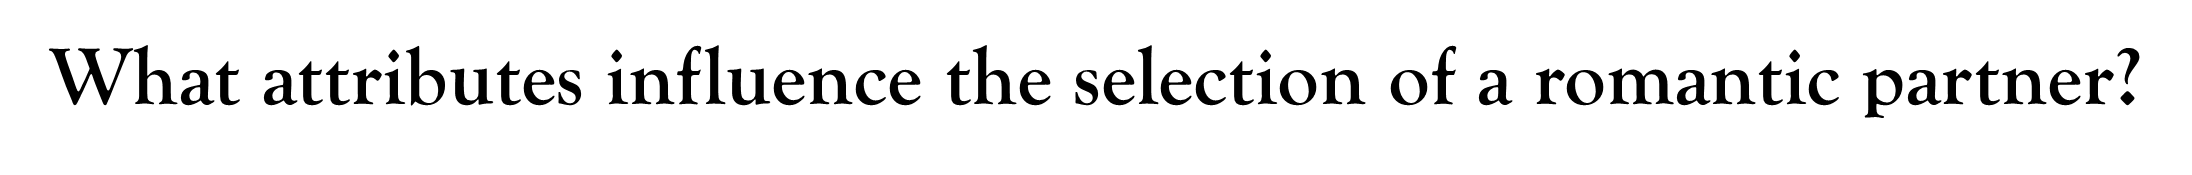

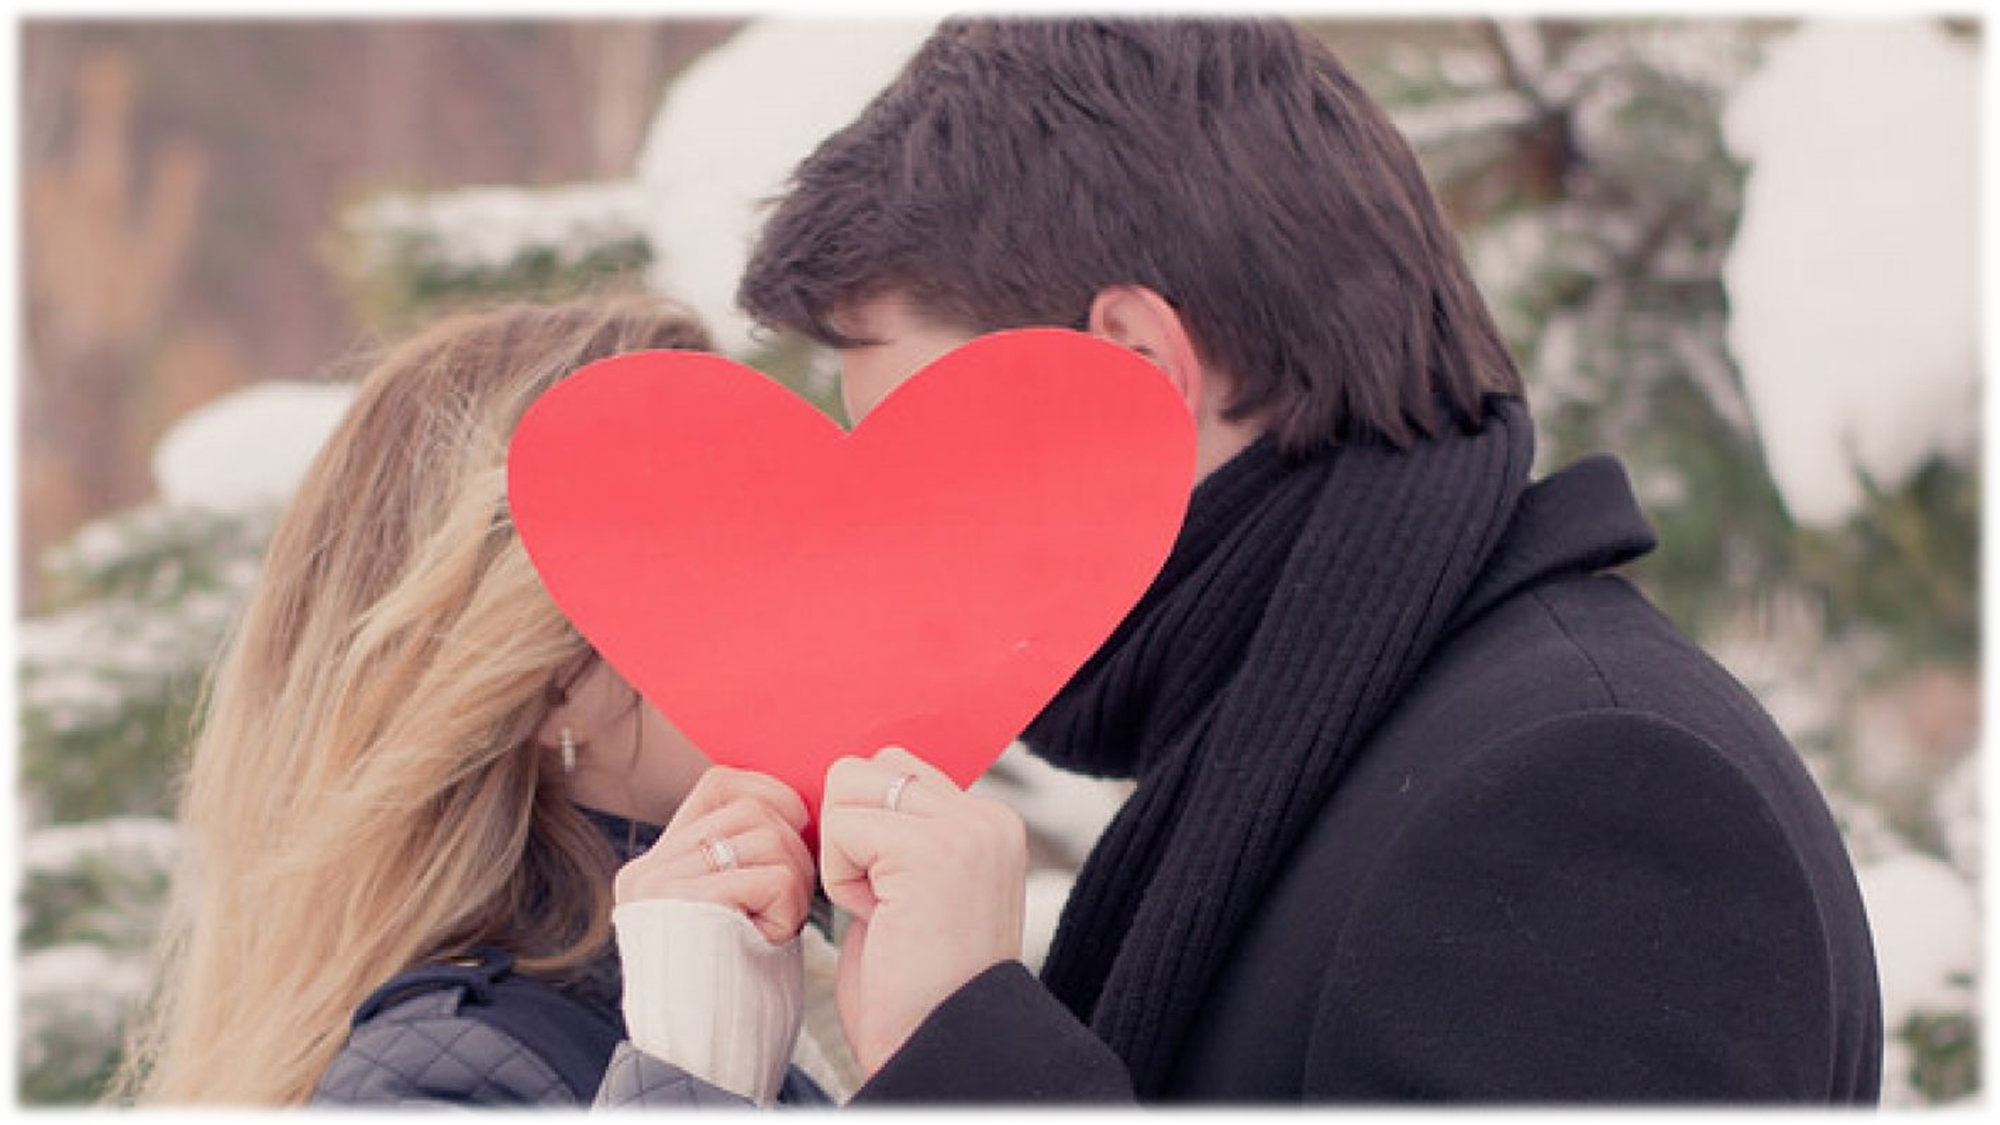

# **About Dataset**

**What influences love at first sight?**<br/> This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.

Data was gathered from participants in experimental speed-dating events from 2002-2004. During the events, the attendees would have a four-minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. <br/>These fields include demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate and lifestyle information.

#    <h1><center>*** </center></h1>

# **Steps of the project**


**The project consists of the following sections:<br />**
<ol>
<li>Data Reading</li>
<li>Exploratory Data Analysis and Data Cleaning</li>
<li>Data Visualization</li>
<ol>



---



#**Establishing connection between "Colab" to "Google Drive"**

In [1]:
# Code for connecting our google drive to this collab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---



#**Loading Required Libraries:**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as math



---



# **1. Data Reading**

In [3]:
# Import dataset into a pandas data frame
df = pd.read_csv('/content/drive/MyDrive/Machine_Learning_ML/Speed_Dating_Data.csv', encoding = 'ISO-8859-1')
df.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   

   fun5_3  amb5_3  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  

[5 rows x 195 columns]

In [4]:
# The shape of a DataFrame
df.shape

(8378, 195)

*We can understand that the table contains 8378 rows and 195 columns.*



---



#**2. Exploratory Data Analysis and Data Cleaning**

Exploratory data analysis consists of analyzing the main characteristics of a data set usually by means of visualization methods and summary statistics.
The objective is to understand the data, discover patterns and anomalies, and check assumptions before performing further evaluations.

### Missing values and data types:<br/>
At the beginning of EDA, we want to know as much information as possible about the data - DataFrame.info method comes in handy.<br/>
This method prints a concise summary of the data frame, including the column names and their data types, the number of non-null values, and the amount of memory used by the data frame.

In [5]:
# Summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [6]:
# Because the amount of data is huge, we will split into several tables and perform INFO on them separately:
df.iloc[ : , 0:65].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       8378 non-null   int64  
 1   id        8377 non-null   float64
 2   gender    8378 non-null   int64  
 3   idg       8378 non-null   int64  
 4   condtn    8378 non-null   int64  
 5   wave      8378 non-null   int64  
 6   round     8378 non-null   int64  
 7   position  8378 non-null   int64  
 8   positin1  6532 non-null   float64
 9   order     8378 non-null   int64  
 10  partner   8378 non-null   int64  
 11  pid       8368 non-null   float64
 12  match     8378 non-null   int64  
 13  int_corr  8220 non-null   float64
 14  samerace  8378 non-null   int64  
 15  age_o     8274 non-null   float64
 16  race_o    8305 non-null   float64
 17  pf_o_att  8289 non-null   float64
 18  pf_o_sin  8289 non-null   float64
 19  pf_o_int  8289 non-null   float64
 20  pf_o_fun  8280 non-null   floa

In [7]:
df.iloc[ : , 65:131].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   shopping  8299 non-null   float64
 1   yoga      8299 non-null   float64
 2   exphappy  8277 non-null   float64
 3   expnum    1800 non-null   float64
 4   attr1_1   8299 non-null   float64
 5   sinc1_1   8299 non-null   float64
 6   intel1_1  8299 non-null   float64
 7   fun1_1    8289 non-null   float64
 8   amb1_1    8279 non-null   float64
 9   shar1_1   8257 non-null   float64
 10  attr4_1   6489 non-null   float64
 11  sinc4_1   6489 non-null   float64
 12  intel4_1  6489 non-null   float64
 13  fun4_1    6489 non-null   float64
 14  amb4_1    6489 non-null   float64
 15  shar4_1   6467 non-null   float64
 16  attr2_1   8299 non-null   float64
 17  sinc2_1   8299 non-null   float64
 18  intel2_1  8299 non-null   float64
 19  fun2_1    8299 non-null   float64
 20  amb2_1    8289 non-null   floa

In [8]:
df.iloc[ : , 131:196].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 64 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fun1_2    7463 non-null   float64
 1   amb1_2    7463 non-null   float64
 2   shar1_2   7463 non-null   float64
 3   attr4_2   5775 non-null   float64
 4   sinc4_2   5775 non-null   float64
 5   intel4_2  5775 non-null   float64
 6   fun4_2    5775 non-null   float64
 7   amb4_2    5775 non-null   float64
 8   shar4_2   5775 non-null   float64
 9   attr2_2   5775 non-null   float64
 10  sinc2_2   5775 non-null   float64
 11  intel2_2  5775 non-null   float64
 12  fun2_2    5775 non-null   float64
 13  amb2_2    5775 non-null   float64
 14  shar2_2   5775 non-null   float64
 15  attr3_2   7463 non-null   float64
 16  sinc3_2   7463 non-null   float64
 17  intel3_2  7463 non-null   float64
 18  fun3_2    7463 non-null   float64
 19  amb3_2    7463 non-null   float64
 20  attr5_2   4377 non-null   floa

*As shown above, the data set contains 8378 observations and 195 columns.<br/>
Apparently, some of the columns have null values and, we observe that some columns with the wrong column type, therefore, we should change the type of those columns to the right type.*

In [9]:
# We will use pandas convert_dtypes() function to convert the default assigned data-types to the best datatype automatically
df = df.convert_dtypes(infer_objects=True, convert_string=True, convert_integer=True, convert_boolean=True, convert_floating=True)

In [10]:
# summary of the data frame
df.iloc[ : , 0:65].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       8378 non-null   Int64  
 1   id        8377 non-null   Int64  
 2   gender    8378 non-null   Int64  
 3   idg       8378 non-null   Int64  
 4   condtn    8378 non-null   Int64  
 5   wave      8378 non-null   Int64  
 6   round     8378 non-null   Int64  
 7   position  8378 non-null   Int64  
 8   positin1  6532 non-null   Int64  
 9   order     8378 non-null   Int64  
 10  partner   8378 non-null   Int64  
 11  pid       8368 non-null   Int64  
 12  match     8378 non-null   Int64  
 13  int_corr  8220 non-null   Float64
 14  samerace  8378 non-null   Int64  
 15  age_o     8274 non-null   Int64  
 16  race_o    8305 non-null   Int64  
 17  pf_o_att  8289 non-null   Float64
 18  pf_o_sin  8289 non-null   Float64
 19  pf_o_int  8289 non-null   Float64
 20  pf_o_fun  8280 non-null   Floa

In [11]:
df.iloc[ : , 65:131].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   shopping  8299 non-null   Int64  
 1   yoga      8299 non-null   Int64  
 2   exphappy  8277 non-null   Int64  
 3   expnum    1800 non-null   Int64  
 4   attr1_1   8299 non-null   Float64
 5   sinc1_1   8299 non-null   Float64
 6   intel1_1  8299 non-null   Float64
 7   fun1_1    8289 non-null   Float64
 8   amb1_1    8279 non-null   Float64
 9   shar1_1   8257 non-null   Float64
 10  attr4_1   6489 non-null   Int64  
 11  sinc4_1   6489 non-null   Int64  
 12  intel4_1  6489 non-null   Int64  
 13  fun4_1    6489 non-null   Int64  
 14  amb4_1    6489 non-null   Int64  
 15  shar4_1   6467 non-null   Int64  
 16  attr2_1   8299 non-null   Float64
 17  sinc2_1   8299 non-null   Float64
 18  intel2_1  8299 non-null   Float64
 19  fun2_1    8299 non-null   Float64
 20  amb2_1    8289 non-null   Floa

In [12]:
df.iloc[ : , 131:196].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 64 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fun1_2    7463 non-null   Float64
 1   amb1_2    7463 non-null   Float64
 2   shar1_2   7463 non-null   Float64
 3   attr4_2   5775 non-null   Int64  
 4   sinc4_2   5775 non-null   Int64  
 5   intel4_2  5775 non-null   Int64  
 6   fun4_2    5775 non-null   Int64  
 7   amb4_2    5775 non-null   Int64  
 8   shar4_2   5775 non-null   Int64  
 9   attr2_2   5775 non-null   Float64
 10  sinc2_2   5775 non-null   Float64
 11  intel2_2  5775 non-null   Float64
 12  fun2_2    5775 non-null   Float64
 13  amb2_2    5775 non-null   Float64
 14  shar2_2   5775 non-null   Float64
 15  attr3_2   7463 non-null   Int64  
 16  sinc3_2   7463 non-null   Int64  
 17  intel3_2  7463 non-null   Int64  
 18  fun3_2    7463 non-null   Int64  
 19  amb3_2    7463 non-null   Int64  
 20  attr5_2   4377 non-null   Int6

#    <h1><center>*** </center></h1>

## **Now we will look at special cases of missing data and supplementing as necessary**

*We know that there are 8378 rows with the help of the info method we can know which columns have missing values and which are important for us to handle.*

#**2.1.0 General**

### **2.1.1 id column:**<br/>
*Subject number within wave*

In [13]:
# Let's look at the column
df["id"].unique()

<IntegerArray>
[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,   12,   13,
   14,   15,   16,   17,   19,   20,   18,   21,   22, <NA>]
Length: 23, dtype: Int64

In [14]:
# Now, let's look at the rows in which the value NA appears
df[df['id'].isnull()]

iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
8377  552  <NA>       1   44       2    21     22         2        10     15   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
8377  ...        8        5         7       6       7        9        5   

      intel5_3  fun5_3  amb5_3  
8377         9       5       6  

[1 rows x 195 columns]

In [15]:
# Now, let's look at the rows in which the value NA appears
df[(df['iid'] == 552)]

iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
8356  552    22       1   44       2    21     22        21        10     12   
8357  552    22       1   44       2    21     22        12        10      3   
8358  552    22       1   44       2    21     22        15        10      6   
8359  552    22       1   44       2    21     22         7        10     20   
8360  552    22       1   44       2    21     22        22        10     13   
8361  552    22       1   44       2    21     22        16        10      7   
8362  552    22       1   44       2    21     22        10        10      1   
8363  552    22       1   44       2    21     22        18        10      9   
8364  552    22       1   44       2    21     22         1        10     14   
8365  552    22       1   44       2    21     22         6        10     19   
8366  552    22       1   44       2    21     22        20        10     11   
8367  552    22       1   44       2    21     22         9        10     22   
8368  552    22       1   44       2    21     22         8        10     21   
8369  552    22       1   44       2    21     22         4        10     17   
8370  552    22       1   44       2    21     22         5        10     18   
8371  552    22       1   44       2    21     22        11        10      2   
8372  552    22       1   44       2    21     22        17        10      8   
8373  552    22       1   44       2    21     22        14        10      5   
8374  552    22       1   44       2    21     22        13        10      4   
8375  552    22       1   44       2    21     22        19        10     10   
8376  552    22       1   44       2    21     22         3        10     16   
8377  552  <NA>       1   44       2    21     22         2        10     15   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
8356  ...        8        5         7       6       7        9        5   
8357  ...        8        5         7       6       7        9        5   
8358  ...        8        5         7       6       7        9        5   
8359  ...        8        5         7       6       7        9        5   
8360  ...        8        5         7       6       7        9        5   
8361  ...        8        5         7       6       7        9        5   
8362  ...        8        5         7       6       7        9        5   
8363  ...        8        5         7       6       7        9        5   
8364  ...        8        5         7       6       7        9        5   
8365  ...        8        5         7       6       7        9        5   
8366  ...        8        5         7       6       7        9        5   
8367  ...        8        5         7       6       7        9        5   
8368  ...        8        5         7       6       7        9        5   
8369  ...        8        5         7       6       7        9        5   
8370  ...        8        5         7       6       7        9        5   
8371  ...        8        5         7       6       7        9        5   
8372  ...        8        5         7       6       7        9        5   
8373  ...        8        5         7       6       7        9        5   
8374  ...        8        5         7       6       7        9        5   
8375  ...        8        5         7       6       7        9        5   
8376  ...        8        5         7       6       7        9        5   
8377  ...        8        5         7       6       7        9        5   

      intel5_3  fun5_3  amb5_3  
8356         9       5       6  
8357         9       5       6  
8358         9       5       6  
8359         9       5       6  
8360         9       5       6  
8361         9       5       6  
8362         9       5       6  
8363         9       5       6  
8364         9       5       6  
8365         9       5       6  
8366         9       5       6  
8367         9       5       6  
8368      

*We know that the iid number is unique for the participant and at the same time for the same date each participant has an id attributed to him. </br>
For wave = 21 there are 22 female and 22 male participants. </br>
When for iid = 552 we can notice that we have 22 rows attributed to the male gender and only a single row is missing the value in the id column, we estimate that the missing value (corresponding according to our understanding) is id = 22.*

In [16]:
df["id"] =  df["id"].fillna(22)

In [17]:
# Now we will check if the value has changed
df[df['id'].isnull()]

Empty DataFrame
Columns: [iid, id, gender, idg, condtn, wave, round, position, positin1, order, partner, pid, match, int_corr, samerace, age_o, race_o, pf_o_att, pf_o_sin, pf_o_int, pf_o_fun, pf_o_amb, pf_o_sha, dec_o, attr_o, sinc_o, intel_o, fun_o, amb_o, shar_o, like_o, prob_o, met_o, age, field, field_cd, undergra, mn_sat, tuition, race, imprace, imprelig, from, zipcode, income, goal, date, go_out, career, career_c, sports, tvsports, exercise, dining, museums, art, hiking, gaming, clubbing, reading, tv, theater, movies, concerts, music, shopping, yoga, exphappy, expnum, attr1_1, sinc1_1, intel1_1, fun1_1, amb1_1, shar1_1, attr4_1, sinc4_1, intel4_1, fun4_1, amb4_1, shar4_1, attr2_1, sinc2_1, intel2_1, fun2_1, amb2_1, shar2_1, attr3_1, sinc3_1, fun3_1, intel3_1, amb3_1, attr5_1, sinc5_1, intel5_1, fun5_1, amb5_1, dec, attr, sinc, ...]
Index: []

[0 rows x 195 columns]

*Great, we have no more missing values in this column.*

### **2.1.2 condtn column:**<br/>
1.   limited choice = 1
2.   extensive choice = 2

In [18]:
df["condtn"].unique()

<IntegerArray>
[1, 2]
Length: 2, dtype: Int64

In [19]:
# Using the MAP function we will change the values to 0 and 1.
df["condtn"] = df["condtn"].map({1:0,2:1})

In [20]:
df["condtn"].unique()

array([0, 1])

### **2.1.3 position column:**<br/>
*Station number where met partner*

In [21]:
df["position"].unique()

<IntegerArray>
[7, 3, 9, 6, 4, 8, 5, 10, 1, 2, 12, 13, 15, 18, 19, 17, 11, 14, 16, 20, 21,
 22]
Length: 22, dtype: Int64

In [22]:
# Let's look at how many values there are in each special value in the order column.
df.groupby("position")["position"].count()

position
1     526
2     554
3     554
4     544
5     510
6     544
7     502
8     518
9     502
10    456
11    386
12    386
13    386
14    358
15    330
16    300
17    268
18    268
19    194
20    162
21     86
22     44
Name: position, dtype: int64

*It can be noticed that tables No. 4, 2,3 and 6 have the highest number of successful couples meeting.*

### **2.1.4 positin1 column:**<br/>
*Station number where started*

In [23]:
df["positin1"].unique()

<IntegerArray>
[<NA>,    2,    3,    4,    1,    5,    9,   10,   13,   14,    8,    6,   12,
   11,   15,    7,   16,   19,   18,   17,   20,   21,   22]
Length: 23, dtype: Int64

In [24]:
# Now, let's look at the rows in which the value NA appears
df[df['positin1'].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1       0    1       0     1     10         7      <NA>      4   
1       1   1       0    1       0     1     10         7      <NA>      3   
2       1   1       0    1       0     1     10         7      <NA>     10   
3       1   1       0    1       0     1     10         7      <NA>      5   
4       1   1       0    1       0     1     10         7      <NA>      7   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
1841  131  10       1   18       0     5     10         2      <NA>      2   
1842  131  10       1   18       0     5     10         5      <NA>      5   
1843  131  10       1   18       0     5     10         3      <NA>      3   
1844  131  10       1   18       0     5     10        10      <NA>     10   
1845  131  10       1   18       0     5     10         4      <NA>      4   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0     ...        5        7         7       7       7     <NA>     <NA>   
1     ...        5        7         7       7       7     <NA>     <NA>   
2     ...        5        7         7       7       7     <NA>     <NA>   
3     ...        5        7         7       7       7     <NA>     <NA>   
4     ...        5        7         7       7       7     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
1841  ...        4        4         4       4       4     <NA>     <NA>   
1842  ...        4        4         4       4       4     <NA>     <NA>   
1843  ...        4        4         4       4       4     <NA>     <NA>   
1844  ...        4        4         4       4       4     <NA>     <NA>   
1845  ...        4        4         4       4       4     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
0         <NA>    <NA>    <NA>  
1         <NA>    <NA>    <NA>  
2         <NA>    <NA>    <NA>  
3         <NA>    <NA>    <NA>  
4         <NA>    <NA>    <NA>  
...        ...     ...     ...  
1841      <NA>    <NA>    <NA>  
1842      <NA>    <NA>    <NA>  
1843      <NA>    <NA>    <NA>  
1844      <NA>    <NA>    <NA>  
1845      <NA>    <NA>    <NA>  

[1846 rows x 195 columns]

*It can be seen that there are 1846 lines where the value NA appears.<br/>
 At the same time, these rows have important data, so we cannot remove them from the data set. <br/>
 We need to set a replacement value.*

In [25]:
df['positin1'] = df['positin1'].fillna(-1)

In [26]:
df.positin1.isnull().sum()

0

### **2.1.5 order column:**<br/>
*The number of date that night when met partner*

In [27]:
# Let's look at the column
df["order"].unique()

<IntegerArray>
[4, 3, 10, 5, 7, 6, 1, 2, 8, 9, 11, 15, 12, 16, 13, 14, 18, 17, 19, 20, 21,
 22]
Length: 22, dtype: Int64

In [28]:
# Let's look at how many values there are in each special value in the order column.
df.groupby("order")["order"].count()

order
1     551
2     551
3     551
4     551
5     551
6     541
7     514
8     508
9     502
10    474
11    372
12    372
13    372
14    372
15    334
16    304
17    253
18    253
19    178
20    144
21     86
22     44
Name: order, dtype: int64

### **2.1.6 pid column:**<br/>
*Partner’s iid number*

In [29]:
# Let's look at the column
df["pid"].unique()

<IntegerArray>
[ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20,
 ...
 521, 522, 523, 524, 525, 526, 527, 528, 529, 530]
Length: 552, dtype: Int64

In [30]:
# Let's see how many rows we have with the value NA in the column
df['pid'].isnull().sum()

10

In [31]:
# Now, let's look at the rows in which the value NA appears
df[df['pid'].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
1755  122   1       1    2       0     5     10         4        -1      6   
1765  123   2       1    4       0     5     10         4        -1     10   
1775  124   3       1    6       0     5     10         4        -1      3   
1785  125   4       1    8       0     5     10         4        -1      8   
1795  126   5       1   10       0     5     10         4        -1      1   
1805  127   6       1   12       0     5     10         4        -1      7   
1815  128   7       1   14       0     5     10         4        -1      9   
1825  129   8       1   15       0     5     10         4        -1      5   
1835  130   9       1   16       0     5     10         4        -1      2   
1845  131  10       1   18       0     5     10         4        -1      4   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
1755  ...        8       10         8       8       8     <NA>     <NA>   
1765  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
1775  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
1785  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
1795  ...        9       10         9      10       9     <NA>     <NA>   
1805  ...        8        8         8       8       8     <NA>     <NA>   
1815  ...        9        8         9       8       7     <NA>     <NA>   
1825  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
1835  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
1845  ...        4        4         4       4       4     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
1755      <NA>    <NA>    <NA>  
1765      <NA>    <NA>    <NA>  
1775      <NA>    <NA>    <NA>  
1785      <NA>    <NA>    <NA>  
1795      <NA>    <NA>    <NA>  
1805      <NA>    <NA>    <NA>  
1815      <NA>    <NA>    <NA>  
1825      <NA>    <NA>    <NA>  
1835      <NA>    <NA>    <NA>  
1845      <NA>    <NA>    <NA>  

[10 rows x 195 columns]

In [32]:
df.loc[(df["wave"] ==5) & (df["gender"] ==1) & (df["pid"].isnull())]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
1755  122   1       1    2       0     5     10         4        -1      6   
1765  123   2       1    4       0     5     10         4        -1     10   
1775  124   3       1    6       0     5     10         4        -1      3   
1785  125   4       1    8       0     5     10         4        -1      8   
1795  126   5       1   10       0     5     10         4        -1      1   
1805  127   6       1   12       0     5     10         4        -1      7   
1815  128   7       1   14       0     5     10         4        -1      9   
1825  129   8       1   15       0     5     10         4        -1      5   
1835  130   9       1   16       0     5     10         4        -1      2   
1845  131  10       1   18       0     5     10         4        -1      4   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
1755  ...        8       10         8       8       8     <NA>     <NA>   
1765  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
1775  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
1785  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
1795  ...        9       10         9      10       9     <NA>     <NA>   
1805  ...        8        8         8       8       8     <NA>     <NA>   
1815  ...        9        8         9       8       7     <NA>     <NA>   
1825  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
1835  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
1845  ...        4        4         4       4       4     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
1755      <NA>    <NA>    <NA>  
1765      <NA>    <NA>    <NA>  
1775      <NA>    <NA>    <NA>  
1785      <NA>    <NA>    <NA>  
1795      <NA>    <NA>    <NA>  
1805      <NA>    <NA>    <NA>  
1815      <NA>    <NA>    <NA>  
1825      <NA>    <NA>    <NA>  
1835      <NA>    <NA>    <NA>  
1845      <NA>    <NA>    <NA>  

[10 rows x 195 columns]

*We can notice that for the rows where the value in the wave column is 5, the pid column with missing values - the other columns that we care about having values in, there are missing values. Therefore, we choose to delete these rows since we believe they do not contribute to the experiment.*

In [33]:
# Using drop() to delete rows based on column value
df = df.dropna(subset=['pid'])

### **2.1.7 int_corr column:**<br/>
*Correlation between participant’s and partner’s ratings of interests in Time 1*

In [34]:
df["int_corr"].unique()

<FloatingArray>
[ 0.14,  0.54,  0.16,  0.61,  0.21,  0.25,  0.34,   0.5,  0.28, -0.36,
 ...
  0.88,  -0.7, -0.62, -0.55,  0.87,  0.91,  0.84, -0.64, -0.73, -0.54]
Length: 156, dtype: Float64

In [35]:
# Now, let's look at the rows in which the value NA appears
df[df["int_corr"].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
312    28   8       0   15       1     2     16         1        -1      3   
313    28   8       0   15       1     2     16         1        -1      4   
314    28   8       0   15       1     2     16         1        -1      5   
315    28   8       0   15       1     2     16         1        -1      8   
316    28   8       0   15       1     2     16         1        -1     12   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
5649  374  14       1   28       1    14     20        10        10     16   
5669  375  15       1   30       1    14     20        10        10     11   
5689  376  16       1   32       1    14     20        10        10     13   
5709  377  17       1   34       1    14     20        10        10      2   
5729  378  18       1   36       1    14     20        10        10      3   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
312   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
313   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
314   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
315   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
316   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
5649  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5669  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5689  ...        7        9         9       8       9        7        9   
5709  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5729  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
312       <NA>    <NA>    <NA>  
313       <NA>    <NA>    <NA>  
314       <NA>    <NA>    <NA>  
315       <NA>    <NA>    <NA>  
316       <NA>    <NA>    <NA>  
...        ...     ...     ...  
5649      <NA>    <NA>    <NA>  
5669      <NA>    <NA>    <NA>  
5689        10       8       9  
5709      <NA>    <NA>    <NA>  
5729      <NA>    <NA>    <NA>  

[158 rows x 195 columns]

In [36]:
df["int_corr"].describe()

count      8210.0
mean       0.1963
std      0.303522
min         -0.83
25%         -0.01
50%          0.21
75%          0.43
max          0.91
Name: int_corr, dtype: Float64

In [37]:
df['int_corr'] = df['int_corr'].fillna(-2.0)

In [38]:
df["int_corr"].isnull().sum()

0

### **2.1.8 samerace column:**<br/>
*participant and the partner were the same race.*
1.   no = 0
2.   yes = 1

In [39]:
df["samerace"].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

### **2.1.9 age_o column:**<br/>
*Age of partner*

In [40]:
df["age_o"].unique()

<IntegerArray>
[  27,   22,   23,   24,   25,   30,   28,   21,   26,   29, <NA>,   39,   32,
   34,   35,   18,   20,   19,   37,   33,   36,   31,   42,   38,   55]
Length: 25, dtype: Int64

In [41]:
# Now, let's look at the rows in which the value NA appears
df[df['age_o'].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
910    66   1       1    2       0     3     10         7        -1      9   
911    66   1       1    2       0     3     10         8        -1     10   
920    67   2       1    4       0     3     10         7        -1      5   
921    67   2       1    4       0     3     10         8        -1      6   
930    68   3       1    6       0     3     10         7        -1     10   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
8271  548  18       1   36       1    21     22         7         9     21   
8293  549  19       1   38       1    21     22         7         7      1   
8315  550  20       1   40       1    21     22         7        20     10   
8337  551  21       1   42       1    21     22         7        21      9   
8359  552  22       1   44       1    21     22         7        10     20   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
910   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
911   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
920   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
921   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
930   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
8271  ...        8        9         9       9       9        8        9   
8293  ...        7        9         8       7       8        5        8   
8315  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
8337  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
8359  ...        8        5         7       6       7        9        5   

      intel5_3  fun5_3  amb5_3  
910       <NA>    <NA>    <NA>  
911       <NA>    <NA>    <NA>  
920       <NA>    <NA>    <NA>  
921       <NA>    <NA>    <NA>  
930       <NA>    <NA>    <NA>  
...        ...     ...     ...  
8271         9       9       7  
8293         8       6       8  
8315      <NA>    <NA>    <NA>  
8337      <NA>    <NA>    <NA>  
8359         9       5       6  

[94 rows x 195 columns]

*We have 104 rows with no age_o value. We must decide whether to place an alternative figure or delete these rows - according to the classification of the information in the other columns.*

In [42]:
# we will now use describe() which is used to view some basic statistical details like percentile, mean, std, etc.
# Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
df["age_o"].describe()

count       8274.0
mean     26.364999
std       3.563648
min           18.0
25%           24.0
50%           26.0
75%           28.0
max           55.0
Name: age_o, dtype: Float64

In [43]:
# Let’s have a look at the distribution of gender:
df['gender'].value_counts(normalize=True)

0    0.5
1    0.5
Name: gender, dtype: Float64

*We can see that the gender group is evenly distributed between the sexes.*

In [44]:
grouped = df.groupby('gender')['age_o'].median()

for index, row in df.iterrows():
    if pd.isnull(row['age_o']):
        df.at[index, 'age_o'] = grouped[row['gender']]

In [45]:
# null observations of the column
df[df['age_o'].isnull()]

Empty DataFrame
Columns: [iid, id, gender, idg, condtn, wave, round, position, positin1, order, partner, pid, match, int_corr, samerace, age_o, race_o, pf_o_att, pf_o_sin, pf_o_int, pf_o_fun, pf_o_amb, pf_o_sha, dec_o, attr_o, sinc_o, intel_o, fun_o, amb_o, shar_o, like_o, prob_o, met_o, age, field, field_cd, undergra, mn_sat, tuition, race, imprace, imprelig, from, zipcode, income, goal, date, go_out, career, career_c, sports, tvsports, exercise, dining, museums, art, hiking, gaming, clubbing, reading, tv, theater, movies, concerts, music, shopping, yoga, exphappy, expnum, attr1_1, sinc1_1, intel1_1, fun1_1, amb1_1, shar1_1, attr4_1, sinc4_1, intel4_1, fun4_1, amb4_1, shar4_1, attr2_1, sinc2_1, intel2_1, fun2_1, amb2_1, shar2_1, attr3_1, sinc3_1, fun3_1, intel3_1, amb3_1, attr5_1, sinc5_1, intel5_1, fun5_1, amb5_1, dec, attr, sinc, ...]
Index: []

[0 rows x 195 columns]

In [46]:
df["age_o"].describe()

count       8368.0
mean     26.364364
std       3.543917
min           18.0
25%           24.0
50%           26.0
75%           28.0
max           55.0
Name: age_o, dtype: Float64

<Axes: >

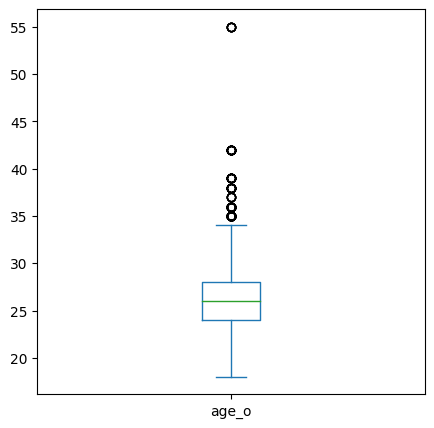

In [47]:
# Box plot of age column
df['age_o'].plot.box(figsize=(5,5))

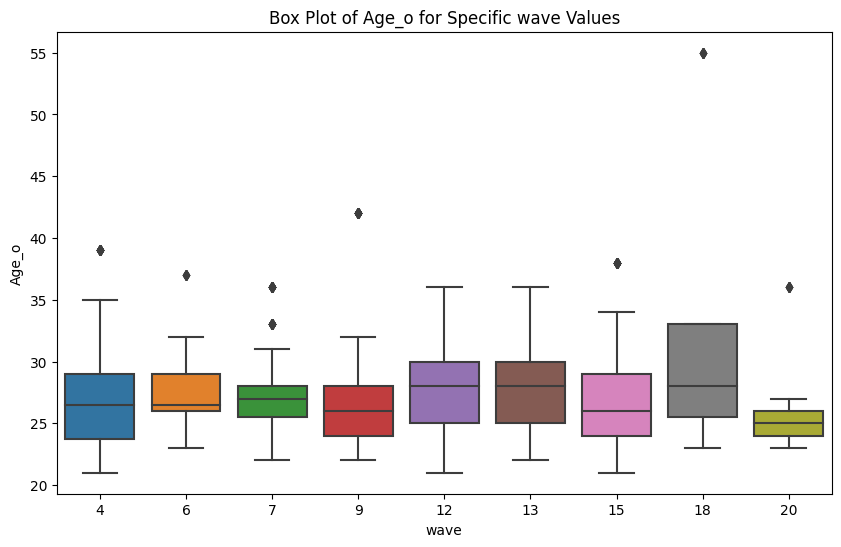

In [48]:
# Filter specific WAVE values (4, 6, 7, 9, 12, 13, 15, 18, 20)
target_wave_values = [4, 6, 7, 9, 12, 13, 15, 18, 20]
filtered_df = df[df['wave'].isin(target_wave_values)]

# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='wave', y='age_o')
plt.xlabel('wave')
plt.ylabel('Age_o')
plt.title('Box Plot of Age_o for Specific wave Values')
plt.show()

*We will note that age 55 is far from the average age. We will check whether it is possible to remove these lines (if the amount of lines with 55 is negligible, we can remove it).*

In [49]:
df.loc[df["age_o"] == 55,["iid",'id','gender',"age",'age_o',"wave"]]

iid  id  gender  age  age_o  wave
6843  460   1       1   33     55    18
6849  461   2       1   27     55    18
6855  462   3       1   33     55    18
6861  463   4       1   23     55    18
6867  464   5       1   33     55    18
6873  465   6       1   23     55    18

*We got only 6 rows, so we can delete these rows.*

In [50]:
# Using drop() to delete rows based on column value
df.drop(df[df['age_o'] == 55].index, inplace = True)

In [51]:
df.loc[df["wave"]==18,["age_o"]].describe()

age_o
count       66.0
mean   27.909091
std     3.707486
min         23.0
25%         24.0
50%         27.0
75%         33.0
max         33.0

<Axes: >

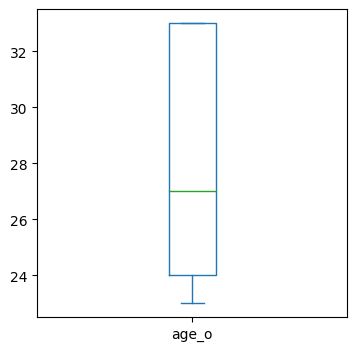

In [52]:
# Box plot of age column
df.loc[df["wave"]==18,["age_o"]].plot.box(figsize=(4,4))

### **2.1.10 race_o column:**<br/>
*Race of partner:*
* Black/African American = 1
* European/Caucasian-American = 2
* Latino/Hispanic American = 3
* Asian/Pacific Islander/Asian-American = 4
* Native American = 5
* Other = 6

In [53]:
df["race_o"].unique()

<IntegerArray>
[2, 4, 3, 6, 1, <NA>]
Length: 6, dtype: Int64

*We will notice that the value 5 is missing, however NA values appear - something that can indicate a suspicious situation.*

In [54]:
# null observations of the column
df[df['race_o'].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
910    66   1       1    2       0     3     10         7        -1      9   
911    66   1       1    2       0     3     10         8        -1     10   
920    67   2       1    4       0     3     10         7        -1      5   
921    67   2       1    4       0     3     10         8        -1      6   
930    68   3       1    6       0     3     10         7        -1     10   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
5649  374  14       1   28       1    14     20        10        10     16   
5669  375  15       1   30       1    14     20        10        10     11   
5689  376  16       1   32       1    14     20        10        10     13   
5709  377  17       1   34       1    14     20        10        10      2   
5729  378  18       1   36       1    14     20        10        10      3   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
910   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
911   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
920   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
921   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
930   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
5649  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5669  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5689  ...        7        9         9       8       9        7        9   
5709  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5729  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
910       <NA>    <NA>    <NA>  
911       <NA>    <NA>    <NA>  
920       <NA>    <NA>    <NA>  
921       <NA>    <NA>    <NA>  
930       <NA>    <NA>    <NA>  
...        ...     ...     ...  
5649      <NA>    <NA>    <NA>  
5669      <NA>    <NA>    <NA>  
5689        10       8       9  
5709      <NA>    <NA>    <NA>  
5729      <NA>    <NA>    <NA>  

[63 rows x 195 columns]

*We have 73 rows with no age value. We must decide whether to place an alternative figure or delete these rows - according to the classification of the information in the other columns.*

In [55]:
df['race_o'].fillna(-1, inplace=True)

In [56]:
df["race_o"].isnull().sum()

0

### **2.1.11** ***Partner’s stated preference at Time 1 (attr1_1) for all 6 attributes - pf_o_att,  pf_o_sin, pf_o_int,  pf_o_fun,  pf_o_amb, pf_o_sha***

In [57]:
df[['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8362 entries, 0 to 8377
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pf_o_att  8283 non-null   Float64
 1   pf_o_sin  8283 non-null   Float64
 2   pf_o_int  8283 non-null   Float64
 3   pf_o_fun  8274 non-null   Float64
 4   pf_o_amb  8265 non-null   Float64
 5   pf_o_sha  8243 non-null   Float64
dtypes: Float64(6)
memory usage: 506.3 KB


In [58]:
# Assuming you have a DataFrame named df
selected_columns = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']

unique_values_per_column = {}
for col in selected_columns:
    unique_values_per_column[col] = df[col].unique().tolist()

unique_values_per_column

{'pf_o_att': [35.0,
  60.0,
  19.0,
  30.0,
  50.0,
  33.33,
  100.0,
  15.0,
  45.0,
  20.0,
  10.0,
  9.09,
  25.0,
  40.0,
  12.0,
  17.0,
  <NA>,
  21.0,
  5.0,
  18.0,
  14.0,
  80.0,
  17.39,
  18.75,
  18.6,
  20.83,
  16.67,
  12.77,
  6.67,
  18.18,
  19.05,
  15.91,
  16.0,
  15.22,
  20.51,
  27.78,
  11.11,
  17.78,
  16.28,
  19.57,
  18.37,
  14.29,
  8.33,
  11.36,
  15.09,
  8.51,
  14.55,
  9.76,
  15.38,
  16.98,
  19.44,
  15.56,
  20.45,
  20.93,
  9.52,
  12.24,
  13.04,
  19.15,
  16.07,
  17.02,
  14.89,
  7.5,
  21.28,
  17.24,
  14.71,
  25.64,
  13.51,
  21.43,
  23.81,
  17.65,
  17.5,
  13.21,
  19.61,
  14.58,
  17.31,
  11.54,
  16.36,
  15.52,
  22.0,
  90.0,
  24.0,
  27.0,
  23.0,
  0.0,
  7.0,
  2.0,
  31.58,
  75.0,
  9.0,
  70.0,
  95.0,
  8.0,
  55.0,
  28.0,
  58.0],
 'pf_o_sin': [20.0,
  0.0,
  18.0,
  5.0,
  10.0,
  15.0,
  11.11,
  25.0,
  18.18,
  35.0,
  <NA>,
  22.0,
  23.0,
  17.0,
  7.0,
  30.0,
  8.0,
  24.0,
  32.0,
  21.0,
  3.0,
  40.0,

In [59]:
selected_columns = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']

for col in selected_columns:
    column_description = df[col].describe()
    print(f"Description for column '{col}':\n{column_description}\n")

Description for column 'pf_o_att':
count       8283.0
mean     22.493533
std      12.574173
min            0.0
25%           15.0
50%           20.0
75%           25.0
max          100.0
Name: pf_o_att, dtype: Float64

Description for column 'pf_o_sin':
count       8283.0
mean     17.409469
std       7.030968
min            0.0
25%           15.0
50%          18.37
75%           20.0
max           60.0
Name: pf_o_sin, dtype: Float64

Description for column 'pf_o_int':
count       8283.0
mean     20.267333
std       6.784157
min            0.0
25%          17.39
50%           20.0
75%          23.81
max           50.0
Name: pf_o_int, dtype: Float64

Description for column 'pf_o_fun':
count       8274.0
mean     17.454246
std       6.084342
min            0.0
25%           15.0
50%           18.0
75%           20.0
max           50.0
Name: pf_o_fun, dtype: Float64

Description for column 'pf_o_amb':
count       8265.0
mean     10.693132
std       6.121996
min            0.0
25%          

In [60]:
columns_to_count_missing = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']
df[columns_to_count_missing].isnull().sum()

pf_o_att     79
pf_o_sin     79
pf_o_int     79
pf_o_fun     88
pf_o_amb     97
pf_o_sha    119
dtype: int64

In [61]:
columns_to_fill = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']

for column in columns_to_fill:
    mode_value = df[column].mode()[0]  # Get the mode (most frequent) value for the column
    df[column].fillna(mode_value, inplace=True)  # Fill missing values with the mode value

In [62]:
# Assuming you have a DataFrame named df
selected_columns = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']

# Count NaN values in selected columns
empty_counts = df[selected_columns].isna().sum()

print("Empty Row Counts:")
print(empty_counts)

Empty Row Counts:
pf_o_att    0
pf_o_sin    0
pf_o_int    0
pf_o_fun    0
pf_o_amb    0
pf_o_sha    0
dtype: int64


### **2.1.12 dec column:**<br/>
*My decision of the night of the event*
* No = 0
* Yes = 1

In [63]:
df["dec"].unique()

<IntegerArray>
[1, 0]
Length: 2, dtype: Int64

### **2.1.13 met column**<br/>
* 1 = yes
* 2 = no

In [64]:
df["met"].unique()

<IntegerArray>
[2, 1, <NA>, 3, 5, 0, 7, 8, 6]
Length: 9, dtype: Int64

*We will change the values other than 1 or 2 and missing values to the value -1 and the value 2 to 0 (the value that marks no)*

In [65]:
# Define a custom function to replace values
def replace_values(x):
    if pd.isna(x):
        return -1
    if x == 1:
        return x
    if x == 2:
        return 0
    return -1

# Apply the custom function to the specified column
df['met'] = df['met'].apply(replace_values)

In [66]:
df["met"].unique()

array([ 0,  1, -1])

In [67]:
df["met"].isnull().sum()

0

### **2.1.14 Rating by me the night of the event, for all 6 attributes: attr, sinc, intel, fun, amb, shar and for the columns: like, prob**

In [68]:
list_columns = ['attr','sinc','intel','fun','amb','shar','like','prob']

# Check unique values of each column
for column in list_columns:
     print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: attr - Unique Values: <FloatingArray>
[ 6.0,  7.0,  5.0,  4.0,  8.0,  9.0,  3.0, 10.0,  1.0, <NA>,  2.0,  0.0,  6.5,
  7.5,  9.5,  8.5,  9.9,  3.5]
Length: 18, dtype: Float64
Column: sinc - Unique Values: <FloatingArray>
[9.0, 8.0, 6.0, 7.0, 5.0, 10.0, 4.0, 1.0, 3.0, <NA>, 2.0, 4.5, 0.0, 8.5, 7.5]
Length: 15, dtype: Float64
Column: intel - Unique Values: <FloatingArray>
[ 7.0,  9.0,  8.0,  6.0, 10.0,  5.0,  1.0,  4.0,  3.0, <NA>,  6.5,  2.0,  0.0,
  8.5,  7.5,  9.5,  2.5,  5.5]
Length: 18, dtype: Float64
Column: fun - Unique Values: <FloatingArray>
[ 7.0,  8.0,  4.0,  6.0,  9.0,  3.0,  5.0, 10.0,  2.0,  1.0, <NA>,  5.5,  0.0,
  6.5,  9.5,  7.5,  8.5]
Length: 17, dtype: Float64
Column: amb - Unique Values: <FloatingArray>
[ 6.0,  5.0,  8.0, 10.0,  9.0,  3.0,  7.0,  4.0,  2.0,  1.0, <NA>,  5.5,  0.0,
  9.5,  7.5,  8.5]
Length: 16, dtype: Float64
Column: shar - Unique Values: <FloatingArray>
[ 5.0,  6.0,  7.0,  8.0,  4.0,  3.0,  2.0,  9.0, 10.0,  1.0, <NA>,  0.0,  7.5,
  6.5,  8.5

In [69]:
list_columns = ['attr','sinc','intel','fun','amb','shar','like','prob']

# Mapping of special values to whole numbers
value_mapping_2 = {
    0.0: np.nan,
    1.0: 1,
    2.0: 2,
    3.0: 3,
    3.5: 3,
    4.0: 4,
    5.0: 5,
    6.0: 6,
    6.5: 6,
    7.0: 7,
    7.5: 7,
    8.0: 8,
    8.5: 8,
    9.0: 9,
    9.5: 9,
    9.9: 10,
    10.0: 10,
    10.5: 10}

# Apply mapping to all columns in the list
for column in list_columns:
    df[column] = df[column].map(value_mapping_2)

In [70]:
columns_to_check = ['attr','sinc','intel','fun','amb','shar','like','prob']

# Create a new DataFrame to store missing value counts
missing_value_counts = pd.DataFrame(columns=['Column', 'Missing Values Count'])

for column in columns_to_check:
    missing_count = df[column].isna().sum()
    missing_value_counts = pd.concat([missing_value_counts, pd.DataFrame({'Column': [column], 'Missing Values Count': [missing_count]})], ignore_index=True)

# Display the table
print(missing_value_counts)

  Column Missing Values Count
0   attr                  210
1   sinc                  287
2  intel                  302
3    fun                  365
4    amb                  717
5   shar                 1125
6   like                  254
7   prob                  362


In [71]:
df_copy = df.copy()
# List of columns to check
columns_to_check = ['attr','sinc','intel','fun','amb','shar','like','prob']

# Define the bins for the 'wave' column
bins = [1, 5, 9, 21]  # Customize the bins as needed

# Create labels for the groups
labels = ['Group 1 (1-5)', 'Group 2 (6-9)', 'Group 3 (10-21)']

# Create a new column 'wave_group' based on the 'wave' column
df_copy['wave_group'] = pd.cut(df_copy['wave'], bins=bins, labels=labels)

# Create a list to store DataFrames
missing_value_counts_list = []

# Iterate through columns and wave groups
for column in columns_to_check:
    for group, group_df in df_copy.groupby('wave_group'):
        missing_count = group_df[column].isna().sum()
        missing_value_counts_list.append(pd.DataFrame({'Column': [column], 'Wave Group': [group], 'Missing Values Count': [missing_count]}))

# Concatenate DataFrames
missing_value_counts = pd.concat(missing_value_counts_list, ignore_index=True)

# Display the table
print(missing_value_counts)

   Column       Wave Group  Missing Values Count
0    attr    Group 1 (1-5)                    28
1    attr    Group 2 (6-9)                     8
2    attr  Group 3 (10-21)                   173
3    sinc    Group 1 (1-5)                    45
4    sinc    Group 2 (6-9)                    24
5    sinc  Group 3 (10-21)                   218
6   intel    Group 1 (1-5)                    44
7   intel    Group 2 (6-9)                    30
8   intel  Group 3 (10-21)                   228
9     fun    Group 1 (1-5)                    74
10    fun    Group 2 (6-9)                    55
11    fun  Group 3 (10-21)                   236
12    amb    Group 1 (1-5)                   133
13    amb    Group 2 (6-9)                   128
14    amb  Group 3 (10-21)                   454
15   shar    Group 1 (1-5)                   218
16   shar    Group 2 (6-9)                   223
17   shar  Group 3 (10-21)                   674
18   like    Group 1 (1-5)                    32
19   like    Group 2

In [72]:
df[['attr','sinc','intel','fun','amb','shar','like','prob']].describe()

attr         sinc        intel          fun          amb  \
count  8152.000000  8075.000000  8060.000000  7997.000000  7645.000000   
mean      6.195903     7.183034     7.374442     6.411029     6.783911   
std       1.941487     1.723717     1.539162     1.936974     1.786008   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       5.000000     6.000000     6.000000     5.000000     6.000000   
50%       6.000000     7.000000     7.000000     7.000000     7.000000   
75%       8.000000     8.000000     8.000000     8.000000     8.000000   
max      10.000000    10.000000    10.000000    10.000000    10.000000   

              shar         like         prob  
count  7237.000000  8108.000000  8000.000000  
mean      5.518861     6.138012     5.240000  
std       2.107027     1.830911     2.095996  
min       1.000000     1.000000     1.000000  
25%       4.000000     5.000000     4.000000  
50%       6.000000     6.000000     5.000000  
75%       7.000000     7.000000     7.000000  
max      10.000000    10.000000    10.000000

*It can be seen that the median and average for each column (without reference to dividing groups according to the wave column), the values are almost identical. Therefore, we can place in the missing values the corresponding average value for each column from the list.*

In [73]:
# List of columns to fill missing values
columns_to_fill =['attr','sinc','intel','fun','amb','shar','like','prob']

# Fill missing values with the mean of each column
for column in columns_to_fill:
    mean_value = int(df[column].mean())
    df[column].fillna(mean_value, inplace=True)

In [74]:
columns_to_check = ['attr','sinc','intel','fun','amb','shar','like','prob']

# Create a new DataFrame to store missing value counts
missing_value_counts = pd.DataFrame(columns=['Column', 'Missing Values Count'])

for column in columns_to_check:
    missing_count = df[column].isna().sum()
    missing_value_counts = pd.concat([missing_value_counts, pd.DataFrame({'Column': [column], 'Missing Values Count': [missing_count]})], ignore_index=True)

# Display the table
print(missing_value_counts)

  Column Missing Values Count
0   attr                    0
1   sinc                    0
2  intel                    0
3    fun                    0
4    amb                    0
5   shar                    0
6   like                    0
7   prob                    0


### **2.1.15 dec_o column:**<br/>
*Decision of partner the night of event*
* No = 0
* Yes = 1

In [75]:
df["dec_o"].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

### **2.1.16** **met_o column**

In [76]:
df["met_o"].unique()

<IntegerArray>
[2, 1, <NA>, 3, 5, 6, 7, 8]
Length: 8, dtype: Int64

*We will change the values other than 1 or 2 and missing values to the value -1 and the value 2 to 0 (the value that marks no)*

In [77]:
# Apply the custom function to the specified column
df['met_o'] = df['met_o'].apply(replace_values)

In [78]:
df["met_o"].unique()

array([ 0,  1, -1])

In [79]:
df["met_o"].isnull().sum()

0

### **2.1.17 Rating by partner the night of the event, for all 6 attributes: attr_o, sinc_o, intel_o, fun_o, amb_o, shar_o and for the columns: like_o, prob_o**

In [80]:
list_columns = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o','like_o', 'prob_o']

# Check unique values of each column
for column in list_columns:
     print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: attr_o - Unique Values: <FloatingArray>
[ 6.0,  7.0, 10.0,  8.0,  3.0,  9.0,  5.0,  4.0,  2.0,  1.0, <NA>,  0.0,  6.5,
  7.5,  8.5,  9.5,  9.9, 10.5,  3.5]
Length: 19, dtype: Float64
Column: sinc_o - Unique Values: <FloatingArray>
[8.0, 10.0, 7.0, 6.0, 9.0, 3.0, 5.0, 4.0, 1.0, 2.0, <NA>, 4.5, 8.5, 0.0, 7.5]
Length: 15, dtype: Float64
Column: intel_o - Unique Values: <FloatingArray>
[ 8.0, 10.0,  9.0,  7.0,  5.0,  6.0,  4.0,  3.0,  1.0, <NA>,  2.0,  6.5,  0.0,
  8.5,  7.5,  9.5,  2.5,  5.5]
Length: 18, dtype: Float64
Column: fun_o - Unique Values: <FloatingArray>
[ 8.0,  7.0, 10.0,  6.0,  5.0,  9.0,  3.0,  4.0,  1.0,  2.0, <NA>,  5.5,  0.0,
  6.5,  9.5,  7.5,  8.5, 11.0]
Length: 18, dtype: Float64
Column: amb_o - Unique Values: <FloatingArray>
[ 8.0,  7.0, 10.0,  9.0,  6.0,  5.0, <NA>,  4.0,  1.0,  2.0,  3.0,  5.5,  9.5,
  0.0,  7.5,  8.5]
Length: 16, dtype: Float64
Column: shar_o - Unique Values: <FloatingArray>
[ 6.0,  5.0, 10.0,  8.0,  7.0,  9.0,  4.0,  3.0, <NA>,  1.0,  2.0,

In [81]:
list_columns = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o','like_o', 'prob_o']

# Apply mapping to all columns in the list
for column in list_columns:
    df[column] = df[column].map(value_mapping_2)

*Null observations*

In [82]:
columns_to_check = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o','like_o', 'prob_o']

# Create a new DataFrame to store missing value counts
missing_value_counts = pd.DataFrame(columns=['Column', 'Missing Values Count'])

for column in columns_to_check:
    missing_count = df[column].isna().sum()
    missing_value_counts = pd.concat([missing_value_counts, pd.DataFrame({'Column': [column], 'Missing Values Count': [missing_count]})], ignore_index=True)

# Display the table
print(missing_value_counts)

    Column Missing Values Count
0   attr_o                  210
1   sinc_o                  287
2  intel_o                  303
3    fun_o                  367
4    amb_o                  718
5   shar_o                 1126
6   like_o                  253
7   prob_o                  363


In [83]:
df_copy = df.copy()
# List of columns to check
columns_to_check = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o','like_o', 'prob_o']

# Define the bins for the 'wave' column
bins = [1, 5, 9, 21]  # Customize the bins as needed

# Create labels for the groups
labels = ['Group 1 (1-5)', 'Group 2 (6-9)', 'Group 3 (10-21)']

# Create a new column 'wave_group' based on the 'wave' column
df_copy['wave_group'] = pd.cut(df_copy['wave'], bins=bins, labels=labels)

# Create a list to store DataFrames
missing_value_counts_list = []

# Iterate through columns and wave groups
for column in columns_to_check:
    for group, group_df in df_copy.groupby('wave_group'):
        missing_count = group_df[column].isna().sum()
        missing_value_counts_list.append(pd.DataFrame({'Column': [column], 'Wave Group': [group], 'Missing Values Count': [missing_count]}))

# Concatenate DataFrames
missing_value_counts = pd.concat(missing_value_counts_list, ignore_index=True)

# Display the table
print(missing_value_counts)

     Column       Wave Group  Missing Values Count
0    attr_o    Group 1 (1-5)                    28
1    attr_o    Group 2 (6-9)                     8
2    attr_o  Group 3 (10-21)                   173
3    sinc_o    Group 1 (1-5)                    45
4    sinc_o    Group 2 (6-9)                    24
5    sinc_o  Group 3 (10-21)                   218
6   intel_o    Group 1 (1-5)                    44
7   intel_o    Group 2 (6-9)                    30
8   intel_o  Group 3 (10-21)                   229
9     fun_o    Group 1 (1-5)                    74
10    fun_o    Group 2 (6-9)                    55
11    fun_o  Group 3 (10-21)                   238
12    amb_o    Group 1 (1-5)                   133
13    amb_o    Group 2 (6-9)                   128
14    amb_o  Group 3 (10-21)                   455
15   shar_o    Group 1 (1-5)                   218
16   shar_o    Group 2 (6-9)                   223
17   shar_o  Group 3 (10-21)                   675
18   like_o    Group 1 (1-5)   

In [84]:
# List of columns to describe
columns_to_describe = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o','like_o', 'prob_o']

# Calculate and print describe statistics for the specified columns
df[columns_to_describe].describe()

attr_o       sinc_o      intel_o        fun_o        amb_o  \
count  8152.000000  8075.000000  8059.000000  7995.000000  7644.000000   
mean      6.195412     7.183529     7.373992     6.410256     6.782575   
std       1.941410     1.725316     1.539373     1.936907     1.786624   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       5.000000     6.000000     6.000000     5.000000     6.000000   
50%       6.000000     7.000000     7.000000     7.000000     7.000000   
75%       8.000000     8.000000     8.000000     8.000000     8.000000   
max      10.000000    10.000000    10.000000    10.000000    10.000000   

            shar_o       like_o       prob_o  
count  7236.000000  8109.000000  7999.000000  
mean      5.518519     6.138488     5.243030  
std       2.107495     1.830761     2.093511  
min       1.000000     1.000000     1.000000  
25%       4.000000     5.000000     4.000000  
50%       6.000000     6.000000     5.000000  
75%       7.000000     7.000000     7.000000  
max      10.000000    10.000000    10.000000

*It can be seen that the median and average for each column (without reference to dividing groups according to the wave column), the values are almost identical. Therefore, we can place in the missing values the corresponding average value for each column from the list.*

In [85]:
# List of columns to fill missing values
columns_to_fill = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o','like_o', 'prob_o']

# Fill missing values with the mean of each column
for column in columns_to_fill:
    mean_value = int(df[column].mean())
    df[column].fillna(mean_value, inplace=True)

In [86]:
columns_to_check = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o','like_o', 'prob_o']

# Create a new DataFrame to store missing value counts
missing_value_counts = pd.DataFrame(columns=['Column', 'Missing Values Count'])

for column in columns_to_check:
    missing_count = df[column].isna().sum()
    missing_value_counts = pd.concat([missing_value_counts, pd.DataFrame({'Column': [column], 'Missing Values Count': [missing_count]})], ignore_index=True)

# Display the table
print(missing_value_counts)

    Column Missing Values Count
0   attr_o                    0
1   sinc_o                    0
2  intel_o                    0
3    fun_o                    0
4    amb_o                    0
5   shar_o                    0
6   like_o                    0
7   prob_o                    0


# **2.2.0 Signup/Time1:**<br/>
*Survey filled out by students that are interested in participating in order to register for the event.*


### **2.2.1 age column:**

In [87]:
df["age"].unique()

<IntegerArray>
[  21,   24,   25,   23,   22,   26,   27,   30,   28, <NA>,   29,   34,   35,
   32,   39,   20,   19,   18,   37,   33,   36,   31,   42,   38,   55]
Length: 25, dtype: Int64

In [88]:
# null observations of the column
df[df['age'].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
828    58   3       0    5       0     3     10         7        -1      9   
829    58   3       0    5       0     3     10         7        -1      5   
830    58   3       0    5       0     3     10         7        -1     10   
831    58   3       0    5       0     3     10         7        -1      1   
832    58   3       0    5       0     3     10         7        -1      6   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
7493  512   4       0    7       1    21     22         7         7     21   
7494  512   4       0    7       1    21     22         7         7      1   
7495  512   4       0    7       1    21     22         7         7     10   
7496  512   4       0    7       1    21     22         7         7      9   
7497  512   4       0    7       1    21     22         7         7     20   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
828   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
829   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
830   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
831   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
832   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
7493  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
7494  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
7495  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
7496  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
7497  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
828       <NA>    <NA>    <NA>  
829       <NA>    <NA>    <NA>  
830       <NA>    <NA>    <NA>  
831       <NA>    <NA>    <NA>  
832       <NA>    <NA>    <NA>  
...        ...     ...     ...  
7493      <NA>    <NA>    <NA>  
7494      <NA>    <NA>    <NA>  
7495      <NA>    <NA>    <NA>  
7496      <NA>    <NA>    <NA>  
7497      <NA>    <NA>    <NA>  

[94 rows x 195 columns]

*We have 95 rows that do not have the age value. <br/>
We must now check whether the missing values can be completed or filled in in the most suitable form for the data.*

In [89]:
# we will now use describe() which is used to view some basic statistical details like percentile, mean, std, etc.
# Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
df["age"].describe()

count       8268.0
mean     26.363328
std       3.562308
min           18.0
25%           24.0
50%           26.0
75%           28.0
max           55.0
Name: age, dtype: Float64

*It can be seen that a quarter percent of the population is 24 years old, while 75 percent are in the age range of 28. However, the highest age is 55. We will look at the BOX PLOT and table to better understand the distribution of the sample. And so we can decide if there are ages that can be removed from our observations to better represent the sample of experiment participants.*

<Axes: >

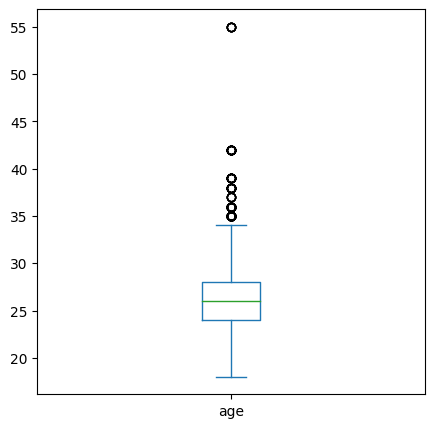

In [90]:
# Box plot of age column
df['age'].plot.box(figsize=(5,5))

*We will look at Wave that is suitable for ages over 36 to know what the nature of this meeting is (were all the ages on this date over 36?)*

In [91]:
# Filter ages over 36
filtered_df = df[df['age'] >= 36]

# Create a pivot table
pivot_table = pd.pivot_table(filtered_df, index='age', columns=filtered_df ['wave'],  values='wave',  aggfunc='count',fill_value=0)

# Print the pivot table
pivot_table

wave  4   6   7   9   12  13  15  18  20
age                                     
36     0   0  16   0  14   9   0   0   6
37     0   5   0   0   0   0   0   0   0
38     0   0   0   0   0   0  19   0   0
39    18   0   0   0   0   0   0   0   0
42     0   0   0  20   0   0   0   0   0
55     0   0   0   0   0   0   0   6   0

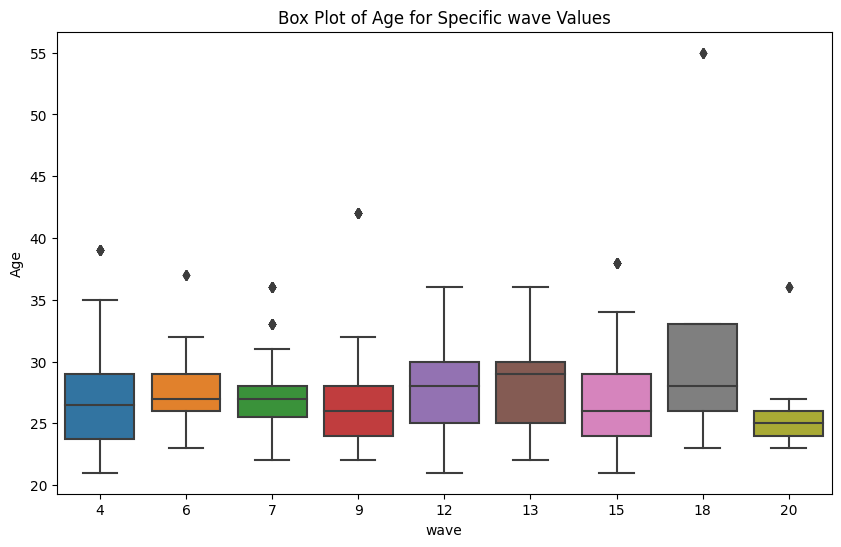

In [92]:
# Filter specific WAVE values (4, 6, 7, 9, 12, 13, 15, 18, 20)
target_wave_values = [4, 6, 7, 9, 12, 13, 15, 18, 20]
filtered_df = df[df['wave'].isin(target_wave_values)]

# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='wave', y='age')
plt.xlabel('wave')
plt.ylabel('Age')
plt.title('Box Plot of Age for Specific wave Values')
plt.show()

*To complete the missing values in the age column, we will use the "Group Statistics" method with reference to the gender column.*

In [93]:
# Let’s have a look at the distribution of gender:
df['gender'].value_counts(normalize=True)

0    0.500359
1    0.499641
Name: gender, dtype: Float64

*We can see that the gender group is evenly distributed between the sexes.*

In [94]:
grouped = df.groupby('gender')['age'].median()

for index, row in df.iterrows():
    if pd.isnull(row['age']):
        df.at[index, 'age'] = grouped[row['gender']]

In [95]:
# null observations of the column
df[df['age'].isnull()]

Empty DataFrame
Columns: [iid, id, gender, idg, condtn, wave, round, position, positin1, order, partner, pid, match, int_corr, samerace, age_o, race_o, pf_o_att, pf_o_sin, pf_o_int, pf_o_fun, pf_o_amb, pf_o_sha, dec_o, attr_o, sinc_o, intel_o, fun_o, amb_o, shar_o, like_o, prob_o, met_o, age, field, field_cd, undergra, mn_sat, tuition, race, imprace, imprelig, from, zipcode, income, goal, date, go_out, career, career_c, sports, tvsports, exercise, dining, museums, art, hiking, gaming, clubbing, reading, tv, theater, movies, concerts, music, shopping, yoga, exphappy, expnum, attr1_1, sinc1_1, intel1_1, fun1_1, amb1_1, shar1_1, attr4_1, sinc4_1, intel4_1, fun4_1, amb4_1, shar4_1, attr2_1, sinc2_1, intel2_1, fun2_1, amb2_1, shar2_1, attr3_1, sinc3_1, fun3_1, intel3_1, amb3_1, attr5_1, sinc5_1, intel5_1, fun5_1, amb5_1, dec, attr, sinc, ...]
Index: []

[0 rows x 195 columns]

In [96]:
df["age"].describe()

count       8362.0
mean     26.362712
std        3.54257
min           18.0
25%           24.0
50%           26.0
75%           28.0
max           55.0
Name: age, dtype: Float64

*According to the graph, it can be seen that for the 18th wave - the age observations of 55 are far from the other observations in the sample, so we decided to delete the value 55 in the age column.*

In [97]:
# Using drop() to delete rows based on column value
df.drop(df[df['age'] == 55].index, inplace = True)

In [98]:
df["age"].describe()

count       8356.0
mean     26.342149
std        3.45969
min           18.0
25%           24.0
50%           26.0
75%           28.0
max           42.0
Name: age, dtype: Float64

### **2.2.2 field column:**<br/>
*field of study*

In [99]:
df["field"].unique()

<StringArray>
[                                       'Law',
                                        'law',
                                  'Economics',
           'Masters in Public Administration',
           'Masters of Social Work&Education',
                                    'Finance',
                                   'Business',
                          'political science',
                                      'money',
                        'Operations Research',
 ...
                     'ELECTRICAL ENGINEERING',
                                       'Math',
                     'Biomedical engineering',
                     'Industrial Engineering',
 'Industrial Engineering/Operations Research',
          'Masters of Industrial Engineering',
                     'Biomedical Informatics',
         'MBA - Private Equity / Real Estate',
                 'General management/finance',
                           'Climate Dynamics']
Length: 259, dtype: string

In [100]:
# We can see that the column is of string type and at the same time there are values in the column that are written in uppercase letters - we will change the format to uniform so that all the values are written in lowercase letters.
df['field'] = df['field'].str.lower()

In [101]:
# We'll see if anything has changed.
df["field"].unique()

<StringArray>
[                                       'law',
                                  'economics',
           'masters in public administration',
           'masters of social work&education',
                                    'finance',
                                   'business',
                          'political science',
                                      'money',
                        'operations research',
                             'tc (health ed)',
 ...
        'biochemistry & molecular biophysics',
                                     'acting',
                           'social work/sipa',
                              'public health',
                     'industrial engineering',
 'industrial engineering/operations research',
          'masters of industrial engineering',
         'mba - private equity / real estate',
                 'general management/finance',
                           'climate dynamics']
Length: 219, dtype: string

*We can see that the amount of unique values per column has decreased from 260 to only 220 values.*

In [102]:
print(list(df["field"].unique()))

['law', 'economics', 'masters in public administration', 'masters of social work&education', 'finance', 'business', 'political science', 'money', 'operations research', 'tc (health ed)', 'psychology', 'social work', 'speech language pathology', 'speech languahe pathology', 'educational psychology', 'applied maths/econs', 'mathematics', 'statistics', 'organizational psychology', 'mechanical engineering', 'finanace', 'finance&economics', 'undergrad - gs', 'mathematical finance', 'medicine', 'mba', <NA>, 'german literature', 'business & international affairs', 'mfa creative writing', 'engineering', 'electrical engineering', 'classics', 'operations research (seas)', 'chemistry', 'journalism', 'elementary/childhood education (ma)', 'microbiology', 'masters of social work', 'communications', 'marketing', 'international educational development', 'education administration', 'business (mba)', 'computer science', 'climate-earth and environ. science', 'financial math', 'business- mba', 'religion'

In [103]:
df[df['field'].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
828    58   3       0    5       0     3     10         7        -1      9   
829    58   3       0    5       0     3     10         7        -1      5   
830    58   3       0    5       0     3     10         7        -1     10   
831    58   3       0    5       0     3     10         7        -1      1   
832    58   3       0    5       0     3     10         7        -1      6   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
5127  346   6       0   11       1    14     18        10        10     15   
5128  346   6       0   11       1    14     18        10        10     11   
5129  346   6       0   11       1    14     18        10        10     13   
5130  346   6       0   11       1    14     18        10        10      2   
5131  346   6       0   11       1    14     18        10        10      3   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
828   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
829   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
830   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
831   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
832   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
5127  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5128  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5129  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5130  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5131  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
828       <NA>    <NA>    <NA>  
829       <NA>    <NA>    <NA>  
830       <NA>    <NA>    <NA>  
831       <NA>    <NA>    <NA>  
832       <NA>    <NA>    <NA>  
...        ...     ...     ...  
5127      <NA>    <NA>    <NA>  
5128      <NA>    <NA>    <NA>  
5129      <NA>    <NA>    <NA>  
5130      <NA>    <NA>    <NA>  
5131      <NA>    <NA>    <NA>  

[63 rows x 195 columns]

*We have 63 rows with no defined value.*

### **2.2.3 field_cd column:**

*Field coded:*
*   Law  = 1
*   Math = 2
*   Social Science, Psychologist = 3
*   Medical Science, Pharmaceuticals, and Bio Tech = 4
*   Engineering = 5
*   English/Creative Writing/ Journalism = 6
*   History/Religion/Philosophy = 7
*   Business/Econ/Finance = 8
*   Education, Academia = 9
*   Biological Sciences/Chemistry/Physics = 10
*   Social Work = 11
*   Undergrad/undecided = 12
*   Political Science/International Affairs = 13
*   Film = 14
*   Fine Arts/Arts Administration = 15
*   Languages = 16
*   Architecture = 17
*   Other = 18

In [104]:
df["field_cd"].unique()

<IntegerArray>
[1, 2, 13, 8, 5, 9, 3, 11, <NA>, 12, 4, 7, 6, 10, 14, 16, 15, 17, 18]
Length: 19, dtype: Int64

In [105]:
# null observations of the column
df[df['field_cd'].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
504    40   1       1    2       1     2     19         5        -1      8   
505    40   1       1    2       1     2     19         7        -1     10   
506    40   1       1    2       1     2     19         3        -1      6   
507    40   1       1    2       1     2     19        10        -1     13   
508    40   1       1    2       1     2     19        12        -1     15   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
5127  346   6       0   11       1    14     18        10        10     15   
5128  346   6       0   11       1    14     18        10        10     11   
5129  346   6       0   11       1    14     18        10        10     13   
5130  346   6       0   11       1    14     18        10        10      2   
5131  346   6       0   11       1    14     18        10        10      3   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
504   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
505   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
506   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
507   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
508   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
5127  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5128  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5129  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5130  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5131  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
504       <NA>    <NA>    <NA>  
505       <NA>    <NA>    <NA>  
506       <NA>    <NA>    <NA>  
507       <NA>    <NA>    <NA>  
508       <NA>    <NA>    <NA>  
...        ...     ...     ...  
5127      <NA>    <NA>    <NA>  
5128      <NA>    <NA>    <NA>  
5129      <NA>    <NA>    <NA>  
5130      <NA>    <NA>    <NA>  
5131      <NA>    <NA>    <NA>  

[82 rows x 195 columns]

In [106]:
# Since column field_cd is similar in meaning to column field, we will see if the amount of missing values is equal.
# Rows where the values are missing in both columns cannot be completed, however the rows where the values are missing in column field_cd can be completed according to column field.
df[df['field_cd'].isnull() & df["field"].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
828    58   3       0    5       0     3     10         7        -1      9   
829    58   3       0    5       0     3     10         7        -1      5   
830    58   3       0    5       0     3     10         7        -1     10   
831    58   3       0    5       0     3     10         7        -1      1   
832    58   3       0    5       0     3     10         7        -1      6   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
5127  346   6       0   11       1    14     18        10        10     15   
5128  346   6       0   11       1    14     18        10        10     11   
5129  346   6       0   11       1    14     18        10        10     13   
5130  346   6       0   11       1    14     18        10        10      2   
5131  346   6       0   11       1    14     18        10        10      3   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
828   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
829   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
830   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
831   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
832   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
5127  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5128  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5129  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5130  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5131  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
828       <NA>    <NA>    <NA>  
829       <NA>    <NA>    <NA>  
830       <NA>    <NA>    <NA>  
831       <NA>    <NA>    <NA>  
832       <NA>    <NA>    <NA>  
...        ...     ...     ...  
5127      <NA>    <NA>    <NA>  
5128      <NA>    <NA>    <NA>  
5129      <NA>    <NA>    <NA>  
5130      <NA>    <NA>    <NA>  
5131      <NA>    <NA>    <NA>  

[63 rows x 195 columns]

*The number of rows in which the values are missing in both columns is 63. That is, we have 19 rows in which the missing values can be completed according to the field column.*

*After completing the entries. It will be possible to consider deleting the field column.*

In [107]:
def process_dataframe(column_keys, column_values, column_as_key, column_as_value, data_frame):
    value_dict = {}

    # Create the dictionary using column_keys and column_values
    for index, row in data_frame.iterrows():
        key = row[column_keys]
        value = row[column_values]

        if pd.notna(key) and pd.notna(value):
            if key not in value_dict:
                value_dict[key] = value

    for index, row in data_frame.iterrows():
          key_to_search = row[column_as_key]
          if pd.notna(key_to_search) and key_to_search in value_dict:
            if pd.isna(row[column_as_value]):
               data_frame.at[index, column_as_value] = value_dict[key_to_search]

    return data_frame

In [108]:
process_dataframe("field","field_cd", "field", "field_cd", df)

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1       0    1       0     1     10         7        -1      4   
1       1   1       0    1       0     1     10         7        -1      3   
2       1   1       0    1       0     1     10         7        -1     10   
3       1   1       0    1       0     1     10         7        -1      5   
4       1   1       0    1       0     1     10         7        -1      7   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
8373  552  22       1   44       1    21     22        14        10      5   
8374  552  22       1   44       1    21     22        13        10      4   
8375  552  22       1   44       1    21     22        19        10     10   
8376  552  22       1   44       1    21     22         3        10     16   
8377  552  22       1   44       1    21     22         2        10     15   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0     ...        5        7         7       7       7     <NA>     <NA>   
1     ...        5        7         7       7       7     <NA>     <NA>   
2     ...        5        7         7       7       7     <NA>     <NA>   
3     ...        5        7         7       7       7     <NA>     <NA>   
4     ...        5        7         7       7       7     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
8373  ...        8        5         7       6       7        9        5   
8374  ...        8        5         7       6       7        9        5   
8375  ...        8        5         7       6       7        9        5   
8376  ...        8        5         7       6       7        9        5   
8377  ...        8        5         7       6       7        9        5   

      intel5_3  fun5_3  amb5_3  
0         <NA>    <NA>    <NA>  
1         <NA>    <NA>    <NA>  
2         <NA>    <NA>    <NA>  
3         <NA>    <NA>    <NA>  
4         <NA>    <NA>    <NA>  
...        ...     ...     ...  
8373         9       5       6  
8374         9       5       6  
8375         9       5       6  
8376         9       5       6  
8377         9       5       6  

[8356 rows x 195 columns]

In [109]:
df[df['field_cd'].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
828    58   3       0    5       0     3     10         7        -1      9   
829    58   3       0    5       0     3     10         7        -1      5   
830    58   3       0    5       0     3     10         7        -1     10   
831    58   3       0    5       0     3     10         7        -1      1   
832    58   3       0    5       0     3     10         7        -1      6   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
5127  346   6       0   11       1    14     18        10        10     15   
5128  346   6       0   11       1    14     18        10        10     11   
5129  346   6       0   11       1    14     18        10        10     13   
5130  346   6       0   11       1    14     18        10        10      2   
5131  346   6       0   11       1    14     18        10        10      3   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
828   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
829   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
830   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
831   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
832   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
5127  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5128  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5129  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5130  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5131  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
828       <NA>    <NA>    <NA>  
829       <NA>    <NA>    <NA>  
830       <NA>    <NA>    <NA>  
831       <NA>    <NA>    <NA>  
832       <NA>    <NA>    <NA>  
...        ...     ...     ...  
5127      <NA>    <NA>    <NA>  
5128      <NA>    <NA>    <NA>  
5129      <NA>    <NA>    <NA>  
5130      <NA>    <NA>    <NA>  
5131      <NA>    <NA>    <NA>  

[63 rows x 195 columns]

*We can notice that 82 missing values remained 63, that is, thanks to the function we were able to complete the missing values.*

In [110]:
df["field_cd"].unique()

<IntegerArray>
[1, 2, 13, 8, 5, 9, 3, 11, 12, 4, <NA>, 7, 6, 10, 14, 16, 15, 17, 18]
Length: 19, dtype: Int64

In [111]:
# Remove column name 'field'
df = df.drop(['field'], axis=1)

In [112]:
 df['field_cd'] = df['field_cd'].fillna(-1)

### **2.2.4 undergra column:**<br/>
*School attended for undergraduate degree*

In [113]:
df["undergra"].unique()

<StringArray>
[                                  <NA>,
              'George Mason University',
                           'Holy Cross',
           'University of Pennsylvania',
                                 'UCLA',
                   'Swarthmore College',
                     'Columbia College',
                      'SUNY Binghamton',
                      'Barnard College',
 'school of social sciences in uruguay',
 ...
                                 'SEAS',
  'Nirma Institute of Technology-India',
    'University of Southern California',
                        'U.C. Berkeley',
                 'University of Genova',
                    'Oxford University',
       'University of Cologne, Germany',
                          'LUISS, Rome',
                               'Oxford',
   'Ecole Normale Sup\x8erieure, Paris']
Length: 242, dtype: string

In [114]:
# We can choose to convert to a lowercase
df['undergra'] = df['undergra'].str.lower()
df["undergra"].unique()

<StringArray>
[                                  <NA>,
              'george mason university',
                           'holy cross',
           'university of pennsylvania',
                                 'ucla',
                   'swarthmore college',
                     'columbia college',
                      'suny binghamton',
                      'barnard college',
 'school of social sciences in uruguay',
 ...
                                 'seas',
  'nirma institute of technology-india',
    'university of southern california',
                        'u.c. berkeley',
                 'university of genova',
                    'oxford university',
       'university of cologne, germany',
                          'luiss, rome',
                               'oxford',
   'ecole normale sup\x8erieure, paris']
Length: 235, dtype: string

In [115]:
print(list(df["undergra"].unique()))

[<NA>, 'george mason university', 'holy cross', 'university of pennsylvania', 'ucla', 'swarthmore college', 'columbia college', 'suny binghamton', 'barnard college', 'school of social sciences in uruguay', 'yale university', 'university of washington', 'columbia', 'suny stony brook', 'fudan university, shanghai, china', 'cornell', 'universidad catolica de chile', 'amherst college', 'hebrew university', 'universidad iberoamericana', "tokyo woman's christian university, japan", 'university of maryland, and oxford', 'uw madison', 'harvard', 'syracuse university', 'rice', 'smith college', 'brown university', 'university of warsaw', 'yale', 'columbia university', 'stanford', 'colby college, waterville, me', 'chungshenmedicaluniversity(taiwan)', 'wesleyan university', 'university of toronto', 'brandeis university', 'pace university', 'charles university, prague, czech republic', 'uc berkeley', 'novosibirsk state university', 'rpi', 'umass', 'unlv', 'msu, russia', 'university of north carolin

In [116]:
# Let's look at rows that include null values
df[df['undergra'].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1       0    1       0     1     10         7        -1      4   
1       1   1       0    1       0     1     10         7        -1      3   
2       1   1       0    1       0     1     10         7        -1     10   
3       1   1       0    1       0     1     10         7        -1      5   
4       1   1       0    1       0     1     10         7        -1      7   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
6369  412  16       1   32       1    15     18        15         2     14   
6370  412  16       1   32       1    15     18         3         2      2   
6371  412  16       1   32       1    15     18         1         2     18   
6372  412  16       1   32       1    15     18        11         2     10   
6373  412  16       1   32       1    15     18         6         2      5   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0     ...        5        7         7       7       7     <NA>     <NA>   
1     ...        5        7         7       7       7     <NA>     <NA>   
2     ...        5        7         7       7       7     <NA>     <NA>   
3     ...        5        7         7       7       7     <NA>     <NA>   
4     ...        5        7         7       7       7     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
6369  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
6370  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
6371  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
6372  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
6373  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
0         <NA>    <NA>    <NA>  
1         <NA>    <NA>    <NA>  
2         <NA>    <NA>    <NA>  
3         <NA>    <NA>    <NA>  
4         <NA>    <NA>    <NA>  
...        ...     ...     ...  
6369      <NA>    <NA>    <NA>  
6370      <NA>    <NA>    <NA>  
6371      <NA>    <NA>    <NA>  
6372      <NA>    <NA>    <NA>  
6373      <NA>    <NA>    <NA>  

[3454 rows x 194 columns]

In [117]:
# Fill missing values in the 'undergra' column with 'unknown'
df['undergra'].fillna('unknown', inplace=True)

### **2.2.5 mn_sat column:**<br/>
*Median SAT score for the undergraduate institution where attended. Taken from Barron’s 25th Edition college profile book. Proxy for	intelligence*

In [118]:
df["mn_sat"].unique()

<StringArray>
[      <NA>, '1,070.00', '1,258.00', '1,400.00', '1,290.00', '1,460.00',
 '1,430.00', '1,215.00', '1,330.00', '1,450.00', '1,155.00', '1,140.00',
 '1,360.00', '1,402.00', '1,250.00', '1,210.00', '1,220.00', '1,410.00',
 '1,260.00', '1,380.00', '1,030.00', '1,309.00', '1,308.00', '1,050.00',
 '1,100.00', '1,310.00', '1,490.00', '1,188.00', '1,097.00', '1,212.00',
 '1,340.00', '1,034.00', '1,185.00', '1,242.00', '1,160.00', '1,099.00',
 '1,214.00', '1,270.00', '1,110.00', '1,178.00', '1,060.00', '1,157.00',
 '1,180.00', '1,014.00', '1,341.00',      '990', '1,320.00', '1,159.00',
 '1,370.00', '1,105.00', '1,365.00', '1,011.00', '1,130.00', '1,206.00',
 '1,331.00', '1,191.00',      '914', '1,200.00', '1,080.00', '1,090.00',
 '1,092.00', '1,470.00', '1,149.00', '1,134.00', '1,230.00', '1,267.00',
 '1,280.00', '1,227.00', '1,239.00']
Length: 69, dtype: string

*We need to change the type of the column to type int*

In [119]:
# Replace the ',' and convert to int, ignoring NaN values
df['mn_sat'] = df['mn_sat'].str.replace(',', '', regex=True).astype(float).fillna(np.nan).astype('Int64')

In [120]:
df["mn_sat"].describe()

count         3126.0
mean     1299.833653
std       119.850293
min            914.0
25%           1214.0
50%           1310.0
75%           1400.0
max           1490.0
Name: mn_sat, dtype: Float64

*We will notice that the median and mean value are quite close in this column, so we will replace the missing values with the mean value of the column.*

In [121]:
# Calculate the mean value of the column
mean_value = int(df['mn_sat'].mean())

# Replace NaN values with the mean value
df['mn_sat'].fillna(mean_value, inplace=True)

In [122]:
df['mn_sat'].isnull().sum()

0

### **2.2.6 tuition column:**<br/>
*Tuition listed for each response to undergrad in Barron’s 25th Edition 			college profile book.*

In [123]:
df["tuition"].unique()

<StringArray>
[       <NA>, '12,696.00', '25,020.00', '26,630.00', '15,309.00', '26,376.00',
 '26,908.00',  '9,451.00', '24,036.00', '26,100.00',
 ...
 '21,168.00', '25,847.00', '18,656.00', '10,332.00', '27,350.00',  '9,811.00',
  '9,162.00', '16,650.00', '20,337.00', '26,562.00']
Length: 116, dtype: string

*In our opinion, this column does not provide important information, so we prefer to delete it.*

In [124]:
# Remove column name 'tuition'
df = df.drop(['tuition'], axis=1)

### **2.2.7 imprace column:**<br/>
*How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?*

In [125]:
df["imprace"].unique()

<IntegerArray>
[2, 8, 1, 4, 7, 3, 9, 10, <NA>, 5, 6, 0]
Length: 12, dtype: Int64

*We will change the value of 0 to nan and then check how we can deal with the missing value*

In [126]:
# Replace 0 with np.nan in the 'imprace' column
df['imprace'].replace(0, np.nan, inplace=True)

In [127]:
df["imprace"].isnull().sum()

87

In [128]:
# Count the occurrences of each special value in the 'mn_sat' column
df['imprace'].value_counts()

1     2785
3      979
2      952
8      663
5      657
7      542
6      524
4      508
9      409
10     250
Name: imprace, dtype: Int64

In [129]:
# replace nan with value 1 Since the most common value in the column is 1, we can choose to fill the missing values with 1.
df['imprace'].fillna(1, inplace=True)

In [130]:
df["imprace"].describe()

count      8356.0
mean     3.764122
std      2.845179
min           1.0
25%           1.0
50%           3.0
75%           6.0
max          10.0
Name: imprace, dtype: Float64

### **2.2.8 race column:**<br/>
* Black/African American = 1
* European/Caucasian-American = 2
* Latino/Hispanic American = 3
* Asian/Pacific Islander/Asian-American = 4
* Native American = 5
* Other = 6

In [131]:
df["race"].unique()

<IntegerArray>
[4, 2, 6, 3, 1, <NA>]
Length: 6, dtype: Int64

*We will notice that the value 5 is missing, however NA values appear - something that can indicate a suspicious situation.*

In [132]:
# Let's look at rows that include null values
df[df['race'].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
828    58   3       0    5       0     3     10         7        -1      9   
829    58   3       0    5       0     3     10         7        -1      5   
830    58   3       0    5       0     3     10         7        -1     10   
831    58   3       0    5       0     3     10         7        -1      1   
832    58   3       0    5       0     3     10         7        -1      6   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
5127  346   6       0   11       1    14     18        10        10     15   
5128  346   6       0   11       1    14     18        10        10     11   
5129  346   6       0   11       1    14     18        10        10     13   
5130  346   6       0   11       1    14     18        10        10      2   
5131  346   6       0   11       1    14     18        10        10      3   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
828   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
829   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
830   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
831   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
832   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
5127  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5128  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5129  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5130  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5131  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
828       <NA>    <NA>    <NA>  
829       <NA>    <NA>    <NA>  
830       <NA>    <NA>    <NA>  
831       <NA>    <NA>    <NA>  
832       <NA>    <NA>    <NA>  
...        ...     ...     ...  
5127      <NA>    <NA>    <NA>  
5128      <NA>    <NA>    <NA>  
5129      <NA>    <NA>    <NA>  
5130      <NA>    <NA>    <NA>  
5131      <NA>    <NA>    <NA>  

[63 rows x 193 columns]

In [133]:
df['race'].fillna(-1, inplace=True)

In [134]:
df.race.isnull().sum()

0

### **2.2.9 imprelig column:**<br/>
*How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?*

In [135]:
df["imprelig"].unique()

<IntegerArray>
[4, 5, 1, 3, 2, 8, 10, 6, <NA>, 7, 9]
Length: 11, dtype: Int64

In [136]:
df["imprelig"].isnull().sum()

79

In [137]:
# Count the occurrences of each special value in the 'imprelig' column
df['imprelig'].value_counts()

1     3016
3      928
2      861
5      694
6      661
4      524
8      517
7      467
10     327
9      282
Name: imprelig, dtype: Int64

In [138]:
df["imprelig"].describe()

count      8277.0
mean      3.65676
std      2.806294
min           1.0
25%           1.0
50%           3.0
75%           6.0
max          10.0
Name: imprelig, dtype: Float64

In [139]:
# replace nan with value 1 - Since the most common value in the column is 1, we can choose to fill the missing values with 1.
df['imprelig'].fillna(1, inplace=True)

In [140]:
df["imprelig"].describe()

count      8356.0
mean     3.631642
std      2.804805
min           1.0
25%           1.0
50%           3.0
75%           6.0
max          10.0
Name: imprelig, dtype: Float64

### **2.2.10 from column:**<br/>
*Where are you from originally (before coming to Columbia)?*

In [141]:
df["from"].unique()

<StringArray>
[                 'Chicago',                  'Alabama',
              'Connecticut',                    'Texas',
          'Bowdoin College',                       'MD',
      'Southern California',          'London, England',
 'Palm Springs, California',                    '94115',
 ...
           'BEIJING, CHINA',         'San Francisco/LA',
             'Born in Iran',                   'Persia',
                'Indonesia',             'India and NJ',
            'Genova, Italy',             'Milan, Italy',
                       'UK',        'London & New York']
Length: 269, dtype: string

In [142]:
df["from"].isnull().sum()

79

In [143]:
df["from"].isnull().sum()

79

In [144]:
! pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 11.6 MB/s eta 0:00:00


In [145]:
import pycountry
countries = pycountry.countries

In [146]:
# Replace NaN values with "unknown"
df['from'].fillna("unknown", inplace=True)

In [147]:
# Define a function to map a location to a country name
def map_location_to_country(location):
    for country in pycountry.countries:
        if location.lower() in country.name.lower():
            return country.name
    return location

# Apply the mapping function to the 'from' column
df['from'] = df['from'].apply(map_location_to_country)

In [148]:
(df['from'] == 'unknown').sum()

79

In [149]:
# We can choose to convert to a lowercase
df['from'] = df['from'].str.lower()

In [150]:
# Drop duplicates and count unique values
unique_values = df['from'].drop_duplicates()
unique_value_counts = unique_values.value_counts()

# Sum the unique values
unique_value_counts.sum()

242

*We will notice that at the beginning today we have about 269 special values, and now we have 242 special values.*

### **2.2.11 zipcode column:**<br/>
*What was the zip code of the area where you grew up?*

In [151]:
df["zipcode"].unique()

<StringArray>
['60,521', '35,223',  '6,268', '77,096', '94,022', '20,878', '91,360',
      '0', '19,335', '14,850',
 ...
  '7,078', '10,024',  '8,805', '95,831', '94,121', '16,146', '50,354',
    '136', '11,570', '78,110']
Length: 409, dtype: string

In [152]:
df = df.drop('zipcode', axis=1)

### **2.2.12 income column:**<br/>
*Median household income based on zipcode*

In [153]:
df["income"].unique()

<StringArray>
['69,487.00', '65,929.00',        <NA>, '37,754.00', '86,340.00', '60,304.00',
 '54,620.00', '48,652.00', '29,237.00', '56,580.00',
 ...
 '72,412.00', '36,510.00', '32,386.00', '15,863.00', '46,272.00', '48,137.00',
 '61,686.00', '47,624.00', '36,673.00', '55,138.00']
Length: 261, dtype: string

*We need to change the type of the column to type int*

In [154]:
# Replace the ',' and convert to int, ignoring NaN values
df['income'] = df['income'].str.replace(',', '', regex=True).astype(float).fillna(np.nan).astype('Int64')

In [155]:
df['income'].isnull().sum()

4091

In [156]:
df["income"].describe()

count          4265.0
mean       44874.3449
std      17206.254312
min            8607.0
25%           31516.0
50%           43185.0
75%           53940.0
max          109031.0
Name: income, dtype: Float64

*We will notice that the median and mean value are quite close in this column, so we will replace the missing values with the mean value of the column.*

In [157]:
# Calculate the mean value of the column
mean_value = int(df['income'].mean())

# Replace NaN values with the mean value
df['income'].fillna(mean_value, inplace=True)

In [158]:
df['income'].isnull().sum()

0

### **2.2.13 goal column:**<br/>
*What is your primary goal in participating in this event?*
*   Seemed like a fun night out = 1
*   To meet new people = 2
*   To get a date = 3
*   Looking for a serious relationship = 4
*   To say I did it = 5
*   Other = 6

In [159]:
df["goal"].unique()

<IntegerArray>
[2, 1, 6, 3, 4, <NA>, 5]
Length: 7, dtype: Int64

In [160]:
# We can look at the rows where the values are missing
df[df['goal'].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
312    28   8       0   15       1     2     16         1        -1      3   
313    28   8       0   15       1     2     16         1        -1      4   
314    28   8       0   15       1     2     16         1        -1      5   
315    28   8       0   15       1     2     16         1        -1      8   
316    28   8       0   15       1     2     16         1        -1     12   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
5127  346   6       0   11       1    14     18        10        10     15   
5128  346   6       0   11       1    14     18        10        10     11   
5129  346   6       0   11       1    14     18        10        10     13   
5130  346   6       0   11       1    14     18        10        10      2   
5131  346   6       0   11       1    14     18        10        10      3   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
312   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
313   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
314   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
315   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
316   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
5127  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5128  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5129  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5130  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5131  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
312       <NA>    <NA>    <NA>  
313       <NA>    <NA>    <NA>  
314       <NA>    <NA>    <NA>  
315       <NA>    <NA>    <NA>  
316       <NA>    <NA>    <NA>  
...        ...     ...     ...  
5127      <NA>    <NA>    <NA>  
5128      <NA>    <NA>    <NA>  
5129      <NA>    <NA>    <NA>  
5130      <NA>    <NA>    <NA>  
5131      <NA>    <NA>    <NA>  

[79 rows x 192 columns]

*It can be noticed that we have 76 missing values.<br/>
We know that a missing value can happen for several reasons - for example, unknown, or not applicable.<br/>
We will change in this case to the value 6 instead of the missing values.*

In [161]:
# Create a table with unique values and their counts
df.groupby("goal")["goal"].count()

goal
1    3419
2    3008
3     630
4     299
5     510
6     411
Name: goal, dtype: int64

In [162]:
# For the missing values in the column, we will put the value -1.
df['goal'] = df['goal'].fillna(-1)

In [163]:
# We can see that there is now the value 1- in the column.
df.groupby("goal")["goal"].count()

goal
-1      79
1     3419
2     3008
3      630
4      299
5      510
6      411
Name: goal, dtype: int64

### **2.2.14 date column:**<br/>
*In general, how frequently do you go on dates?*
	Several times a week=1

*   Several times a week = 1
*   Twice a week = 2
*   Once a week = 3
*   Twice a month = 4
*   Once a month = 5
*   Several times a year = 6
*   Almost never = 7

In [164]:
df["date"].unique()

<IntegerArray>
[7, 5, 3, 4, 6, 1, <NA>, 2]
Length: 8, dtype: Int64

In [165]:
#  Rows with values are missing
df[df['date'].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
312    28   8       0   15       1     2     16         1        -1      3   
313    28   8       0   15       1     2     16         1        -1      4   
314    28   8       0   15       1     2     16         1        -1      5   
315    28   8       0   15       1     2     16         1        -1      8   
316    28   8       0   15       1     2     16         1        -1     12   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
6387  413  17       1   34       1    15     18        15         3     13   
6388  413  17       1   34       1    15     18         3         3      1   
6389  413  17       1   34       1    15     18         1         3     17   
6390  413  17       1   34       1    15     18        11         3      9   
6391  413  17       1   34       1    15     18         6         3      4   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
312   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
313   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
314   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
315   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
316   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
6387  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
6388  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
6389  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
6390  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
6391  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
312       <NA>    <NA>    <NA>  
313       <NA>    <NA>    <NA>  
314       <NA>    <NA>    <NA>  
315       <NA>    <NA>    <NA>  
316       <NA>    <NA>    <NA>  
...        ...     ...     ...  
6387      <NA>    <NA>    <NA>  
6388      <NA>    <NA>    <NA>  
6389      <NA>    <NA>    <NA>  
6390      <NA>    <NA>    <NA>  
6391      <NA>    <NA>    <NA>  

[97 rows x 192 columns]

*We see that we have 97 missing values.<br/>
In this case, we will set a value for NA and mark it as -1.*

In [166]:
# For the missing values in the column, we will put the value -1.
df['date'] = df['date'].fillna(-1)

In [167]:
df.groupby("date")["date"].count()

date
-1      97
1       94
2      308
3      778
4     2038
5     1526
6     2091
7     1424
Name: date, dtype: int64

### **2.2.15 go_out column:**<br/>
*How often do you go out (not necessarily on dates)?*
* Several times a week = 1
* Twice a week = 2
* Once a week = 3
* Twice a month = 4
* Once a month = 5
* Several times a year = 6
* Almost never = 7


In [168]:
df["go_out"].unique()

<IntegerArray>
[1, 4, 2, <NA>, 3, 7, 5, 6]
Length: 8, dtype: Int64

In [169]:
# Let's look at rows that include null values
df[df['go_out'].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
312    28   8       0   15       1     2     16         1        -1      3   
313    28   8       0   15       1     2     16         1        -1      4   
314    28   8       0   15       1     2     16         1        -1      5   
315    28   8       0   15       1     2     16         1        -1      8   
316    28   8       0   15       1     2     16         1        -1     12   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
5127  346   6       0   11       1    14     18        10        10     15   
5128  346   6       0   11       1    14     18        10        10     11   
5129  346   6       0   11       1    14     18        10        10     13   
5130  346   6       0   11       1    14     18        10        10      2   
5131  346   6       0   11       1    14     18        10        10      3   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
312   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
313   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
314   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
315   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
316   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
5127  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5128  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5129  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5130  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5131  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
312       <NA>    <NA>    <NA>  
313       <NA>    <NA>    <NA>  
314       <NA>    <NA>    <NA>  
315       <NA>    <NA>    <NA>  
316       <NA>    <NA>    <NA>  
...        ...     ...     ...  
5127      <NA>    <NA>    <NA>  
5128      <NA>    <NA>    <NA>  
5129      <NA>    <NA>    <NA>  
5130      <NA>    <NA>    <NA>  
5131      <NA>    <NA>    <NA>  

[79 rows x 192 columns]

*We see that we have 79 missing values.<br/>
In this case, we will set a value for NA and mark it as -1.*

In [170]:
df['go_out'] = df['go_out'].fillna(-1)

In [171]:
df.groupby("go_out")["go_out"].count()

go_out
-1      79
1     2603
2     2987
3     1939
4      449
5      164
6       98
7       37
Name: go_out, dtype: int64

### **2.2.16 career column:**<br/>
*What is your intended career?*

In [172]:
df["career"].unique()

<StringArray>
[                                                         'lawyer',
                                                             'law',
                                                       'Economist',
                                              'lawyer/policy work',
                                                             'Law',
                                                      'Journalist',
                                     'Congresswoman, and comedian',
                 'To create early childhood intervention programs',
                               'Academia, Research, Banking, Life',
                                                'Corporate Lawyer',
 ...
                                                         'Science',
                                            'self-made millionare',
                                       'Academic Work, Consultant',
                                              'To go into Finance',
                             

In [173]:
# We can choose to convert to a lowercase
df['career'] = df['career'].str.lower()
df["career"].unique()

<StringArray>
[                                                         'lawyer',
                                                             'law',
                                                       'economist',
                                              'lawyer/policy work',
                                                      'journalist',
                                     'congresswoman, and comedian',
                 'to create early childhood intervention programs',
                               'academia, research, banking, life',
                                                'corporate lawyer',
                                              'corporate attorney',
 ...
                                                         'science',
                                            'self-made millionare',
                                       'academic work, consultant',
                                              'to go into finance',
                             

In [174]:
# Let's look at rows that include null values
df[df['career'].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
312    28   8       0   15       1     2     16         1        -1      3   
313    28   8       0   15       1     2     16         1        -1      4   
314    28   8       0   15       1     2     16         1        -1      5   
315    28   8       0   15       1     2     16         1        -1      8   
316    28   8       0   15       1     2     16         1        -1     12   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
5127  346   6       0   11       1    14     18        10        10     15   
5128  346   6       0   11       1    14     18        10        10     11   
5129  346   6       0   11       1    14     18        10        10     13   
5130  346   6       0   11       1    14     18        10        10      2   
5131  346   6       0   11       1    14     18        10        10      3   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
312   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
313   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
314   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
315   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
316   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
5127  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5128  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5129  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5130  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5131  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
312       <NA>    <NA>    <NA>  
313       <NA>    <NA>    <NA>  
314       <NA>    <NA>    <NA>  
315       <NA>    <NA>    <NA>  
316       <NA>    <NA>    <NA>  
...        ...     ...     ...  
5127      <NA>    <NA>    <NA>  
5128      <NA>    <NA>    <NA>  
5129      <NA>    <NA>    <NA>  
5130      <NA>    <NA>    <NA>  
5131      <NA>    <NA>    <NA>  

[89 rows x 192 columns]

*According to the results, we can see that we have 89 rows in the Career column with a missing value.*

### **2.2.17 career_c column:**<br/>
*career coded:*<br/>
*   Lawyer = 1
*   Academic/Research = 2
*   Psychologist = 3
*   Doctor/Medicine = 4
*   Engineer = 5
*   Creative Arts/Entertainment = 6
*   Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin = 7
*   Real Estate = 8
*   International/Humanitarian Affairs = 9
*   Undecided = 10
*   Social Work = 11
*   Speech Pathology = 12
*   Politics = 13
*   Pro sports/Athletics = 14
*   Other = 15
*   Journalism = 16
*   Architecture = 17

In [175]:
# Viewing the special values in the column
df["career_c"].unique()

<IntegerArray>
[<NA>, 1, 6, 9, 2, 7, 10, 5, 3, 4, 14, 11, 8, 15, 12, 17, 13, 16]
Length: 18, dtype: Int64

*It can be noticed that the value 17 is not at all in the column.*

In [176]:
df[df['career_c'].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1       0    1       0     1     10         7        -1      4   
1       1   1       0    1       0     1     10         7        -1      3   
2       1   1       0    1       0     1     10         7        -1     10   
3       1   1       0    1       0     1     10         7        -1      5   
4       1   1       0    1       0     1     10         7        -1      7   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
5127  346   6       0   11       1    14     18        10        10     15   
5128  346   6       0   11       1    14     18        10        10     11   
5129  346   6       0   11       1    14     18        10        10     13   
5130  346   6       0   11       1    14     18        10        10      2   
5131  346   6       0   11       1    14     18        10        10      3   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0     ...        5        7         7       7       7     <NA>     <NA>   
1     ...        5        7         7       7       7     <NA>     <NA>   
2     ...        5        7         7       7       7     <NA>     <NA>   
3     ...        5        7         7       7       7     <NA>     <NA>   
4     ...        5        7         7       7       7     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
5127  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5128  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5129  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5130  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5131  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
0         <NA>    <NA>    <NA>  
1         <NA>    <NA>    <NA>  
2         <NA>    <NA>    <NA>  
3         <NA>    <NA>    <NA>  
4         <NA>    <NA>    <NA>  
...        ...     ...     ...  
5127      <NA>    <NA>    <NA>  
5128      <NA>    <NA>    <NA>  
5129      <NA>    <NA>    <NA>  
5130      <NA>    <NA>    <NA>  
5131      <NA>    <NA>    <NA>  

[138 rows x 192 columns]

*We will notice that we have 138 rows in which the career_c column is missing values.<br/> We will check which rows are missing the values in both columns, career_c column  and career column .*

In [177]:
df[df['career_c'].isnull() & df["career"].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
312    28   8       0   15       1     2     16         1        -1      3   
313    28   8       0   15       1     2     16         1        -1      4   
314    28   8       0   15       1     2     16         1        -1      5   
315    28   8       0   15       1     2     16         1        -1      8   
316    28   8       0   15       1     2     16         1        -1     12   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
5127  346   6       0   11       1    14     18        10        10     15   
5128  346   6       0   11       1    14     18        10        10     11   
5129  346   6       0   11       1    14     18        10        10     13   
5130  346   6       0   11       1    14     18        10        10      2   
5131  346   6       0   11       1    14     18        10        10      3   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
312   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
313   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
314   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
315   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
316   ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
5127  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5128  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5129  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5130  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5131  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
312       <NA>    <NA>    <NA>  
313       <NA>    <NA>    <NA>  
314       <NA>    <NA>    <NA>  
315       <NA>    <NA>    <NA>  
316       <NA>    <NA>    <NA>  
...        ...     ...     ...  
5127      <NA>    <NA>    <NA>  
5128      <NA>    <NA>    <NA>  
5129      <NA>    <NA>    <NA>  
5130      <NA>    <NA>    <NA>  
5131      <NA>    <NA>    <NA>  

[89 rows x 192 columns]

*We will note that the number of missing rows only, which is the same in both columns, is 89. That is, we can try to complete the values that are missing in column career_c (about 49 values) with the help of column career.*

 <font color='red'>*After completing the values in the column, we can determine whether it is right for us to leave the career column.*</font>

In [178]:
# We will use the function we created to fill in the missing values
process_dataframe("career", "career_c", "career", "career_c", df)

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1       0    1       0     1     10         7        -1      4   
1       1   1       0    1       0     1     10         7        -1      3   
2       1   1       0    1       0     1     10         7        -1     10   
3       1   1       0    1       0     1     10         7        -1      5   
4       1   1       0    1       0     1     10         7        -1      7   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
8373  552  22       1   44       1    21     22        14        10      5   
8374  552  22       1   44       1    21     22        13        10      4   
8375  552  22       1   44       1    21     22        19        10     10   
8376  552  22       1   44       1    21     22         3        10     16   
8377  552  22       1   44       1    21     22         2        10     15   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0     ...        5        7         7       7       7     <NA>     <NA>   
1     ...        5        7         7       7       7     <NA>     <NA>   
2     ...        5        7         7       7       7     <NA>     <NA>   
3     ...        5        7         7       7       7     <NA>     <NA>   
4     ...        5        7         7       7       7     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
8373  ...        8        5         7       6       7        9        5   
8374  ...        8        5         7       6       7        9        5   
8375  ...        8        5         7       6       7        9        5   
8376  ...        8        5         7       6       7        9        5   
8377  ...        8        5         7       6       7        9        5   

      intel5_3  fun5_3  amb5_3  
0         <NA>    <NA>    <NA>  
1         <NA>    <NA>    <NA>  
2         <NA>    <NA>    <NA>  
3         <NA>    <NA>    <NA>  
4         <NA>    <NA>    <NA>  
...        ...     ...     ...  
8373         9       5       6  
8374         9       5       6  
8375         9       5       6  
8376         9       5       6  
8377         9       5       6  

[8356 rows x 192 columns]

In [179]:
df[df['career_c'].isnull()]

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
20      3   3       0    5       0     1     10         9        -1      6   
21      3   3       0    5       0     1     10         9        -1      5   
22      3   3       0    5       0     1     10         9        -1      2   
23      3   3       0    5       0     1     10         9        -1      7   
24      3   3       0    5       0     1     10         9        -1      9   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
5127  346   6       0   11       1    14     18        10        10     15   
5128  346   6       0   11       1    14     18        10        10     11   
5129  346   6       0   11       1    14     18        10        10     13   
5130  346   6       0   11       1    14     18        10        10      2   
5131  346   6       0   11       1    14     18        10        10      3   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
20    ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
21    ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
22    ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
23    ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
24    ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
5127  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5128  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5129  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5130  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   
5131  ...     <NA>     <NA>      <NA>    <NA>    <NA>     <NA>     <NA>   

      intel5_3  fun5_3  amb5_3  
20        <NA>    <NA>    <NA>  
21        <NA>    <NA>    <NA>  
22        <NA>    <NA>    <NA>  
23        <NA>    <NA>    <NA>  
24        <NA>    <NA>    <NA>  
...        ...     ...     ...  
5127      <NA>    <NA>    <NA>  
5128      <NA>    <NA>    <NA>  
5129      <NA>    <NA>    <NA>  
5130      <NA>    <NA>    <NA>  
5131      <NA>    <NA>    <NA>  

[118 rows x 192 columns]

In [180]:
# Viewing the special values in the column
df["career_c"].unique()

<IntegerArray>
[1, <NA>, 6, 9, 2, 7, 10, 5, 3, 4, 14, 11, 8, 15, 12, 17, 13, 16]
Length: 18, dtype: Int64

In [181]:
# Let's look at the values that are missing in the career_c column but not missing in the career column
df.loc[(df["career_c"].isnull()) &(df["career"].notnull()) ,["career_c", "career"]]

career_c             career
20       <NA>          economist
21       <NA>          economist
22       <NA>          economist
23       <NA>          economist
24       <NA>          economist
25       <NA>          economist
26       <NA>          economist
27       <NA>          economist
28       <NA>          economist
29       <NA>          economist
504      <NA>  tech professional
505      <NA>  tech professional
506      <NA>  tech professional
507      <NA>  tech professional
508      <NA>  tech professional
509      <NA>  tech professional
510      <NA>  tech professional
511      <NA>  tech professional
512      <NA>  tech professional
513      <NA>  tech professional
514      <NA>  tech professional
515      <NA>  tech professional
516      <NA>  tech professional
517      <NA>  tech professional
518      <NA>  tech professional
519      <NA>  tech professional
520      <NA>  tech professional
521      <NA>  tech professional
522      <NA>  tech professional

In [182]:
# We will manually fill in the appropriate value in the career_c column based on the values in the career column
df.loc[(df['career'] == "economist") & (df["career_c"].isnull()),"career_c"] = 7
df.loc[(df['career'] == "tech professional") & (df["career_c"].isnull()),"career_c"] = 15 # As other

In [183]:
# We will check whether the change has been made
df.loc[(df["career_c"].isnull()) &(df["career"].notnull()) ,["career_c", "career"]]

Empty DataFrame
Columns: [career_c, career]
Index: []

In [184]:
df['career_c'].isnull().sum()

89

In [185]:
df['career_c'] = df['career_c'].fillna(-1)

In [186]:
df['career_c'].unique()

<IntegerArray>
[1, 7, 6, 9, 2, 10, 5, 3, -1, 4, 15, 14, 11, 8, 12, 17, 13, 16]
Length: 18, dtype: Int64

In [187]:
# Remove column name 'career'
df = df.drop(['career'], axis=1)

### **2.2.18 How interested are you in the following activities, on a scale of 1-10?**<br/>
* sports: Playing sports/ athletics
* tvsports: Watching sports
* excersice: Body building/exercising
* dining: Dining out
* museums: Museums/galleries
* art: Art
* hiking:  Hiking/camping
* gaming: Gaming
* clubbing: Dancing/clubbing
* reading: Reading
* tv: Watching TV
* theater: Theater
* movies: Movies
* concerts: Going to concerts
* music: Music
* shopping: Shopping
* yoga: Yoga/meditation

In [188]:
# The special values in each column
list_columns = ['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga']

# Check unique values of each column
for column in list_columns:
     print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: sports - Unique Values: <IntegerArray>
[9, 3, 1, 7, 10, 5, 2, 4, 8, <NA>, 6]
Length: 11, dtype: Int64
Column: tvsports - Unique Values: <IntegerArray>
[2, 8, 1, 4, 3, 9, 7, 6, 5, 10, <NA>]
Length: 11, dtype: Int64
Column: exercise - Unique Values: <IntegerArray>
[8, 7, 6, 9, 4, 1, 2, 5, 10, 3, <NA>]
Length: 11, dtype: Int64
Column: dining - Unique Values: <IntegerArray>
[9, 10, 8, 7, 6, 5, <NA>, 3, 4, 1, 2]
Length: 11, dtype: Int64
Column: museums - Unique Values: <IntegerArray>
[1, 8, 5, 6, 10, 9, 7, 3, 4, <NA>, 2, 0]
Length: 12, dtype: Int64
Column: art - Unique Values: <IntegerArray>
[1, 6, 5, 7, 8, 10, 9, 3, 4, <NA>, 2, 0]
Length: 12, dtype: Int64
Column: hiking - Unique Values: <IntegerArray>
[5, 3, 8, 7, 6, 9, 2, 4, 10, 1, <NA>, 0]
Length: 12, dtype: Int64
Column: gaming - Unique Values: <IntegerArray>
[1, 5, 4, 6, 2, 3, 7, 8, 10, <NA>, 9, 14, 0]
Length: 13, dtype: Int64
Column: clubbing - Unique Values: <IntegerArray>
[5, 8, 7, 6, 10, 4, 9, 2, 3, <NA>, 1, 0]
Length: 12, 

In [189]:
column_list = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

# Calculate the count of missing values in each column
missing_value_counts = df[column_list].isna().sum()

# Print the result
print(missing_value_counts)

sports      79
tvsports    79
exercise    79
dining      79
museums     79
art         79
hiking      79
gaming      79
clubbing    79
reading     79
tv          79
theater     79
movies      79
concerts    79
music       79
shopping    79
yoga        79
dtype: int64


In [190]:
df.loc[df["exercise"].isnull(), ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']]

sports  tvsports  exercise  dining  museums   art  hiking  gaming  \
312     <NA>      <NA>      <NA>    <NA>     <NA>  <NA>    <NA>    <NA>   
313     <NA>      <NA>      <NA>    <NA>     <NA>  <NA>    <NA>    <NA>   
314     <NA>      <NA>      <NA>    <NA>     <NA>  <NA>    <NA>    <NA>   
315     <NA>      <NA>      <NA>    <NA>     <NA>  <NA>    <NA>    <NA>   
316     <NA>      <NA>      <NA>    <NA>     <NA>  <NA>    <NA>    <NA>   
...      ...       ...       ...     ...      ...   ...     ...     ...   
5127    <NA>      <NA>      <NA>    <NA>     <NA>  <NA>    <NA>    <NA>   
5128    <NA>      <NA>      <NA>    <NA>     <NA>  <NA>    <NA>    <NA>   
5129    <NA>      <NA>      <NA>    <NA>     <NA>  <NA>    <NA>    <NA>   
5130    <NA>      <NA>      <NA>    <NA>     <NA>  <NA>    <NA>    <NA>   
5131    <NA>      <NA>      <NA>    <NA>     <NA>  <NA>    <NA>    <NA>   

      clubbing  reading    tv  theater  movies  concerts  music  shopping  \
312       <NA>     <NA>  <NA>     <NA>    <NA>      <NA>   <NA>      <NA>   
313       <NA>     <NA>  <NA>     <NA>    <NA>      <NA>   <NA>      <NA>   
314       <NA>     <NA>  <NA>     <NA>    <NA>      <NA>   <NA>      <NA>   
315       <NA>     <NA>  <NA>     <NA>    <NA>      <NA>   <NA>      <NA>   
316       <NA>     <NA>  <NA>     <NA>    <NA>      <NA>   <NA>      <NA>   
...        ...      ...   ...      ...     ...       ...    ...       ...   
5127      <NA>     <NA>  <NA>     <NA>    <NA>      <NA>   <NA>      <NA>   
5128      <NA>     <NA>  <NA>     <NA>    <NA>      <NA>   <NA>      <NA>   
5129      <NA>     <NA>  <NA>     <NA>    <NA>      <NA>   <NA>      <NA>   
5130      <NA>     <NA>  <NA>     <NA>    <NA>      <NA>   <NA>      <NA>   
5131      <NA>     <NA>  <NA>     <NA>    <NA>      <NA>   <NA>      <NA>   

      yoga  
312   <NA>  
313   <NA>  
314   <NA>  
315   <NA>  
316   <NA>  
...    ...  
5127  <NA>  
5128  <NA>  
5129  <NA>  
5130  <NA>  
5131  <NA>  

[79 rows x 17 columns]

*It can be seen that the values are missing in the same positions for all columns.*

In [191]:
df[['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga']].describe()

sports  tvsports  exercise    dining   museums       art    hiking  \
count    8277.0    8277.0    8277.0    8277.0    8277.0    8277.0    8277.0   
mean    6.42757  4.574242  6.248037  7.784584  6.986469  6.715114  5.734928   
std    2.616402  2.801505  2.415958   1.75392  2.051314  2.262238  2.568737   
min         1.0       1.0       1.0       1.0       0.0       0.0       0.0   
25%         4.0       2.0       5.0       7.0       6.0       5.0       4.0   
50%         7.0       4.0       6.0       8.0       7.0       7.0       6.0   
75%         9.0       7.0       8.0       9.0       9.0       8.0       8.0   
max        10.0      10.0      10.0      10.0      10.0      10.0      10.0   

         gaming  clubbing   reading        tv   theater    movies  concerts  \
count    8277.0    8277.0    8277.0    8277.0    8277.0    8277.0    8277.0   
mean   3.882808   5.74846  7.680198  5.305545  6.779389  7.925577  6.822037   
std    2.621027  2.500901  2.002671  2.529867  2.233721  1.694679  2.155194   
min         0.0       0.0       1.0       1.0       0.0       0.0       0.0   
25%         2.0       4.0       7.0       3.0       5.0       7.0       5.0   
50%         3.0       6.0       8.0       6.0       7.0       8.0       7.0   
75%         6.0       8.0       9.0       7.0       9.0       9.0       8.0   
max        14.0      10.0      13.0      10.0      10.0      10.0      10.0   

          music  shopping      yoga  
count    8277.0    8277.0    8277.0  
mean    7.85055  5.636946  4.341911  
std    1.793001  2.606551  2.717316  
min         1.0       1.0       0.0  
25%         7.0       4.0       2.0  
50%         8.0       6.0       4.0  
75%         9.0       8.0       7.0  
max        10.0      10.0      10.0

In [192]:
column_list = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

# Replace 0 with np.nan in the specified columns
df[column_list] = df[column_list].replace(0, np.nan)

In [193]:
column_list = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

# Fill missing values with the mean of each column
for column in column_list:
    mean_value = int(df[column].mean())
    df[column].fillna(mean_value, inplace=True)

In [194]:
column_list = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

# Calculate the count of missing values in each column
missing_value_counts = df[column_list].isna().sum()

# Print the result
print(missing_value_counts)

sports      0
tvsports    0
exercise    0
dining      0
museums     0
art         0
hiking      0
gaming      0
clubbing    0
reading     0
tv          0
theater     0
movies      0
concerts    0
music       0
shopping    0
yoga        0
dtype: int64


### **2.2.19 exphappy column:**<br/>
*Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event*?

In [195]:
# Viewing the special values in the column
df["exphappy"].unique()

<IntegerArray>
[3, 4, 1, 7, 6, 8, 5, 10, <NA>, 2, 9]
Length: 11, dtype: Int64

In [196]:
df['exphappy'].value_counts()

5     2028
6     1998
7     1474
4      792
3      706
8      511
2      297
9      216
10     118
1      115
Name: exphappy, dtype: Int64

In [197]:
df["exphappy"].isnull().sum()

101

In [198]:
# Replace missing values in 'exphappy' column with the most frequent value
most_frequent_value = df['exphappy'].mode()[0]
df['exphappy'].fillna(most_frequent_value, inplace=True)

In [199]:
df['exphappy'].value_counts()

5     2129
6     1998
7     1474
4      792
3      706
8      511
2      297
9      216
10     118
1      115
Name: exphappy, dtype: Int64

### **2.2.20 expnum column:**<br/>
*Out of the 20 people you will meet, how many do you expect will be interested in dating you?*

In [200]:
# Viewing the special values in the column
df["expnum"].unique()

<IntegerArray>
[2, 5, 10, 3, 15, 20, 4, 9, 19, 0, <NA>, 8, 12, 1, 7, 6, 18, 14, 13]
Length: 19, dtype: Int64

*Note that the value 11,16 and 17 do not appear in the list.*

In [201]:
# Replace 0 with np.nan in the specified columns
df['expnum'] = df['expnum'].replace(0, np.nan)

In [202]:
df["expnum"].isnull().sum()

6679

In [203]:
# Define the groups based on the 'wave' column
group1_waves = [1, 2, 3, 4, 5]
group2_waves = [6, 7, 8, 9]
group3_waves = list(range(10, 22))

# Create a mask for each group
mask1 = df['wave'].isin(group1_waves)
mask2 = df['wave'].isin(group2_waves)
mask3 = df['wave'].isin(group3_waves)

# Count non-empty rows in 'expnum' for each group
count_group1 = df.loc[mask1, 'expnum'].count()
count_group2 = df.loc[mask2, 'expnum'].count()
count_group3 = df.loc[mask3, 'expnum'].count()

# Print the counts for each group
print("Group 1 (waves 1-5):", count_group1)
print("Group 2 (waves 6-9):", count_group2)
print("Group 3 (waves 10-21):", count_group3)

Group 1 (waves 1-5): 1677
Group 2 (waves 6-9): 0
Group 3 (waves 10-21): 0


In [204]:
# Create a function to group waves into categories
def wave_group(wave):
    if 1 <= wave <= 5:
        return 'Group 1'
    elif 6 <= wave <= 9:
        return 'Group 2'
    elif 10 <= wave <= 21:
        return 'Group 3'
    else:
        return 'Unknown'

# Apply the wave grouping function to create a new column
df['wave_group'] = df['wave'].apply(wave_group)

# Count missing values in 'expnum' column within each wave group
missing_expnum_count = df.groupby('wave_group')['expnum'].apply(lambda x: x.isnull().sum())

# Drop the 'wave_group' column if you don't need it
df.drop('wave_group', axis=1, inplace=True)

# Print the missing value counts
print(missing_expnum_count)

wave_group
Group 1     159
Group 2    1562
Group 3    4958
Name: expnum, dtype: int64


In [205]:
# Find the most frequent value in the "expnum" column for rows where "wave" is between 1 and 5
most_frequent_value = df[df['wave'].between(1, 5)]['expnum'].mode().iloc[0]

# Fill missing values in "expnum" within the subset of rows where "wave" is between 1 and 5
df.loc[df['wave'].between(1, 5) & df['expnum'].isna(), 'expnum'] = most_frequent_value

# Fill missing values in "expnum" with the constant frequent value for the rest of the rows
df['expnum'].fillna(most_frequent_value, inplace=True)

In [206]:
df['expnum'].value_counts().reset_index()

index  expnum
0       3    6949
1       2     260
2       5     229
3       4     204
4      10     175
5       1     122
6       6      91
7       8      51
8      20      49
9      15      40
10      9      39
11      7      38
12     12      36
13     18      36
14     14      18
15     19      10
16     13       9

In [207]:
def wave_group(wave):
    if 1 <= wave <= 5:
        return 'Group 1'
    elif 6 <= wave <= 9:
        return 'Group 2'
    elif 10 <= wave <= 21:
        return 'Group 3'
    else:
        return 'Unknown'

# Apply the wave grouping function to create a new column
df['wave_group'] = df['wave'].apply(wave_group)

# Count missing values in 'expnum' column within each wave group
missing_expnum_count = df.groupby('wave_group')['expnum'].apply(lambda x: x.isnull().sum())

# Drop the 'wave_group' column if you don't need it
df.drop('wave_group', axis=1, inplace=True)

# Print the missing value counts
print(missing_expnum_count)

wave_group
Group 1    0
Group 2    0
Group 3    0
Name: expnum, dtype: int64


### ***We want to know what you look for in the opposite sex.***<br/>
*   **Waves 6-9**: Please rate the importance of the following attributes in a potential date on a scale of 1-10 (1=not at all important, 10=extremely important)
*   **Waves 1-5, 10-21**: You have 100 points to distribute among the following attributes -- give more points to those attributes that are more important in a potential date, and fewer points to those attributes that are less important in a potential date.  Total points must equal 100.

In [208]:
df.pivot_table(index='gender', values=["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "shar1_1", "amb1_1"], aggfunc='count')

amb1_1  attr1_1  fun1_1  intel1_1  shar1_1  sinc1_1
gender                                                     
0         4119     4119    4119      4119     4097     4119
1         4140     4158    4149      4158     4140     4158

In [209]:
df_copy = df.copy()
wave_bins = [0, 5, 9, 21]
wave_labels = ['wave 1-5', 'wave 6-9', 'wave 10-21']

df_copy['wave_group'] = pd.cut(df_copy['wave'], bins=wave_bins, labels=wave_labels)
columns_to_count = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "shar1_1", "amb1_1"]

# Create the pivot table with multiple indices (gender and wave_group), count as the aggregation function, and sort_index
df_copy.pivot_table(index=['gender', 'wave_group'], values=columns_to_count, aggfunc='count').sort_index()

amb1_1  attr1_1  fun1_1  intel1_1  shar1_1  sinc1_1
gender wave_group                                                     
0      wave 1-5       882      882     882       882      882      882
       wave 6-9       776      776     776       776      776      776
       wave 10-21    2461     2461    2461      2461     2439     2461
1      wave 1-5       900      918     909       918      900      918
       wave 6-9       781      781     781       781      781      781
       wave 10-21    2459     2459    2459      2459     2459     2459

In [210]:
df[["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "shar1_1", "amb1_1"]].describe()

attr1_1    sinc1_1   intel1_1     fun1_1    shar1_1    amb1_1
count     8277.0     8277.0     8277.0     8268.0     8237.0    8259.0
mean   22.492924  17.408799  20.269943  17.456027  11.834658  10.69182
std    12.576389   7.031467   6.785181   6.085196   6.351223  6.121677
min          0.0        0.0        0.0        0.0        0.0       0.0
25%         15.0       15.0      17.39       15.0       9.52       5.0
50%         20.0      18.37       20.0       18.0      10.64      10.0
75%         25.0       20.0      23.81       20.0       16.0      15.0
max        100.0       60.0       50.0       50.0       30.0      53.0

In [211]:
df.loc[(df['wave']>=6)&(df['wave']<=9),["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "shar1_1", "amb1_1"]]

attr1_1  sinc1_1  intel1_1  fun1_1  shar1_1  amb1_1
1846    16.67    16.67     16.67   16.67    16.67   16.67
1847    16.67    16.67     16.67   16.67    16.67   16.67
1848    16.67    16.67     16.67   16.67    16.67   16.67
1849    16.67    16.67     16.67   16.67    16.67   16.67
1850    16.67    16.67     16.67   16.67    16.67   16.67
...       ...      ...       ...     ...      ...     ...
3403     14.0     20.0      18.0    16.0     18.0    14.0
3404     14.0     20.0      18.0    16.0     18.0    14.0
3405     14.0     20.0      18.0    16.0     18.0    14.0
3406     14.0     20.0      18.0    16.0     18.0    14.0
3407     14.0     20.0      18.0    16.0     18.0    14.0

[1562 rows x 6 columns]

In [212]:
# Define the columns you want to fill missing values for
columns_to_fill = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "shar1_1", "amb1_1"]

# Iterate through each column and fill missing values based on 'wave' groups
for col in columns_to_fill:
    for wave_group, group_data in df.groupby(pd.cut(df['wave'], [1, 5, 9, 21])):
        most_frequent_value = group_data[col].mode().values[0]
        df.loc[group_data.index, col] = group_data[col].fillna(most_frequent_value)

In [213]:
df[["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "shar1_1", "amb1_1"]].describe()

attr1_1    sinc1_1   intel1_1     fun1_1    shar1_1     amb1_1
count    8356.0     8356.0     8356.0     8356.0     8356.0     8356.0
mean   22.46659  17.433297  20.267391  17.482358  11.810924  10.688576
std    12.52017   7.002637   6.753077   6.058472   6.309649   6.089095
min         0.0        0.0        0.0        0.0        0.0        0.0
25%        15.0       15.0      17.65       15.0       10.0        5.0
50%        20.0      18.75       20.0       18.0       10.0       10.0
75%        25.0       20.0      23.26       20.0      15.56       15.0
max       100.0       60.0       50.0       50.0       30.0       53.0

In [214]:
# Calculate the sum of the 6 columns for each row
sum_of_6_columns = df[["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "shar1_1", "amb1_1"]].sum(axis=1)

# Divide each column value by the sum of values in the 6 columns, multiply by 100, and cast to integer
columns_to_normalize = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "shar1_1", "amb1_1"]
for column in columns_to_normalize:
    df.loc[:, column] = (df[column] / sum_of_6_columns * 100).astype(int)

<ipython-input-214-08b3558c0c6b>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, column] = (df[column] / sum_of_6_columns * 100).astype(int)


In [215]:
# List of columns to select
columns_to_select = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "shar1_1", "amb1_1"]

# Check if all columns exist in df
missing_columns = [col for col in columns_to_select if col not in df.columns]

if missing_columns:
    print("Error: The following columns are missing in the DataFrame:", missing_columns)
else:
    # Select the relevant columns
    df_c = df[columns_to_select]

    # Calculate the sum of points
    df_c["sum of points"] = df_c.sum(axis=1)

    # Count occurrences of values greater than 100, equal to 100, and less than 100
    greater_than_100_count = (df_c["sum of points"] > 100).sum()
    equal_to_100_count = (df_c["sum of points"] == 100).sum()
    less_than_100_count = (df_c["sum of points"] < 100).sum()

    # Print the counts
    print("Values greater than 100:", greater_than_100_count)
    print("Values equal to 100:", equal_to_100_count)
    print("Values less than 100:", less_than_100_count)

    # Print unique values above 100
    unique_values_above_100 = df_c["sum of points"][df_c["sum of points"] > 100].unique()
    print("Unique values above 100:", unique_values_above_100)

    # Print unique values below 100
    unique_values_below_100 = df_c["sum of points"][df_c["sum of points"] < 100].unique()
    print("Unique values below 100:", unique_values_below_100)

Values greater than 100: 0
Values equal to 100: 6695
Values less than 100: 1661
Unique values above 100: []
Unique values below 100: [99 96 97 98 95]


<ipython-input-215-1b3a708ad115>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c["sum of points"] = df_c.sum(axis=1)


###***Now we want to know what you think MOST of your fellow men/women look for in the opposite sex.*** <br/>
*   **Waves 6-9**: Please rate the importance of the following attributes on a scale of 1-10 (1=not at all important, 10=extremely important).
*   **Waves 10-21**: You have 100 points to distribute among the following attributes -- give more points to those attributes that you think your fellow men/women find more important in a potential date and fewer points to those attributes that they find less important in a potential date.  Total points must equal 100.

In [216]:
df.pivot_table(index='gender', values=["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"], aggfunc='count')

amb4_1  attr4_1  fun4_1  intel4_1  shar4_1  sinc4_1
gender                                                     
0         3237     3237    3237      3237     3215     3237
1         3240     3240    3240      3240     3240     3240

In [217]:
# Division according to groups defined in wave:
df_copy = df.copy()
# Define the bins and labels for the wave column
wave_bins = [0, 5, 9, 21]
wave_labels = ['wave 1-5', 'wave 6-9', 'wave 10-21']

# Create a new column "wave_group" based on the bins
df_copy['wave_group'] = pd.cut(df_copy['wave'], bins=wave_bins, labels=wave_labels)

# Specify the columns for which you want to count non-null values
columns_to_count = ["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]

# Create the pivot table with multiple indices (gender and wave_group), count as the aggregation function, and sort_index
df_copy.pivot_table(index=['gender', 'wave_group'], values=columns_to_count, aggfunc='count').sort_index()

amb4_1  attr4_1  fun4_1  intel4_1  shar4_1  sinc4_1
gender wave_group                                                     
0      wave 1-5         0        0       0         0        0        0
       wave 6-9       776      776     776       776      776      776
       wave 10-21    2461     2461    2461      2461     2439     2461
1      wave 1-5         0        0       0         0        0        0
       wave 6-9       781      781     781       781      781      781
       wave 10-21    2459     2459    2459      2459     2459     2459

***For wave 6-9***

In [218]:
# Let's look at the values indicated in the columns, where the values of the wave column are in the range between 6 and 9.
df.loc[(df["wave"]>=6) & (df["wave"]<=9),["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]].describe()

attr4_1   sinc4_1  intel4_1    fun4_1    amb4_1   shar4_1
count    1557.0    1557.0    1557.0    1557.0    1557.0    1557.0
mean   8.638407  7.030829  6.872832  8.077714  6.414258  6.886962
std    1.141478  1.730291  1.789146  1.384266  2.281281  1.918672
min         5.0       3.0       2.0       4.0       1.0       1.0
25%         8.0       6.0       6.0       7.0       5.0       6.0
50%         9.0       7.0       7.0       8.0       7.0       7.0
75%        10.0       8.0       8.0       9.0       8.0       8.0
max        10.0      10.0      10.0      10.0      10.0      10.0

In [219]:
# We will check how many missing values there are in each column when the values in the wave column are between 6 and 9:

# Filter rows where the "wave" column values are between 6 and 9
filtered_df = df[(df['wave'] >= 6) & (df['wave'] <= 9)]

# List of columns to analyze
columns_to_analyze = ["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]

# Count missing values in the specified columns
filtered_df[columns_to_analyze].isnull().sum()

attr4_1     5
sinc4_1     5
intel4_1    5
fun4_1      5
amb4_1      5
shar4_1     5
dtype: int64

*Let's look, as an example, at the histogram graph for the column attr4_1, and see how we should behave with the missing values. Should we use the median or the mean?
<br/> And on the other hand, since it is a relatively small sample group (about 5 samples out of 1500) any choice will not have a significant impact on the sample being tested.*

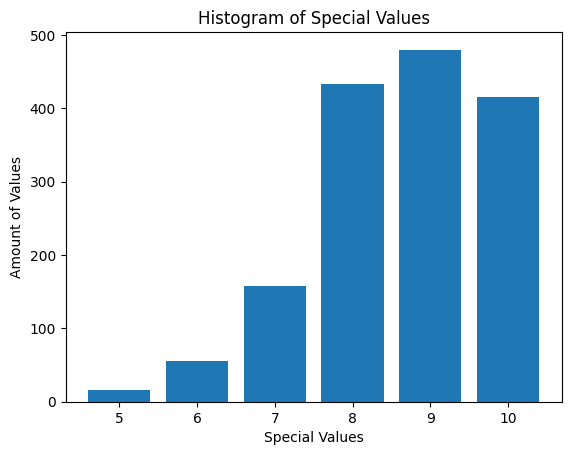

In [220]:
# Filter rows where the "wave" column values are between 6 and 9
filtered_df = df[(df['wave'] >= 6) & (df['wave'] <= 9)]

# Count occurrences of each special value in the filtered DataFrame
value_counts = filtered_df['attr4_1'].value_counts()

# Plotting the histogram
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Special Values')
plt.ylabel('Amount of Values')
plt.title('Histogram of Special Values')
plt.show()

*We see that the sample is relatively not normally distributed.*

*We will use the median to replace the missing values in the columns.*

In [221]:
# List of columns to process
columns_to_complete = ["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]

# Filter rows where 'wave' values are between 6 and 9
filtered_df = df[(df['wave'] >= 6) & (df['wave'] <= 9)]

# Calculate the median for each column in the filtered DataFrame
median_values = filtered_df[columns_to_complete].median()

# Update missing values in the original DataFrame
for column in columns_to_complete:
    missing_rows = (df['wave'].between(6, 9)) & (df[column].isnull())
    df.loc[missing_rows, column] = median_values[column]
# Now, df will have no more missing values in the specified columns and rows

In [222]:
print(median_values)

attr4_1     9.0
sinc4_1     7.0
intel4_1    7.0
fun4_1      8.0
amb4_1      7.0
shar4_1     7.0
dtype: float64


In [223]:
# We will check how many missing values there are in each column when the values in the wave column are between 6 and 9:

# Filter rows where the "wave" column values are between 6 and 9
filtered_df = df[(df['wave'] >= 6) & (df['wave'] <= 9)]

# List of columns to analyze
columns_to_analyze = ["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]

# Count missing values in the specified columns
filtered_df[columns_to_analyze].isnull().sum()

attr4_1     0
sinc4_1     0
intel4_1    0
fun4_1      0
amb4_1      0
shar4_1     0
dtype: int64

In [224]:
# Define the columns you want to fill missing values for
columns_to_fill = ["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]

# Iterate through each column and fill missing values based on 'wave' groups
for col in columns_to_fill:
    for wave_group, group_data in df.groupby(pd.cut(df['wave'], [1, 5])):
        most_frequent_value = int(100/6)
        df.loc[group_data.index, col] = group_data[col].fillna(most_frequent_value)

In [225]:
df.loc[(df['wave']>=1)&(df['wave']<=5),["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]].isnull().sum()

attr4_1     200
sinc4_1     200
intel4_1    200
fun4_1      200
amb4_1      200
shar4_1     200
dtype: int64

In [226]:
df.loc[(df['wave']>=1)&(df['wave']<=5),["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]]= df.loc[(df['wave']>=1)&(df['wave']<=5),["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]].fillna(16)

In [227]:
df.loc[(df['wave']>=1)&(df['wave']<=5),["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]].isnull().sum()

attr4_1     0
sinc4_1     0
intel4_1    0
fun4_1      0
amb4_1      0
shar4_1     0
dtype: int64

***For wave 10-21***

In [228]:
# Let's look at the values indicated in the columns, where the values of the wave column are in the range between 10 and 21.
df.loc[(df["wave"]>=10) & (df["wave"]<=21),["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]].describe()

attr4_1    sinc4_1   intel4_1     fun4_1     amb4_1    shar4_1
count     4920.0     4920.0     4920.0     4920.0     4920.0     4898.0
mean   32.020935  12.329472  14.460569  17.942276  10.827439  12.319314
std    14.766426   7.111274   6.680316   6.841356    7.62205   6.332341
min          5.0        0.0        0.0        0.0        0.0        0.0
25%         20.0       10.0       10.0       15.0        5.0       10.0
50%         30.0       10.0       15.0       20.0       10.0       10.0
75%         40.0       17.0       20.0       20.0       15.0       15.0
max         95.0       35.0       35.0       45.0       50.0       40.0

*We will note that one of the instructions we were given is that for a wave column whose values are between 10 and 21, the total score that should come out for the sum of all the values found in the columns will be 100. We will check whether all the rows we have defined really add up to 100.*

In [229]:
df_c = df.loc[(df["wave"]>=10) & (df["wave"]<=21),["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]]

In [230]:
df.loc[(df["wave"] >= 10) & (df["wave"] <= 21), ["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]].isnull().sum().sum()

250

In [231]:
# Add a new column "sum of points" with the sum of values in each row
df_c["sum of points"] = df_c.sum(axis=1)

# Count occurrences of values greater than 100, equal to 100, and less than 100
greater_than_100_count = (df_c["sum of points"] > 100).sum()
equal_to_100_count = (df_c["sum of points"] == 100).sum()
less_than_100_count = (df_c["sum of points"] < 100).sum()

# Print the counts
print("Values greater than 100:", greater_than_100_count)
print("Values equal to 100:", equal_to_100_count)
print("Values less than 100:", less_than_100_count)

Values greater than 100: 77
Values equal to 100: 4718
Values less than 100: 163


*We will notice that the sum of the columns we mentioned earlier does not add up to 100. Therefore, we will change the form of scoring - we will normalize in order to reach an equal scale in all columns.*<br/>

In [232]:
# Define the columns you want to adjust
columns_to_adjust = ["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]

# Fill missing values with the most frequent value in each column
for col in columns_to_adjust:
    most_frequent_value = df[col].mode().iloc[0]
    df[col].fillna(most_frequent_value, inplace=True)


# Filter rows where 'wave' is between 10-21
filtered_df = df[df['wave'].between(10, 21)]

# Iterate through filtered rows and adjust the values
for index, row in filtered_df.iterrows():
    row_sum = row[columns_to_adjust].sum()

    if row_sum != 100:
        # Normalize the values to make the sum 100
        normalized_values = (row[columns_to_adjust] / row_sum) * 100
        # Fill missing values with 0 before converting to int
        df.loc[index, columns_to_adjust] = normalized_values.fillna(0).astype(int)

# Count occurrences of values greater than 100, equal to 100, and less than 100
df_c = df.loc[(df["wave"] >= 10) & (df["wave"] <= 21), ["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]]
df_c["sum of points"] = df_c.sum(axis=1)

greater_than_100_count = (df_c["sum of points"] > 100).sum()
equal_to_100_count = (df_c["sum of points"] == 100).sum()
less_than_100_count = (df_c["sum of points"] < 100).sum()

# Print the counts
print("Values greater than 100:", greater_than_100_count)
print("Values equal to 100:", equal_to_100_count)
print("Values less than 100:", less_than_100_count)

Values greater than 100: 0
Values equal to 100: 4696
Values less than 100: 262


In [233]:
# Let's look at the values indicated in the columns, where the values of the wave column are in the range between 10 and 21.
df.loc[(df["wave"]>=10) & (df["wave"]<=21),["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]].describe()

attr4_1    sinc4_1   intel4_1     fun4_1     amb4_1    shar4_1
count     4958.0     4958.0     4958.0     4958.0     4958.0     4958.0
mean   31.935861  12.356394  14.456636  17.909439  10.860226  12.347923
std    14.818651   7.069003   6.589894   6.746877   7.633687   6.244608
min          5.0        0.0        0.0        0.0        0.0        0.0
25%         20.0       10.0       10.0       15.0        5.0       10.0
50%         30.0       10.0       15.0       20.0       10.0       10.0
75%         40.0       17.0       20.0       20.0       15.0       15.0
max         95.0       35.0       35.0       40.0       50.0       36.0

In [234]:
# Calculate the sum of the 6 columns for each row
sum_of_6_columns = df[["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]].sum(axis=1)

# Divide each column value by the sum of values in the 6 columns, multiply by 100, and cast to integer
columns_to_normalize = ["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]
for column in columns_to_normalize:
    df.loc[:, column] = (df[column] / sum_of_6_columns * 100).astype(int)

<ipython-input-234-fb584c11ea13>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, column] = (df[column] / sum_of_6_columns * 100).astype(int)


In [235]:
# List of columns to select
columns_to_select = ["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]

# Check if all columns exist in df
missing_columns = [col for col in columns_to_select if col not in df.columns]

if missing_columns:
    print("Error: The following columns are missing in the DataFrame:", missing_columns)
else:
    # Select the relevant columns
    df_c = df[columns_to_select]

    # Calculate the sum of points
    df_c["sum of points"] = df_c.sum(axis=1)

    # Count occurrences of values greater than 100, equal to 100, and less than 100
    greater_than_100_count = (df_c["sum of points"] > 100).sum()
    equal_to_100_count = (df_c["sum of points"] == 100).sum()
    less_than_100_count = (df_c["sum of points"] < 100).sum()

    # Print the counts
    print("Values greater than 100:", greater_than_100_count)
    print("Values equal to 100:", equal_to_100_count)
    print("Values less than 100:", less_than_100_count)

    # Print unique values above 100
    unique_values_above_100 = df_c["sum of points"][df_c["sum of points"] > 100].unique()
    print("Unique values above 100:", unique_values_above_100)

    # Print unique values below 100
    unique_values_below_100 = df_c["sum of points"][df_c["sum of points"] < 100].unique()
    print("Unique values below 100:", unique_values_below_100)

Values greater than 100: 0
Values equal to 100: 4772
Values less than 100: 3584
Unique values above 100: []
Unique values below 100: [96 98 99 97]


<ipython-input-235-656bb76c2e4a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c["sum of points"] = df_c.sum(axis=1)


###***Now we want to know what you think MOST of your fellow men/women look for in the opposite sex.*** <br/>
*  **Waves 6-9**: Please rate the importance of the following attributes on a scale of 1-10 (1=not at all important, 10=extremely important).
*  **Waves 1-5 and 10-21**: Please distribute 100 points among the following attributes -- give more points to those attributes that you think are more important to members of the opposite sex when they are deciding whether to date someone.  Total points must equal 100.

In [236]:
df.pivot_table(index='gender', values=["attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"], aggfunc='count')

amb2_1  attr2_1  fun2_1  intel2_1  shar2_1  sinc2_1
gender                                                     
0         4119     4119    4119      4119     4119     4119
1         4149     4158    4158      4158     4149     4158

In [237]:
df_copy = df.copy()
# Define the bins and labels for the wave column
wave_bins = [0, 5, 9, 21]
wave_labels = ['wave 1-5', 'wave 6-9', 'wave 10-21']

# Create a new column "wave_group" based on the bins
df_copy['wave_group'] = pd.cut(df_copy['wave'], bins=wave_bins, labels=wave_labels)

# Specify the columns for which you want to count non-null values
columns_to_count = ["attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"]

# Create the pivot table with multiple indices (gender and wave_group), count as the aggregation function, and sort_index
df_copy.pivot_table(index=['gender', 'wave_group'], values=columns_to_count, aggfunc='count').sort_index()

amb2_1  attr2_1  fun2_1  intel2_1  shar2_1  sinc2_1
gender wave_group                                                     
0      wave 1-5       882      882     882       882      882      882
       wave 6-9       776      776     776       776      776      776
       wave 10-21    2461     2461    2461      2461     2461     2461
1      wave 1-5       909      918     918       918      909      918
       wave 6-9       781      781     781       781      781      781
       wave 10-21    2459     2459    2459      2459     2459     2459

***for wave between 1 - 5***

In [238]:
df.loc[(df["wave"]>=1) & (df["wave"]<=5),["attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"]].describe()

attr2_1    sinc2_1   intel2_1     fun2_1     amb2_1   shar2_1
count     1800.0     1800.0     1800.0     1800.0     1791.0    1791.0
mean   32.627222  13.103889  14.899444  18.527778  10.089894  10.86153
std    16.506284   7.676823    6.30452   6.198881   6.389347  6.124575
min         10.0        0.0        0.0        1.0        0.0       0.0
25%         20.0       10.0       10.0       15.0        5.0       5.0
50%         30.0       15.0       15.0       20.0       10.0      10.0
75%         40.0       20.0       20.0       20.0       14.0      15.0
max         95.0       50.0       40.0       30.0       30.0      25.0

***We know that for the rows where the wave column is between 1 and 5, and between 10-21, the sum of the points given to all the columns should add up to 100 points in total. We will create another column that will check if this condition is really met - based on this we will decide how to change the face of the scoring.***

In [239]:
df_c = df.loc[(df["wave"]>=1) & (df["wave"]<=5),["attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"]]
df_c.head()

attr2_1  sinc2_1  intel2_1  fun2_1  amb2_1  shar2_1
0     35.0     20.0      15.0    20.0     5.0      5.0
1     35.0     20.0      15.0    20.0     5.0      5.0
2     35.0     20.0      15.0    20.0     5.0      5.0
3     35.0     20.0      15.0    20.0     5.0      5.0
4     35.0     20.0      15.0    20.0     5.0      5.0

In [240]:
# Add a new column "sum of points" with the sum of values in each row
df_c["sum of points"] = df_c.sum(axis=1)
df_c.head()

attr2_1  sinc2_1  intel2_1  fun2_1  amb2_1  shar2_1  sum of points
0     35.0     20.0      15.0    20.0     5.0      5.0          100.0
1     35.0     20.0      15.0    20.0     5.0      5.0          100.0
2     35.0     20.0      15.0    20.0     5.0      5.0          100.0
3     35.0     20.0      15.0    20.0     5.0      5.0          100.0
4     35.0     20.0      15.0    20.0     5.0      5.0          100.0

In [241]:
# Count occurrences of values greater than 100, equal to 100, and less than 100
greater_than_100_count = (df_c["sum of points"] > 100).sum()
equal_to_100_count = (df_c["sum of points"] == 100).sum()
less_than_100_count = (df_c["sum of points"] < 100).sum()

# Print the counts
print("Values greater than 100:", greater_than_100_count)
print("Values equal to 100:", equal_to_100_count)
print("Values less than 100:", less_than_100_count)

Values greater than 100: 19
Values equal to 100: 1771
Values less than 100: 46


*We can notice that most of the rows add up to 100 points, however there are some rows where there are more or less than the requested amount of points.*

***for wave between 10 - 21***

In [242]:
df.loc[(df["wave"]>=10) & (df["wave"]<=21),["attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"]].describe()

attr2_1    sinc2_1   intel2_1     fun2_1     amb2_1    shar2_1
count     4920.0     4920.0     4920.0     4920.0     4920.0     4920.0
mean   33.030894  12.380894  13.801829  18.303659  11.360976  11.197561
std    17.064884   7.308888   6.928552   7.484216   7.499392   6.598835
min          0.0        0.0        0.0        0.0        0.0        0.0
25%         20.0        5.0       10.0       15.0        5.0        5.0
50%         30.0       10.0       12.0       20.0       10.0       10.0
75%         40.0       20.0       20.0       20.0       15.0       15.0
max        100.0       40.0       40.0       50.0       50.0       30.0

In [243]:
df_c = df.loc[(df["wave"]>=10) & (df["wave"]<=21),["attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"]]
df_c.head()

attr2_1  sinc2_1  intel2_1  fun2_1  amb2_1  shar2_1
3408     75.0      1.0       1.0     3.0    10.0     10.0
3409     75.0      1.0       1.0     3.0    10.0     10.0
3410     75.0      1.0       1.0     3.0    10.0     10.0
3411     75.0      1.0       1.0     3.0    10.0     10.0
3412     75.0      1.0       1.0     3.0    10.0     10.0

In [244]:
# Add a new column "sum of points" with the sum of values in each row
df_c["sum of points"] = df_c.sum(axis=1)
df_c.head()

attr2_1  sinc2_1  intel2_1  fun2_1  amb2_1  shar2_1  sum of points
3408     75.0      1.0       1.0     3.0    10.0     10.0          100.0
3409     75.0      1.0       1.0     3.0    10.0     10.0          100.0
3410     75.0      1.0       1.0     3.0    10.0     10.0          100.0
3411     75.0      1.0       1.0     3.0    10.0     10.0          100.0
3412     75.0      1.0       1.0     3.0    10.0     10.0          100.0

In [245]:
# Count occurrences of values greater than 100, equal to 100, and less than 100
greater_than_100_count = (df_c["sum of points"] > 100).sum()
equal_to_100_count = (df_c["sum of points"] == 100).sum()
less_than_100_count = (df_c["sum of points"] < 100).sum()

# Print the counts
print("Values greater than 100:", greater_than_100_count)
print("Values equal to 100:", equal_to_100_count)
print("Values less than 100:", less_than_100_count)

Values greater than 100: 169
Values equal to 100: 4642
Values less than 100: 147


*Also for the rows where wave is between 10 and 21, we can see that most of the rows have the sum of their scores totaling 100. However, there are some rows in which there are above or below 100.*

In [246]:
# Define the columns you want to adjust
columns_to_adjust = ["attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"]

# Fill missing values with the most frequent value in each column
for col in columns_to_adjust:
    most_frequent_value = df[col].mode().iloc[0]
    df[col].fillna(most_frequent_value, inplace=True)

***for wave between 6 - 9***

In [247]:
df.loc[(df["wave"]>=6) & (df["wave"]<=9),["attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"]].describe()

attr2_1    sinc2_1   intel2_1     fun2_1     amb2_1    shar2_1
count     1562.0     1562.0     1562.0     1562.0     1562.0     1562.0
mean   19.318073  16.188451  15.804597  18.742202  14.841965  15.044545
std     4.456172   3.164653   2.808267   2.925211   3.788698   2.949885
min         9.09        6.9       7.14       11.9       2.78       2.63
25%        15.69      14.63      14.29      16.67      13.33      13.04
50%        18.87      16.28      15.69      18.42      15.22      15.56
75%         22.5      18.42       18.0       20.0      17.31      17.02
max        31.25      23.26      21.05      31.25      24.14      22.22

In [248]:
# Calculate the sum of the 6 columns for each row
sum_of_6_columns = df[["attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"]].sum(axis=1)

# Divide each column value by the sum of values in the 6 columns, multiply by 100, and cast to integer
columns_to_normalize = ["attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"]
for column in columns_to_normalize:
    df.loc[:, column] = (df[column] / sum_of_6_columns * 100).astype(int)

<ipython-input-248-ed8fd9a0c71b>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, column] = (df[column] / sum_of_6_columns * 100).astype(int)


In [249]:
# List of columns to select
columns_to_select = ["attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"]

# Check if all columns exist in df
missing_columns = [col for col in columns_to_select if col not in df.columns]

if missing_columns:
    print("Error: The following columns are missing in the DataFrame:", missing_columns)
else:
    # Select the relevant columns
    df_c = df[columns_to_select]

    # Calculate the sum of points
    df_c["sum of points"] = df_c.sum(axis=1)

    # Count occurrences of values greater than 100, equal to 100, and less than 100
    greater_than_100_count = (df_c["sum of points"] > 100).sum()
    equal_to_100_count = (df_c["sum of points"] == 100).sum()
    less_than_100_count = (df_c["sum of points"] < 100).sum()

    # Print the counts
    print("Values greater than 100:", greater_than_100_count)
    print("Values equal to 100:", equal_to_100_count)
    print("Values less than 100:", less_than_100_count)

    # Print unique values above 100
    unique_values_above_100 = df_c["sum of points"][df_c["sum of points"] > 100].unique()
    print("Unique values above 100:", unique_values_above_100)

    # Print unique values below 100
    unique_values_below_100 = df_c["sum of points"][df_c["sum of points"] < 100].unique()
    print("Unique values below 100:", unique_values_below_100)


Values greater than 100: 0
Values equal to 100: 6510
Values less than 100: 1846
Unique values above 100: []
Unique values below 100: [98 97 95 96 99]


<ipython-input-249-3931c419688f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c["sum of points"] = df_c.sum(axis=1)


###***How do you think you measure up?***<br/>
Please rate your opinion of your own attributes, on a scale of 1-10


In [250]:
# Let's look at the description of the numerical scale.
df.loc[:,["attr3_1" , "sinc3_1", 'intel3_1',"fun3_1", "amb3_1"]].describe()

attr3_1   sinc3_1  intel3_1    fun3_1    amb3_1
count    8251.0    8251.0    8251.0    8251.0    8251.0
mean   7.085202  8.297418  8.404921  7.705005  7.582111
std    1.395799  1.406657  1.076817   1.56484  1.774196
min         2.0       2.0       3.0       2.0       2.0
25%         6.0       8.0       8.0       7.0       7.0
50%         7.0       8.0       8.0       8.0       8.0
75%         8.0       9.0       9.0       9.0       9.0
max        10.0      10.0      10.0      10.0      10.0

*By using the describe() method it can be seen that most of the columns are normally distributed (the median and the mean are quite close, the maximum and the minimum are at equal distances and the standard deviation is less than 2).*

*We know that we have a total of 8366 samples in this experiment, according to the detail written above we can see that there are missing values in each of the columns.*

In [251]:
# We can fill in the missing values using the average.

columns_to_check = ["attr3_1", "sinc3_1", 'intel3_1', "fun3_1", "amb3_1"]

# Loop through the columns
for column in columns_to_check:
    # Calculate the average of the column excluding missing values
    column_average = df[column][df[column].notnull()].mean()

    # Round the average to one digit after the decimal point and convert to int
    rounded_average = int(round(column_average, 1))

    # Fill missing values with the rounded average
    df[column].fillna(rounded_average, inplace=True)

In [252]:
df_copy = df.copy()
# Checking whether there are any missing values
columns_to_analyze = ["attr3_1", "sinc3_1", 'intel3_1', "fun3_1", "amb3_1"]

# Count missing values in the specified columns
df_copy[columns_to_analyze].isnull().sum()

attr3_1     0
sinc3_1     0
intel3_1    0
fun3_1      0
amb3_1      0
dtype: int64

**How do you think others perceive you?**<br/>
Please rate yourself how you think others would rate you on each of the following attributes, on a scale of 1-10 (1=awful, 10=great).

In [253]:
df.loc[:,["attr5_1" , "sinc5_1", 'intel5_1',"fun5_1", "amb5_1"]].describe()

attr5_1   sinc5_1  intel5_1    fun5_1    amb5_1
count    4894.0    4894.0    4894.0    4894.0    4894.0
mean     6.9434  7.926645   8.28586  7.426645  7.621373
std    1.499051  1.627393  1.283539   1.78047  1.770354
min         2.0       1.0       3.0       2.0       1.0
25%         6.0       7.0       8.0       6.0       7.0
50%         7.0       8.0       8.0       8.0       8.0
75%         8.0       9.0       9.0       9.0       9.0
max        10.0      10.0      10.0      10.0      10.0

***Using the describe() method, we can learn a few things:***<br/>
* The values are indeed found between 1 and 10. Apparently most of the columns are normally distributed (filling in missing values will be done according to the average for the respective waves).
* Division between women and men groups in this case of the questionnaire was made approximately equal.
* Only participants from wave 10 to 21 rated at this stage of the experiment.

In [254]:
# Division according to groups defined in wave:
df_copy = df.copy()
# Define the bins and labels for the wave column
wave_bins = [0, 5, 9, 21]
wave_labels = ['wave 1-5', 'wave 6-9', 'wave 10-21']

# Create a new column "wave_group" based on the bins
df_copy['wave_group'] = pd.cut(df_copy['wave'], bins=wave_bins, labels=wave_labels)

# Specify the columns for which you want to count non-null values
columns_to_count = ["attr5_1" , "sinc5_1", 'intel5_1',"fun5_1", "amb5_1"]

# Create the pivot table with multiple indices (gender and wave_group), count as the aggregation function, and sort_index
df_copy.pivot_table(index=['gender', 'wave_group'], values=columns_to_count, aggfunc='count').sort_index()

amb5_1  attr5_1  fun5_1  intel5_1  sinc5_1
gender wave_group                                            
0      wave 1-5         0        0       0         0        0
       wave 6-9         0        0       0         0        0
       wave 10-21    2453     2453    2453      2453     2453
1      wave 1-5         0        0       0         0        0
       wave 6-9         0        0       0         0        0
       wave 10-21    2441     2441    2441      2441     2441

In [255]:
# Filter rows where wave is in the specified range
filtered_df = df[(df['wave'] >= 10) & (df['wave'] <= 21)]

# List of columns to consider
columns_to_fill = ["attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1"]

missing_values = []

# Iterate through each column and calculate missing values
for column in columns_to_fill:
    missing_count = filtered_df[column].isnull().sum()
    missing_values.append((column, missing_count))

print(missing_values)

[('attr5_1', 64), ('sinc5_1', 64), ('intel5_1', 64), ('fun5_1', 64), ('amb5_1', 64)]


In [256]:
# Calculate the average values for the columns
average_values = df[(df['wave'] >= 10) & (df['wave'] <= 21)][["attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1"]].mean().astype(int)

# Filter rows where wave is in the specified range and missing values in the specified columns
rows_to_fill = df[(df['wave'] >= 10) & (df['wave'] <= 21)][["attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1"]].isnull()

# Fill missing values with respective average values
df.loc[rows_to_fill.index, ["attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1"]] = df.loc[rows_to_fill.index, ["attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1"]].fillna(average_values)

In [257]:
# Let's look now at the amount of missing values in each column when the values in the wave column are between 10 and 21:

# Filter rows where the "wave" column values are between 6 and 9
filtered_df = df[(df['wave'] >= 10) & (df['wave'] <= 21)]

# List of columns to analyze
columns_to_analyze = ["attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1"]

# Count missing values in the specified columns
filtered_df[columns_to_analyze].isnull().sum()

attr5_1     0
sinc5_1     0
intel5_1    0
fun5_1      0
amb5_1      0
dtype: int64

In [258]:
df.loc[:,["attr5_1" , "sinc5_1", 'intel5_1',"fun5_1", "amb5_1"]].describe()

attr5_1   sinc5_1  intel5_1    fun5_1    amb5_1
count    4958.0    4958.0    4958.0    4958.0    4958.0
mean   6.931222  7.914683   8.28217  7.421138  7.613352
std    1.493145  1.620234  1.275634  1.769594  1.760286
min         2.0       1.0       3.0       2.0       1.0
25%         6.0       7.0       8.0       7.0       7.0
50%         7.0       8.0       8.0       8.0       8.0
75%         8.0       9.0       9.0       9.0       9.0
max        10.0      10.0      10.0      10.0      10.0

In [259]:
df[["attr5_1" , "sinc5_1", 'intel5_1',"fun5_1", "amb5_1"]].isnull().sum()

attr5_1     3398
sinc5_1     3398
intel5_1    3398
fun5_1      3398
amb5_1      3398
dtype: int64

In [260]:
df[["attr5_1" , "sinc5_1", 'intel5_1',"fun5_1", "amb5_1"]] = df[["attr5_1" , "sinc5_1", 'intel5_1',"fun5_1", "amb5_1"]].fillna(0)

In [261]:
df[["attr5_1" , "sinc5_1", 'intel5_1',"fun5_1", "amb5_1"]].isnull().sum()

attr5_1     0
sinc5_1     0
intel5_1    0
fun5_1      0
amb5_1      0
dtype: int64

#**2.3.0 Scorecard:** <br/>
*Filled out by subjects after each "date" during the event.*


## **Half way through meeting all potential dates during the night of the event on their scorecard:**<br/>
*Hold up!  Now that you are half way through your Speed Dates…*

**We want to know what you look for in the opposite sex.**
*Please rate the importance of the following attributes in a potential date on a scale of 1-10: (1=not at all important, 10=extremely important).*

In [262]:
df.pivot_table(index='gender', values=["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"], aggfunc='count')

amb1_s  attr1_s  fun1_s  intel1_s  shar1_s  sinc1_s
gender                                                     
0         2030     2030    2030      2030     2030     2030
1         2055     2055    2055      2055     2055     2055

*It can be noticed that both female participants and male participants have almost the same sample size in relation to the columns we are currently examining.*

In [263]:
# Define the bins and labels for the wave column
wave_bins = [0, 5, 9, 21]
wave_labels = ['wave 1-5', 'wave 6-9', 'wave 10-21']

# Create a new column "wave_group" based on the bins
df_copy['wave_group'] = pd.cut(df_copy['wave'], bins=wave_bins, labels=wave_labels)

# Specify the columns for which you want to count non-null values
columns_to_count = ["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"]

# Create the pivot table with multiple indices (gender and wave_group), count as the aggregation function, and sort_index
df_copy.pivot_table(index=['gender', 'wave_group'], values=columns_to_count, aggfunc='count').sort_index()

amb1_s  attr1_s  fun1_s  intel1_s  shar1_s  sinc1_s
gender wave_group                                                     
0      wave 1-5         0        0       0         0        0        0
       wave 6-9       717      717     717       717      717      717
       wave 10-21    1313     1313    1313      1313     1313     1313
1      wave 1-5         0        0       0         0        0        0
       wave 6-9       729      729     729       729      729      729
       wave 10-21    1326     1326    1326      1326     1326     1326

*It can be noticed that for the first group of waves (1-5) there is no rating at all from the participants of the experiment.*

In [264]:
df[["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"]].describe()

attr1_s    sinc1_s   intel1_s     fun1_s     amb1_s    shar1_s
count     4085.0     4085.0     4085.0     4085.0     4085.0     4085.0
mean   20.827048  15.466024  17.270069  15.281645  11.161655  12.469195
std    12.967889   6.894085   6.585181   5.348744   5.511037   5.924648
min          3.0        0.0        0.0        1.0        0.0        0.0
25%        14.89       10.0       12.0       10.0        7.0        9.0
50%        17.65      15.79      18.52       16.0       10.0       12.5
75%         25.0       20.0       20.0       20.0       15.0      16.28
max         95.0       50.0       40.0       40.0      23.81       30.0

In [265]:
columns_to_replace = ["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"]

# Replace 0 with np.nan in the specified columns
for column in columns_to_replace:
    df[column] = df[column].replace(0, np.nan)

In [266]:
# Define the columns you want to adjust
columns_to_adjust = ["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"]

# Fill missing values with the most frequent value in each column
for col in columns_to_adjust:
    most_frequent_value = df[col].mode().iloc[0]
    df[col].fillna(most_frequent_value, inplace=True)

In [267]:
columns_to_process = ["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"]

for column in columns_to_process:
    df[column] = df[column].apply(lambda x: round(x) if x <= 10 else x)

In [268]:
columns_to_process = ["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"]

for column in columns_to_process:
    df[column] = df[column].apply(lambda x: round(x * 0.1) if x > 10 else round(x))

In [269]:
df[["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"]].describe()

attr1_s      sinc1_s     intel1_s       fun1_s       amb1_s  \
count  8356.000000  8356.000000  8356.000000  8356.000000  8356.000000   
mean      2.714457     7.066419     2.797630     2.987075     7.392891   
std       1.930656     3.745912     2.181276     2.525622     3.620262   
min       1.000000     1.000000     1.000000     1.000000     0.000000   
25%       2.000000     2.000000     2.000000     2.000000     2.000000   
50%       2.000000    10.000000     2.000000     2.000000    10.000000   
75%       2.000000    10.000000     2.000000     2.000000    10.000000   
max      10.000000    10.000000    10.000000    10.000000    10.000000   

           shar1_s  
count  8356.000000  
mean      7.244136  
std       3.703460  
min       1.000000  
25%       2.000000  
50%      10.000000  
75%      10.000000  
max      10.000000

**We want to know what you look for in the opposite sex.**<br/>
*Please rate your opinion of your own attributes, on a scale of 1-10 (1=awful, 10=great).*

In [270]:
# Define the bins and labels for the wave column
wave_bins = [0, 5, 9, 21]
wave_labels = ['wave 1-5', 'wave 6-9', 'wave 10-21']

# Create a new column "wave_group" based on the bins
df_copy['wave_group'] = pd.cut(df_copy['wave'], bins=wave_bins, labels=wave_labels)

# Specify the columns for which you want to count non-null values
columns_to_count = ["attr3_s", "sinc3_s", "intel3_s", "fun3_s", "amb3_s"]

# Create the pivot table with multiple indices (gender and wave_group), count as the aggregation function, and sort_index
df_copy.pivot_table(index=['gender', 'wave_group'], values=columns_to_count, aggfunc='count').sort_index()

amb3_s  attr3_s  fun3_s  intel3_s  sinc3_s
gender wave_group                                            
0      wave 1-5         0        0       0         0        0
       wave 6-9       657      657     657       657      657
       wave 10-21    1277     1277    1277      1277     1277
1      wave 1-5         0        0       0         0        0
       wave 6-9       729      729     729       729      729
       wave 10-21    1326     1326    1326      1326     1326

In [271]:
df[["attr3_s", "sinc3_s", "intel3_s", "fun3_s", "amb3_s"]].describe()

attr3_s   sinc3_s  intel3_s    fun3_s    amb3_s
count    3989.0    3989.0    3989.0    3989.0    3989.0
mean   7.209326  8.087491  8.259087  7.693407  7.597142
std     1.41472  1.451313   1.17985  1.627869  1.785768
min         3.0       1.0       4.0       3.0       2.0
25%         7.0       7.0       8.0       7.0       7.0
50%         7.0       8.0       8.0       8.0       8.0
75%         8.0       9.0       9.0       9.0       9.0
max        10.0      10.0      10.0      10.0      10.0

In [272]:
# Define the columns you want to adjust
columns_to_adjust = ["attr3_s", "sinc3_s", "intel3_s", "fun3_s", "amb3_s"]

# Fill missing values with the most frequent value in each column
for col in columns_to_adjust:
    most_frequent_value = df[col].mode().iloc[0]
    df[col].fillna(most_frequent_value, inplace=True)

#**2.3.0 followup/Time2:** <br/>
*Survey is filled out the day after participating in the event.  Subjects must have submitted this in order to be sent their matches.*

### **2.3.1 satis_2 column:**<br/>
*Overall, how satisfied were you with the people you met? (1=not at all satisfied, 10=extremely satisfied)*

In [273]:
df['satis_2'].unique()

<IntegerArray>
[6, 5, <NA>, 4, 7, 3, 2, 10, 8, 1, 9]
Length: 11, dtype: Int64

In [274]:
df['satis_2'].describe()

count      7444.0
mean     5.713998
std       1.82162
min           1.0
25%           5.0
50%           6.0
75%           7.0
max          10.0
Name: satis_2, dtype: Float64

In [275]:
most_frequent_value = df['satis_2'].mode()[0]  # Calculate the most frequent value

# Replace missing values with the most frequent value
df['satis_2'].fillna(most_frequent_value, inplace=True)

In [276]:
df['satis_2'].isnull().sum()

0

### **2.3.2 length column:**<br/>
*Four minutes is:*<br/>
* Too little = 1
* Too much = 2
* Just Right = 3

In [277]:
df['length'].unique()

<IntegerArray>
[2, <NA>, 3, 1]
Length: 4, dtype: Int64

In [278]:
df['length'].fillna(-1, inplace=True)

In [279]:
df['length'].replace({1: 0, 2: 1, 3: 2}, inplace=True)

In [280]:
df['length'].unique()

<IntegerArray>
[1, -1, 2, 0]
Length: 4, dtype: Int64

### **2.3.3 numdat_2:**<br/>
**The number of Speed "Dates" you had was:**
*	Too few = 1
*	Too many = 2
*	Just right = 3

In [281]:
df['numdat_2'].unique()

<IntegerArray>
[1, <NA>, 2, 3]
Length: 4, dtype: Int64

In [282]:
df['numdat_2'].replace({1: 0, 2: 1, 3: 2}, inplace=True)

In [283]:
df['numdat_2'].fillna(-1, inplace=True)

In [284]:
df['numdat_2'].unique()

<IntegerArray>
[0, -1, 1, 2]
Length: 4, dtype: Int64

In [285]:
suffixes = ['7_2', '1_2', '4_2', '2_2', '7_3', '1_3']

# Create a dictionary to store results
results = {}

# Iterate through each suffix and calculate the sums
for suffix in suffixes:
    # Get columns with the current suffix
    columns = [col for col in df_copy.columns if col.endswith(suffix)]

    # Calculate the sum for each row in this group of columns
    row_sums = df_copy[columns].sum(axis=1)

    # Count the number of times the sum is equal to 100, exceeds 100, is less than 100, or is zero
    count_equal_100 = (row_sums == 100).sum()
    count_exceeds_100 = (row_sums > 100).sum()
    count_less_than_100 = ((row_sums < 100).sum() & (row_sums > 0)).sum()
    count_zero = (row_sums == 0).sum()

    # Create a summary string
    summary = f"{suffix} set has {count_equal_100} rows that sum to 100, {count_exceeds_100} rows that sum to over 100, {count_less_than_100} rows that sum to less than 100, and {count_zero} rows that sum to 0"

    # Store the summary in the results dictionary
    results[suffix] = summary

# Print the results
for suffix, summary in results.items():
    print(summary)


7_2 set has 1870 rows that sum to 100, 19 rows that sum to over 100, 1974 rows that sum to less than 100, and 6382 rows that sum to 0
1_2 set has 6048 rows that sum to 100, 828 rows that sum to over 100, 0 rows that sum to less than 100, and 912 rows that sum to 0
4_2 set has 4113 rows that sum to 100, 133 rows that sum to over 100, 0 rows that sum to less than 100, and 2591 rows that sum to 0
2_2 set has 4596 rows that sum to 100, 604 rows that sum to over 100, 0 rows that sum to less than 100, and 2591 rows that sum to 0
7_3 set has 1861 rows that sum to 100, 67 rows that sum to over 100, 0 rows that sum to less than 100, and 6342 rows that sum to 0
1_3 set has 3263 rows that sum to 100, 463 rows that sum to over 100, 0 rows that sum to less than 100, and 4389 rows that sum to 0


### **2.3.4 ["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"]**

In [286]:
# Checking whether there are any missing values
df[["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"]].isnull().sum()

attr1_3     4389
sinc1_3     4389
intel1_3    4389
fun1_3      4389
amb1_3      4389
shar1_3     4389
dtype: int64

In [287]:
# Sum the specified columns for each row and exclude rows with all zeros
row_sums = df[["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"]].sum(axis=1)
valid_sums = row_sums[row_sums != 0]

# Get unique sums and their counts
unique_sums, counts = valid_sums.value_counts().index, valid_sums.value_counts().values

# Print unique sums and their counts
print("Unique Sums and Their Counts:")
for unique_sum, count in zip(unique_sums, counts):
    print(f"Sum: {unique_sum}, Count: {count}")

Unique Sums and Their Counts:
Sum: 100.0, Count: 3263
Sum: 100.02000000000001, Count: 174
Sum: 99.99000000000001, Count: 104
Sum: 100.01, Count: 94
Sum: 100.02, Count: 66
Sum: 90.0, Count: 47
Sum: 130.0, Count: 39
Sum: 100.00999999999999, Count: 35
Sum: 99.99, Count: 30
Sum: 99.99999999999999, Count: 30
Sum: 100.01999999999998, Count: 20
Sum: 100.00000000000001, Count: 20
Sum: 110.0, Count: 15
Sum: 99.99000000000002, Count: 10
Sum: 99.98999999999998, Count: 10
Sum: 99.98, Count: 10


In [288]:
# Function to normalize values to sum to 100
def normalize_to_100(row):
    # Sum of the specified columns
    sum_of_columns = row[["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"]].sum()

    # Check if the sum is not zero and not null
    if sum_of_columns != 0:
        # Normalize the values to sum to 100
        return row[["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"]] * (100 / sum_of_columns)
    else:
        # Return the original values if the sum is zero or null
        return row[["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"]]

# Apply the normalization function to rows where all six columns are not empty (or 0)
df[["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"]] = df.apply(lambda row: normalize_to_100(row) if not row[["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"]].eq(0).all() else row, axis=1)

In [289]:
# Sum the specified columns for each row and exclude rows with all zeros
row_sums = df[["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"]].sum(axis=1)
valid_sums = row_sums[row_sums != 0]

# Get unique sums and their counts
unique_sums, counts = valid_sums.value_counts().index, valid_sums.value_counts().values

# Print unique sums and their counts
print("Unique Sums and Their Counts:")
for unique_sum, count in zip(unique_sums, counts):
    print(f"Sum: {unique_sum}, Count: {count}")

Unique Sums and Their Counts:
Sum: 100.0, Count: 3636
Sum: 99.99999999999999, Count: 160
Sum: 100.00000000000001, Count: 151
Sum: 100.00000000000003, Count: 10
Sum: 99.99999999999997, Count: 10


In [290]:
# Checking whether there are any missing values
df[["attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"]].isnull().sum()

attr7_3     6342
sinc7_3     6342
intel7_3    6342
fun7_3      6342
amb7_3      6342
shar7_3     6342
dtype: int64

In [291]:
# Sum the specified columns for each row and exclude rows with all zeros
row_sums = df[["attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"]].sum(axis=1)
valid_sums = row_sums[row_sums != 0]

# Get unique sums and their counts
unique_sums, counts = valid_sums.value_counts().index, valid_sums.value_counts().values

# Print unique sums and their counts
print("Unique Sums and Their Counts:")
for unique_sum, count in zip(unique_sums, counts):
    print(f"Sum: {unique_sum}, Count: {count}")

Unique Sums and Their Counts:
Sum: 100.0, Count: 1861
Sum: 90.0, Count: 86
Sum: 110.0, Count: 46
Sum: 130.0, Count: 21


In [292]:
# Function to normalize values to sum to 100
def normalize_to_100(row):
    # Sum of the specified columns
    sum_of_columns = row[["attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"]].sum()

    # Check if the sum is not zero and not null
    if sum_of_columns != 0:
        # Normalize the values to sum to 100
        return row[["attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"]] * (100 / sum_of_columns)
    else:
        # Return the original values if the sum is zero or null
        return row[["attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"]]

# Apply the normalization function to rows where all six columns are not empty (or 0)
df[["attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"]] = df.apply(
    lambda row: normalize_to_100(row) if not row[["attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"]].eq(0).all() else row, axis=1)

In [293]:
# Sum the specified columns for each row and exclude rows with all zeros
row_sums = df[["attr7_3", "sinc7_3", "intel7_3", "fun7_3", "amb7_3", "shar7_3"]].sum(axis=1)
valid_sums = row_sums[row_sums != 0]

# Get unique sums and their counts
unique_sums, counts = valid_sums.value_counts().index, valid_sums.value_counts().values

# Print unique sums and their counts
print("Unique Sums and Their Counts:")
for unique_sum, count in zip(unique_sums, counts):
    print(f"Sum: {unique_sum}, Count: {count}")

Unique Sums and Their Counts:
Sum: 100.0, Count: 1977
Sum: 100.00000000000001, Count: 30
Sum: 99.99999999999999, Count: 7


In [294]:
# Checking whether there are any missing values
df[["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"]].isnull().sum()

attr4_3     5399
sinc4_3     5399
intel4_3    5399
fun4_3      5399
amb4_3      5399
shar4_3     5399
dtype: int64

In [295]:
unique_values = {}
columns_to_check = ["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"]

for column in columns_to_check:
    unique_values[column] = df[column].value_counts().sort_index()

for column, values in unique_values.items():
    print(f"Unique values in column '{column}' in ascending order with counts:")
    for value, count in values.items():
        print(f"{value}: {count}")
    print()

Unique values in column 'attr4_3' in ascending order with counts:
0: 9
6: 50
7: 180
8: 193
9: 261
10: 259
15: 122
17: 21
18: 39
19: 21
20: 374
22: 14
25: 278
30: 371
35: 18
37: 21
40: 281
45: 31
50: 182
60: 139
70: 28
75: 21
80: 44

Unique values in column 'sinc4_3' in ascending order with counts:
0: 138
3: 40
4: 20
5: 260
6: 128
7: 354
8: 147
9: 143
10: 795
15: 448
16: 35
18: 21
20: 383
22: 18
30: 18
40: 9

Unique values in column 'intel4_3' in ascending order with counts:
0: 93
3: 20
4: 16
5: 274
6: 193
7: 351
8: 161
9: 61
10: 659
11: 21
15: 432
16: 21
17: 42
20: 532
25: 60
30: 21

Unique values in column 'fun4_3' in ascending order with counts:
0: 68
3: 10
5: 43
6: 106
7: 115
8: 379
9: 192
10: 559
12: 18
15: 275
17: 21
18: 42
20: 821
25: 187
30: 121

Unique values in column 'amb4_3' in ascending order with counts:
0: 290
1: 20
2: 20
3: 56
4: 20
5: 446
6: 161
7: 216
8: 201
9: 144
10: 772
13: 21
15: 271
16: 21
17: 21
18: 18
20: 164
25: 19
30: 57
40: 19

Unique values in column 'shar4_

In [296]:
 df[["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"]].describe()

attr4_3    sinc4_3   intel4_3     fun4_3    amb4_3    shar4_3
count     2957.0     2957.0     2957.0     2957.0    2957.0     2957.0
mean   25.612445  10.745012  11.520798  14.276294  9.205276  11.252959
std    17.482737   5.737248   6.003888   6.930187  6.387106   6.517977
min          0.0        0.0        0.0        0.0       0.0        0.0
25%         10.0        7.0        7.0        9.0       5.0        7.0
50%         20.0       10.0       10.0       12.0       9.0       10.0
75%         37.0       15.0       15.0       20.0      10.0       15.0
max         80.0       40.0       30.0       30.0      40.0       45.0

In [297]:
# Function to distribute values to the range 1-10 while keeping their ratio
def distribute_to_range(row):
    # Check if all 6 columns are null or 0 or all values are not above 10
    if row[["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"]].isnull().all() or (row[["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"]] == 0).all() or (row[["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"]] <= 10).all():
        return row  # Ignore rows where all columns are null, 0, or not above 10

    # Get the values of the 6 columns
    values = row[["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"]]

    # Calculate the total sum of non-null values
    total = values.sum()

    # Handle NaN and None values
    if pd.notna(total):
        # Distribute values to the range 1-10 while keeping the ratio intact
        ratio = values / total
        # Scale the ratio to a range from 1 to 10
        scaled_values = ratio * 9 + 1
        # Round the values, handling NaN or None with 0
        scaled_values = scaled_values.apply(lambda x: round(x) if (pd.notna(x) and x != 0) else 0)
    else:
        # Handle the case where total is NaN (avoid division by NaN)
        scaled_values = pd.Series([0, 0, 0, 0, 0, 0], index=["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"])

    # Update the row with scaled and rounded values
    row[["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"]] = scaled_values

    return row

# Apply the distribution function to rows where all 6 columns are not null, 0, or above 10
df = df.apply(
    lambda row: distribute_to_range(row) if not row[["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"]].isnull().all() and not (row[["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"]] == 0).all() and not (row[["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"]] <= 10).all() else row, axis=1)


In [298]:
df[["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"]].describe()

attr4_3  sinc4_3  intel4_3  fun4_3  amb4_3  shar4_3
count      2957     2957      2957    2957    2957     2957
unique       10       10        10       9      10       10
top           3        2         2       3       2        2
freq        750     1233      1131    1072    1040     1134

In [299]:
unique_values = {}
columns_to_check = ["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"]

for column in columns_to_check:
    unique_values[column] = df[column].value_counts().sort_index()

for column, values in unique_values.items():
    print(f"Unique values in column '{column}' in ascending order with counts:")
    for value, count in values.items():
        print(f"{value}: {count}")
    print()

Unique values in column 'attr4_3' in ascending order with counts:
1: 9
2: 122
3: 750
4: 422
5: 297
6: 371
7: 208
8: 258
9: 261
10: 259

Unique values in column 'sinc4_3' in ascending order with counts:
1: 353
2: 1233
3: 441
4: 38
5: 35
6: 128
7: 354
8: 147
9: 143
10: 85

Unique values in column 'intel4_3' in ascending order with counts:
1: 271
2: 1131
3: 611
4: 37
5: 96
6: 193
7: 351
8: 161
9: 61
10: 45

Unique values in column 'fun4_3' in ascending order with counts:
1: 121
2: 722
3: 1072
4: 99
6: 106
7: 115
8: 379
9: 192
10: 151

Unique values in column 'amb4_3' in ascending order with counts:
1: 716
2: 1040
3: 268
4: 77
5: 69
6: 161
7: 216
8: 201
9: 144
10: 65

Unique values in column 'shar4_3' in ascending order with counts:
1: 370
2: 1134
3: 492
4: 24
5: 90
6: 243
7: 191
8: 255
9: 118
10: 40



In [300]:
unique_values = {}
columns_to_check = ["attr2_3", "sinc2_3", "intel2_3", "fun2_3", "amb2_3", "shar2_3"]

for column in columns_to_check:
    unique_values[column] = df[column].value_counts().sort_index()

for column, values in unique_values.items():
    print(f"Unique values in column '{column}' in ascending order with counts:")
    for value, count in values.items():
        print(f"{value}: {count}")
    print()

Unique values in column 'attr2_3' in ascending order with counts:
5: 26
6: 66
7: 112
8: 208
9: 314
10: 226
13: 9
15: 165
17: 21
18: 21
19: 21
20: 393
22: 14
25: 300
30: 319
35: 68
40: 241
45: 16
50: 215
60: 120
65: 14
70: 22
80: 46

Unique values in column 'sinc2_3' in ascending order with counts:
0: 196
3: 20
5: 261
6: 148
7: 279
8: 253
9: 138
10: 667
15: 406
16: 35
20: 516
25: 29
50: 9

Unique values in column 'intel2_3' in ascending order with counts:
0: 132
4: 45
5: 172
6: 131
7: 321
8: 266
9: 92
10: 625
15: 511
16: 21
17: 21
20: 484
22: 9
23: 21
25: 60
30: 31
60: 15

Unique values in column 'fun2_3' in ascending order with counts:
0: 82
3: 10
4: 20
5: 52
6: 36
7: 178
8: 302
9: 226
10: 509
15: 254
18: 21
19: 21
20: 880
25: 215
30: 74
40: 77

Unique values in column 'amb2_3' in ascending order with counts:
0: 296
2: 20
3: 10
4: 59
5: 275
6: 136
7: 251
8: 214
9: 190
10: 877
12: 14
14: 21
15: 313
20: 208
25: 42
30: 10
50: 21

Unique values in column 'shar2_3' in ascending order with c

In [301]:
# Function to distribute values to the range 1-10 while keeping their ratio
def distribute_to_range(row):
    # Check if all 6 columns are null or 0 or all values are not above 10
    if row[["attr2_3", "sinc2_3", "intel2_3", "fun2_3", "amb2_3", "shar2_3"]].isnull().all() or (row[["attr2_3", "sinc2_3", "intel2_3", "fun2_3", "amb2_3", "shar2_3"]] == 0).all() or (row[["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"]] <= 10).all():
        return row  # Ignore rows where all columns are null, 0, or not above 10

    # Get the values of the 6 columns
    values = row[["attr2_3", "sinc2_3", "intel2_3", "fun2_3", "amb2_3", "shar2_3"]]

    # Calculate the total sum of non-null values
    total = values.sum()

    # Handle NaN and None values
    if pd.notna(total):
        # Distribute values to the range 1-10 while keeping the ratio intact
        ratio = values / total
        # Scale the ratio to a range from 1 to 10
        scaled_values = ratio * 9 + 1
        # Round the values, handling NaN or None with 0
        scaled_values = scaled_values.apply(lambda x: round(x) if (pd.notna(x) and x != 0) else 0)
    else:
        # Handle the case where total is NaN (avoid division by NaN)
        scaled_values = pd.Series([0, 0, 0, 0, 0, 0], index=["attr2_3", "sinc2_3", "intel2_3", "fun2_3", "amb2_3", "shar2_3"])

    # Update the row with scaled and rounded values
    row[["attr2_3", "sinc2_3", "intel2_3", "fun2_3", "amb2_3", "shar2_3"]] = scaled_values

    return row

# Apply the distribution function to rows where all 6 columns are not null, 0, or above 10
df  = df.apply(
    lambda row: distribute_to_range(row) if not row[["attr2_3", "sinc2_3", "intel2_3", "fun2_3", "amb2_3", "shar2_3"]].isnull().all() and not (row[["attr2_3", "sinc2_3", "intel2_3", "fun2_3", "amb2_3", "shar2_3"]] == 0).all() and not (row[["attr4_3", "sinc4_3", "intel4_3", "fun4_3", "amb4_3", "shar4_3"]] <= 10).all() else row,
    axis=1)

In [302]:
unique_values = {}
columns_to_check = ["attr2_3", "sinc2_3", "intel2_3", "fun2_3", "amb2_3", "shar2_3"]

for column in columns_to_check:
    unique_values[column] = df_copy[column].value_counts().sort_index()

for column, values in unique_values.items():
    print(f"Unique values in column '{column}' in ascending order with counts:")
    for value, count in values.items():
        print(f"{value}: {count}")
    print()

Unique values in column 'attr2_3' in ascending order with counts:
5: 26
6: 66
7: 112
8: 208
9: 314
10: 226
13: 9
15: 165
17: 21
18: 21
19: 21
20: 393
22: 14
25: 300
30: 319
35: 68
40: 241
45: 16
50: 215
60: 120
65: 14
70: 22
80: 46

Unique values in column 'sinc2_3' in ascending order with counts:
0: 196
3: 20
5: 261
6: 148
7: 279
8: 253
9: 138
10: 667
15: 406
16: 35
20: 516
25: 29
50: 9

Unique values in column 'intel2_3' in ascending order with counts:
0: 132
4: 45
5: 172
6: 131
7: 321
8: 266
9: 92
10: 625
15: 511
16: 21
17: 21
20: 484
22: 9
23: 21
25: 60
30: 31
60: 15

Unique values in column 'fun2_3' in ascending order with counts:
0: 82
3: 10
4: 20
5: 52
6: 36
7: 178
8: 302
9: 226
10: 509
15: 254
18: 21
19: 21
20: 880
25: 215
30: 74
40: 77

Unique values in column 'amb2_3' in ascending order with counts:
0: 296
2: 20
3: 10
4: 59
5: 275
6: 136
7: 251
8: 214
9: 190
10: 877
12: 14
14: 21
15: 313
20: 208
25: 42
30: 10
50: 21

Unique values in column 'shar2_3' in ascending order with c

In [303]:
unique_values = {}
columns_to_check = ["attr3_3", "sinc3_3", "intel3_3", "fun3_3", "amb3_3"]

for column in columns_to_check:
    unique_values[column] = df[column].value_counts().sort_index()

for column, values in unique_values.items():
    print(f"Unique values in column '{column}' in ascending order with counts:")
    for value, count in values.items():
        print(f"{value}: {count}")
    print()

Unique values in column 'attr3_3' in ascending order with counts:
2: 33
3: 55
4: 116
5: 201
6: 564
7: 1302
8: 1099
9: 461
10: 24
12: 112

Unique values in column 'sinc3_3' in ascending order with counts:
2: 18
3: 36
4: 30
5: 110
6: 343
7: 660
8: 1200
9: 1031
10: 366
12: 173

Unique values in column 'intel3_3' in ascending order with counts:
3: 22
4: 18
5: 105
6: 136
7: 510
8: 1336
9: 1319
10: 288
12: 233

Unique values in column 'fun3_3' in ascending order with counts:
2: 60
3: 52
4: 24
5: 193
6: 452
7: 986
8: 1061
9: 749
10: 237
12: 153

Unique values in column 'amb3_3' in ascending order with counts:
1: 9
2: 42
3: 91
4: 206
5: 299
6: 422
7: 869
8: 859
9: 838
10: 185
12: 147



In [304]:
# Function to distribute values to the range 1-10 while keeping their ratio
def distribute_to_range(row):
    # Check if all 5 columns are null or 0 or all values are not above 10
    if row[["attr3_3", "sinc3_3", "intel3_3", "fun3_3", "amb3_3"]].isnull().all() or (row[["attr3_3", "sinc3_3", "intel3_3", "fun3_3", "amb3_3"]] == 0).all() or (row[["attr3_3", "sinc3_3", "intel3_3", "fun3_3", "amb3_3"]] <= 10).all():
        return row  # Ignore rows where all columns are null, 0, or not above 10

    # Get the values of the 5 columns
    values = row[["attr3_3", "sinc3_3", "intel3_3", "fun3_3", "amb3_3"]]

    # Calculate the total sum of non-null values
    total = values.sum()

    # Handle NaN and None values
    if pd.notna(total):
        # Distribute values to the range 1-10 while keeping the ratio intact
        ratio = values / total
        # Scale the ratio to a range from 1 to 10
        scaled_values = ratio * 9 + 1
        # Round the values, handling NaN or None with 0
        scaled_values = scaled_values.apply(lambda x: round(x) if (pd.notna(x) and x != 0) else 0)
    else:
        # Handle the case where total is NaN (avoid division by NaN)
        scaled_values = pd.Series([0, 0, 0, 0, 0], index=["attr3_3", "sinc3_3", "intel3_3", "fun3_3", "amb3_3"])

    # Update the row with scaled and rounded values
    row[["attr3_3", "sinc3_3", "intel3_3", "fun3_3", "amb3_3"]] = scaled_values

    return row

# Apply the distribution function to rows where all 5 columns are not null, 0, or above 10
df = df.apply(
    lambda row: distribute_to_range(row) if not row[["attr3_3", "sinc3_3", "intel3_3", "fun3_3", "amb3_3"]].isnull().all() and not (row[["attr3_3", "sinc3_3", "intel3_3", "fun3_3", "amb3_3"]] == 0).all() and not (row[["attr3_3", "sinc3_3", "intel3_3", "fun3_3", "amb3_3"]] <= 10).all() else row,
    axis=1)

In [305]:
unique_values = {}
columns_to_check = ["attr3_3", "sinc3_3", "intel3_3", "fun3_3", "amb3_3"]

for column in columns_to_check:
    unique_values[column] = df[column].value_counts().sort_index()

for column, values in unique_values.items():
    print(f"Unique values in column '{column}' in ascending order with counts:")
    for value, count in values.items():
        print(f"{value}: {count}")
    print()

Unique values in column 'attr3_3' in ascending order with counts:
2: 100
3: 343
4: 116
5: 201
6: 548
7: 1282
8: 1003
9: 350
10: 24

Unique values in column 'sinc3_3' in ascending order with counts:
2: 98
3: 311
4: 30
5: 110
6: 343
7: 610
8: 1150
9: 949
10: 366

Unique values in column 'intel3_3' in ascending order with counts:
3: 347
4: 48
5: 105
6: 136
7: 510
8: 1286
9: 1247
10: 288

Unique values in column 'fun3_3' in ascending order with counts:
2: 110
3: 357
4: 24
5: 173
6: 442
7: 986
8: 1015
9: 623
10: 237

Unique values in column 'amb3_3' in ascending order with counts:
1: 9
2: 134
3: 354
4: 206
5: 299
6: 402
7: 853
8: 763
9: 762
10: 185



In [306]:
unique_values = {}
columns_to_check = ["attr5_3", "sinc5_3", "intel5_3", "fun5_3", "amb5_3"]

for column in columns_to_check:
    unique_values[column] = df[column].value_counts().sort_index()

for column, values in unique_values.items():
    print(f"Unique values in column '{column}' in ascending order with counts:")
    for value, count in values.items():
        print(f"{value}: {count}")
    print()

Unique values in column 'attr5_3' in ascending order with counts:
2: 46
3: 45
4: 70
5: 92
6: 413
7: 747
8: 387
9: 192
10: 22

Unique values in column 'sinc5_3' in ascending order with counts:
2: 15
3: 6
4: 43
5: 150
6: 173
7: 440
8: 560
9: 503
10: 124

Unique values in column 'intel5_3' in ascending order with counts:
4: 22
5: 41
6: 232
7: 453
8: 542
9: 456
10: 268

Unique values in column 'fun5_3' in ascending order with counts:
1: 27
2: 15
3: 15
4: 6
5: 216
6: 346
7: 543
8: 441
9: 250
10: 155

Unique values in column 'amb5_3' in ascending order with counts:
1: 18
2: 37
4: 85
5: 161
6: 327
7: 610
8: 384
9: 259
10: 133



# **2.4.0 followup2/Time3:**<br/>
*Subjects filled out 3-4 weeks after they had been sent their matches*

### **2.4.1 you_call:**<br/>
*How many have you contacted to set up a date?*

In [307]:
df['you_call'].unique()

array([1, 0, <NA>, 3, 2, 4, 8, 5, 21, 6], dtype=object)

In [308]:
df['you_call'].fillna(-1, inplace=True)

###**2.4.2 them_cal:**
*How many have contacted you?*

In [309]:
df['them_cal'].unique()

array([1, 0, <NA>, 2, 4, 3, 6, 5, 9], dtype=object)

In [310]:
df['them_cal'].fillna(-1, inplace=True)

### **2.4.3 date_3:**<br/>
*Have you been on a date with any of your matches?*<br/>
* No = 0
* Yes = 1

In [311]:
df['date_3'].unique()

array([0, <NA>, 1], dtype=object)

In [312]:
df['date_3'].fillna(-1, inplace=True)

In [313]:
df['date_3'].unique()

array([ 0, -1,  1])

### **2.4.4 numdat_3:** <br/>
*How many of your matches have you been on a date with so far?*

In [314]:
df['numdat_3'].unique()

array([<NA>, 0, 1, 2, 3, 9, 4], dtype=object)

In [315]:
df['numdat_3'].fillna(-1, inplace=True)

### **2.4.5 num_in_3**<br/>
*If yes, how many?*

In [316]:
df['num_in_3'].unique()

array([<NA>, 0, 1, 4, 2], dtype=object)

In [317]:
df['num_in_3'].fillna(-1, inplace=True)

### **2.4.6 match_es**

In [318]:
df.match_es.isnull().sum()

1173

In [319]:
df.match_es = df.match_es.fillna(-1)

#    <h1><center>*** </center></h1>

## **Deleting duplicate rows from the data frame**

In [320]:
df = df.drop_duplicates()

In [321]:
# The shape of the data frame after deleting duplicate rows
df.shape

(8356, 191)

*The number of rows according to downloading duplicate rows in the data frame was 8378 and now it is 8310 - we can see that there were duplicate rows in our data frame.*

In [322]:
df

iid  id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1       0    1       0     1     10         7        -1      4   
1       1   1       0    1       0     1     10         7        -1      3   
2       1   1       0    1       0     1     10         7        -1     10   
3       1   1       0    1       0     1     10         7        -1      5   
4       1   1       0    1       0     1     10         7        -1      7   
...   ...  ..     ...  ...     ...   ...    ...       ...       ...    ...   
8373  552  22       1   44       1    21     22        14        10      5   
8374  552  22       1   44       1    21     22        13        10      4   
8375  552  22       1   44       1    21     22        19        10     10   
8376  552  22       1   44       1    21     22         3        10     16   
8377  552  22       1   44       1    21     22         2        10     15   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0     ...        5        7         7       7       7     <NA>     <NA>   
1     ...        5        7         7       7       7     <NA>     <NA>   
2     ...        5        7         7       7       7     <NA>     <NA>   
3     ...        5        7         7       7       7     <NA>     <NA>   
4     ...        5        7         7       7       7     <NA>     <NA>   
...   ...      ...      ...       ...     ...     ...      ...      ...   
8373  ...        8        5         7       6       7        9        5   
8374  ...        8        5         7       6       7        9        5   
8375  ...        8        5         7       6       7        9        5   
8376  ...        8        5         7       6       7        9        5   
8377  ...        8        5         7       6       7        9        5   

      intel5_3  fun5_3  amb5_3  
0         <NA>    <NA>    <NA>  
1         <NA>    <NA>    <NA>  
2         <NA>    <NA>    <NA>  
3         <NA>    <NA>    <NA>  
4         <NA>    <NA>    <NA>  
...        ...     ...     ...  
8373         9       5       6  
8374         9       5       6  
8375         9       5       6  
8376         9       5       6  
8377         9       5       6  

[8356 rows x 191 columns]



---



**Creating a new folder with path:**

In [323]:
folderPath = '/content/drive/MyDrive/Machine_Learning_ML/new_CSV_file'

**Before we convert the DataFrames into files, let's make sure our folder is empty.**

In [324]:
import os
import glob

filesInFolder = '/content/drive/MyDrive/Machine_Learning_ML/new_CSV_file/*.*'
fileList = glob.glob(filesInFolder)
print("Number of files BEFORE delete: ",len(fileList))

for x in fileList:
    try:
        os.remove(x)
    except:
        print("Error while deleting file : ", x)
fileList = glob.glob(filesInFolder)
print("Number of files AFTER delete: ",len(fileList))

Number of files BEFORE delete:  1
Number of files AFTER delete:  0


In [325]:
# Check what files we have in the path of the new folder:
!ls "/content/drive/MyDrive/Machine_Learning_ML/new_CSV_file"

**Converting the DataFrames into new CSV file:**

In [326]:
# Specify the directory path
folderPath = '/content/drive/MyDrive/Machine_Learning_ML/new_CSV_file/'

timestamp = '2023-12-31'
file_name = f'df.csv'
file_path = os.path.join(folderPath, file_name)
df.to_csv(file_path, mode="a", header=True, index=False)



---



# **3. Data Visualization**

## **3.1.0 About the people: gender, age, field of study**

####**3.1.1 gender Vs age**

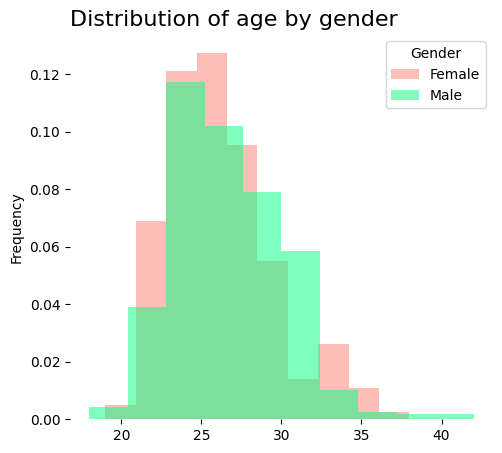

In [327]:
def histogram_plots(columns_to_plot):
    # set number of rows and number of columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize = (12, 5 * number_of_rows))


    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        df[df['gender'] == 0][column].plot(kind = 'hist', ax = ax, density = True, alpha = 0.5, color = 'salmon', label = 'Female')
        df[df['gender'] == 1][column].plot(kind = 'hist', ax = ax, density = True, alpha = 0.5, color = 'springgreen', label = 'Male')

        # set the legend in the upper right corner
        ax.legend(loc = "upper right", bbox_to_anchor = (0.5, 0.5, 0.5, 0.5),title = 'Gender', fancybox = True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by gender', fontsize = 16, loc = 'left')
        ax.tick_params(rotation = 'auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
              ax.spines[spine_name].set_visible(False)

 # Patient's numerical variables column names:
Numerical_Variables = ['age']
# histogram of patient's numerical variables:
histogram_plots(Numerical_Variables)

Histogram type graph that shows the age distribution by gender.
  * Female - Most participant's age is around the age of 26-27. <br/>
  * Male - Most participant's age is around the age of 23-24.



####**3.1.2 gender Vs field of study**

In [328]:
df_copy =df.copy()

# Map gender values to labels
gender_mapping = {0: 'Female', 1: 'Male'}
df_copy['gender'] = df_copy['gender'].map(gender_mapping)

field_cd_mapping = {1:"Law",2:"Math",3:'Social Science, Psychologist',4:'Medical Science, Pharmaceuticals, and Bio Tech',5:'Engineering',
6:'English/Creative Writing/ Journalism',
7:'History/Religion/Philosophy',
8:'Business/Econ/Finance',
9:'Education, Academia',
10:'Biological Sciences/Chemistry/Physics',
11:'Social Work',
12:'Undergrad/undecided',
13:'Political Science/International Affairs',
14:'Film',
15:'Fine Arts/Arts Administration',
16:'Languages',
17:'Architecture',18:'Other'}
df_copy['field_cd'] = df_copy['field_cd'].map(field_cd_mapping)

df_copy.pivot_table(index='field_cd', columns='gender', aggfunc='size', fill_value=0)

gender                                          Female  Male
field_cd                                                    
Architecture                                         0    10
Biological Sciences/Chemistry/Physics              482   510
Business/Econ/Finance                              423  1499
Education, Academia                                553    73
Engineering                                        193   683
English/Creative Writing/ Journalism               264    55
Film                                                57    69
Fine Arts/Arts Administration                      158    29
History/Religion/Philosophy                        133   105
Languages                                           31     9
Law                                                276   388
Math                                                82   125
Medical Science, Pharmaceuticals, and Bio Tech     114    28
Other                                               15    37
Political Science/International Affairs            380   329
Social Science, Psychologist                       524   172
Social Work                                        450    18
Undergrad/undecided                                  0    19

Pivot table showing the distribution of field of study by gender.
  * Female - Most female participant's field of study is either 'Education/Academia' or 'Social Science, Psychologist'.
  * Male - Most male participant's field of study is 'Business/Econ/Finance'.

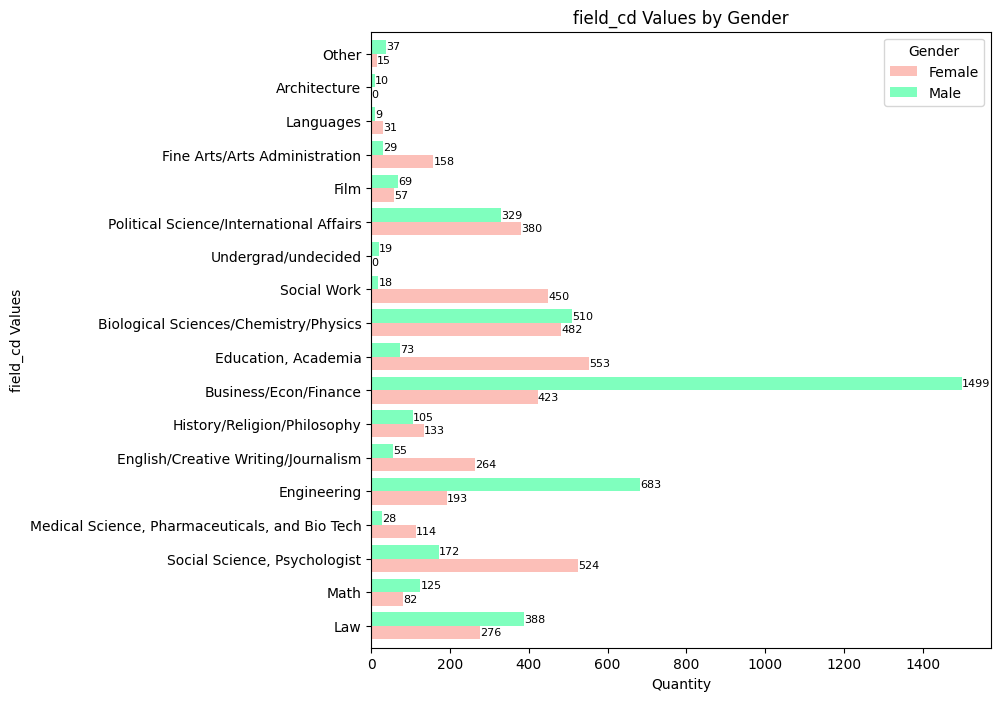

In [329]:
# Filter the DataFrame to exclude rows with 'field_cd' equal to -1
df_filtered = df[df['field_cd'] != -1]

# Group the data by 'field_cd' and 'gender', and calculate the counts
grouped_data = df_filtered.groupby(['field_cd', 'gender']).size().unstack()

# Plotting the data
fig, ax = plt.subplots(figsize=(8, 8))

bars = grouped_data.plot(kind='barh', ax=ax, color=["salmon", 'springgreen'], width=0.8, alpha=0.5)

# Set labels and titles
plt.ylabel('field_cd Values')
plt.xlabel('Quantity')
plt.title('field_cd Values by Gender')

# Customize the legend
plt.legend(title='Gender', labels=['Female', 'Male'], loc='upper right')

# Customize y-axis tick labels
custom_y_labels = ["Law", "Math", 'Social Science, Psychologist', 'Medical Science, Pharmaceuticals, and Bio Tech',
                   'Engineering', 'English/Creative Writing/Journalism', 'History/Religion/Philosophy',
                   'Business/Econ/Finance', 'Education, Academia', 'Biological Sciences/Chemistry/Physics',
                   'Social Work', 'Undergrad/undecided', 'Political Science/International Affairs', 'Film',
                   'Fine Arts/Arts Administration', 'Languages', 'Architecture', 'Other']
ax.set_yticklabels(custom_y_labels)

# Display numeric count values above each bar
for i, bar in enumerate(bars.patches):
    count = bar.get_width()
    plt.text(count + 0.3, bar.get_y() + bar.get_height() / 2, f'{count:.0f}', va='center', color='black', fontsize=8)

# Show the plot
plt.show()

Bar graph showing the relationship between the gender and the participant's field of study.
  * We can extract the following insights from the graph:
    * Fine Arts/Arts Administration - Female participants study fine Arts/Arts Administration 5 times more than male participants. <br/>
    Female=158 , Male=29
    * Social Work - Social Work studies are common amongst female participants while very rare amogst male partcipants. <br/>
    Female=450 , Male=18
    * Education/Academia - Education/Academia studies are common amongst female participants while very limited amogst male partcipants. <br/>
    Female=553 , Male=73
    * Business/Econ/Finance - The most common field of study amongst male participants. <br/>
    Female=423 , Male=1499
    * Engineering - Male participants study Engineering 3.5 times more than female participants. <br/>
    Female=193 , Male=683



####**3.1.3 gender Vs field of study Vs age**

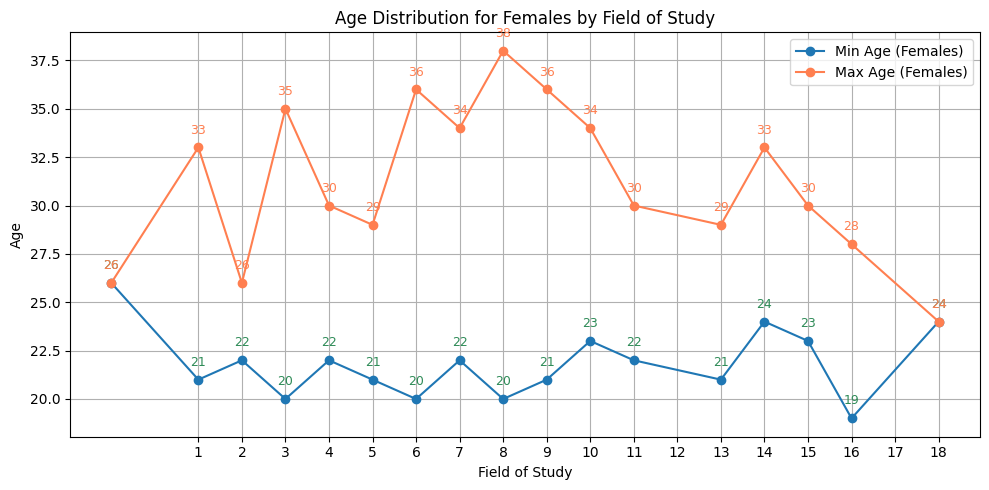

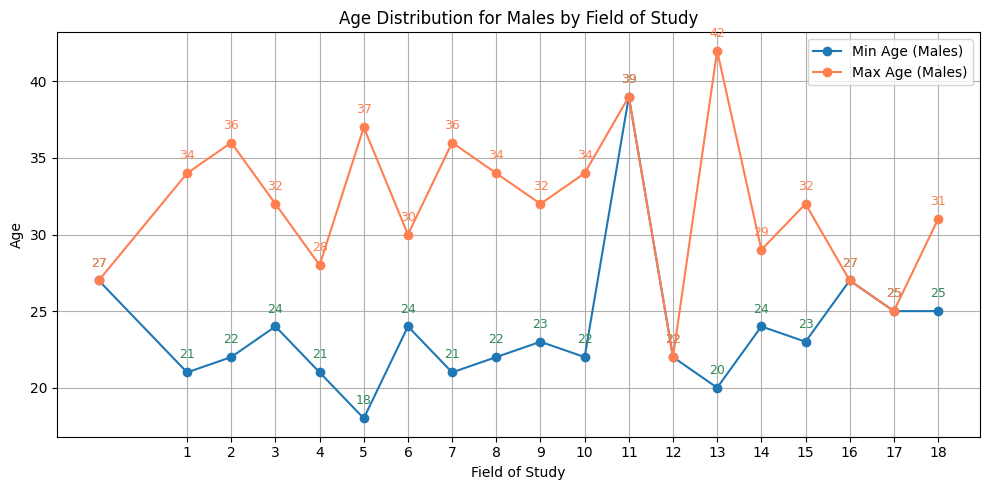

In [330]:
females_data = df[df['gender'] == 0]
males_data = df[df['gender'] == 1]

min_age_females = females_data.groupby('field_cd')['age'].min()
max_age_females = females_data.groupby('field_cd')['age'].max()

min_age_males = males_data.groupby('field_cd')['age'].min()
max_age_males = males_data.groupby('field_cd')['age'].max()

plt.figure(figsize=(10, 5))
plt.plot(min_age_females.index, min_age_females, marker='o', label='Min Age (Females)')
plt.plot(max_age_females.index, max_age_females, marker='o', color='coral', label='Max Age (Females)')
plt.xlabel('Field of Study')
plt.ylabel('Age')
plt.title('Age Distribution for Females by Field of Study')
plt.xticks(range(1, 19), rotation=0)
plt.legend()
plt.grid(True)
plt.tight_layout()

for x, y in zip(min_age_females.index, min_age_females):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='seagreen')

for x, y in zip(max_age_females.index, max_age_females):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='coral')

plt.show()

plt.figure(figsize=(10,5))
plt.plot(min_age_males.index, min_age_males, marker='o', label='Min Age (Males)')
plt.plot(max_age_males.index, max_age_males, marker='o',color='coral', label='Max Age (Males)')
plt.xlabel('Field of Study')
plt.ylabel('Age')
plt.title('Age Distribution for Males by Field of Study')
plt.xticks(range(1, 19), rotation=0)
plt.legend()
plt.grid(True)
plt.tight_layout()

for x, y in zip(min_age_males.index, min_age_males):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='seagreen')

for x, y in zip(max_age_males.index, max_age_males):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='coral')

plt.show()

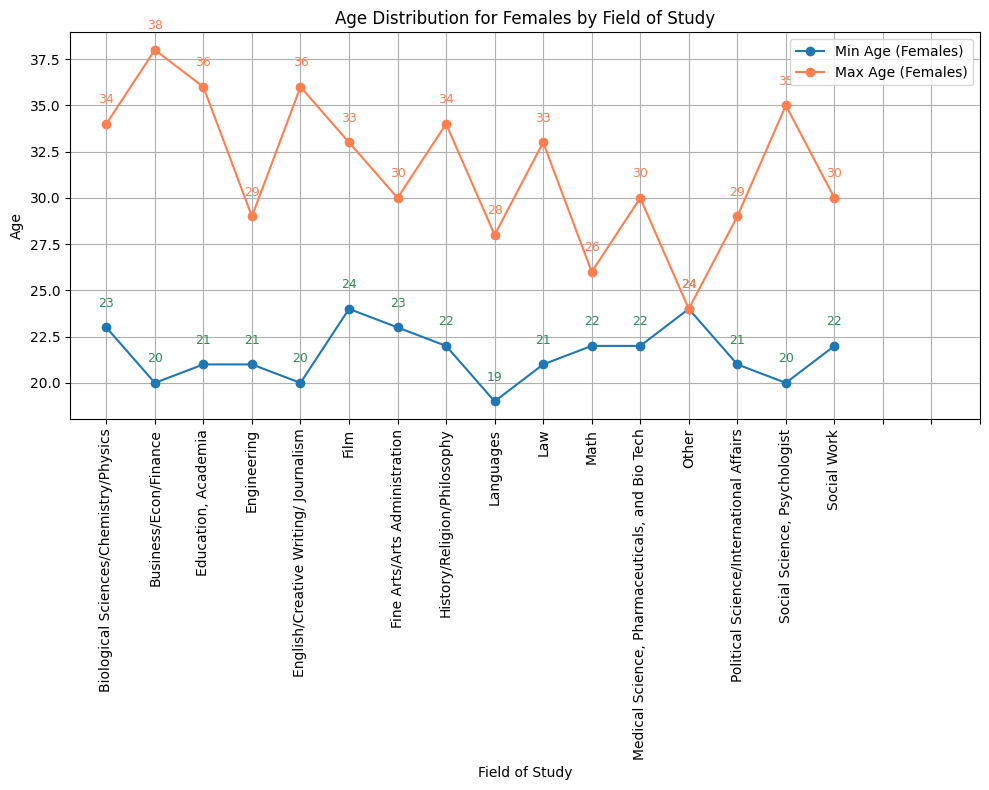

In [331]:
df_copy['gender'] = df['gender']

females_data = df_copy[df_copy['gender'] == 0]
males_data = df_copy[df_copy['gender'] == 1]

# Calculate minimum and maximum age for each field of study
min_age_females = females_data.groupby('field_cd')['age'].min()
max_age_females = females_data.groupby('field_cd')['age'].max()
min_age_males = males_data.groupby('field_cd')['age'].min()
max_age_males = males_data.groupby('field_cd')['age'].max()

plt.figure(figsize=(10,8))
plt.plot(min_age_females.index, min_age_females, marker='o', label='Min Age (Females)')
plt.plot(max_age_females.index, max_age_females, marker='o', color='coral', label='Max Age (Females)')
plt.xlabel('Field of Study')
plt.ylabel('Age')
plt.title('Age Distribution for Females by Field of Study')
plt.xticks(range(0, 19), rotation=90)  # Adjust the range if needed
plt.legend()
plt.grid(True)
plt.tight_layout()

for x, y in zip(min_age_females.index, min_age_females):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 15), ha='center', fontsize=9, color='seagreen')

for x, y in zip(max_age_females.index, max_age_females):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 15), ha='center', fontsize=9, color='coral')

plt.show()

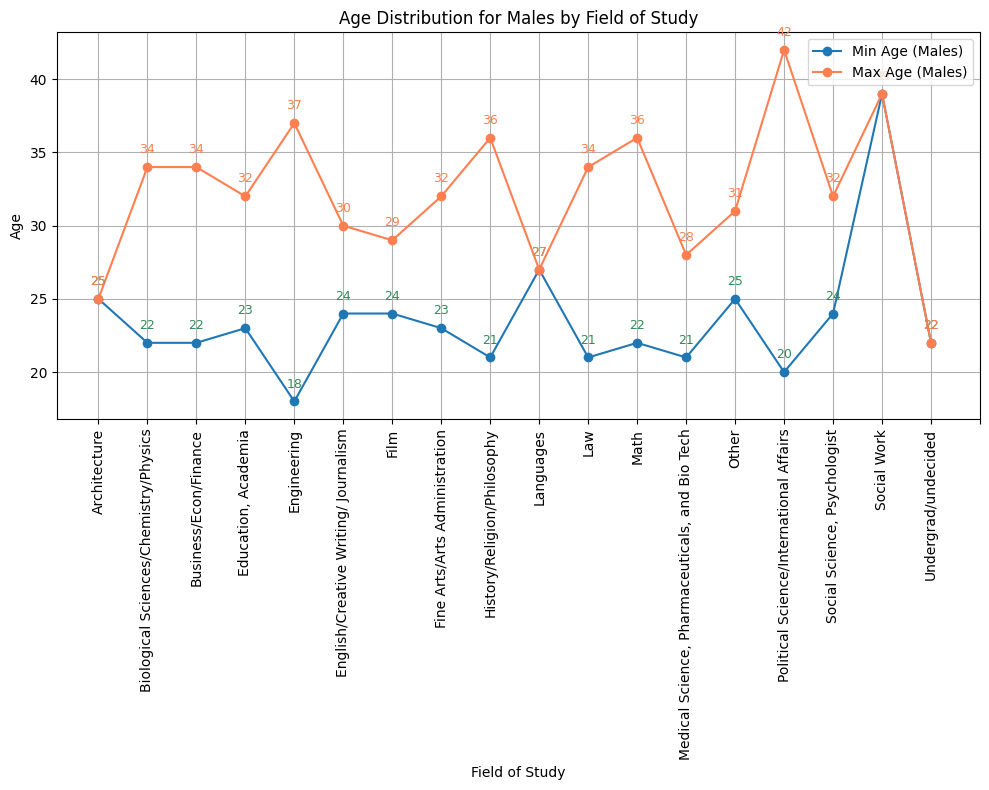

In [332]:
plt.figure(figsize=(10,8))
plt.plot(min_age_males.index, min_age_males, marker='o', label='Min Age (Males)')
plt.plot(max_age_males.index, max_age_males, marker='o',color='coral', label='Max Age (Males)')
plt.xlabel('Field of Study')
plt.ylabel('Age')
plt.title('Age Distribution for Males by Field of Study')
plt.xticks(range(0, 19), rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

for x, y in zip(min_age_males.index, min_age_males):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='seagreen')

for x, y in zip(max_age_males.index, max_age_males):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='coral')

plt.show()

## **3.2.0 Dating: goal, date, go-out**

####**3.2.1 goal by age**

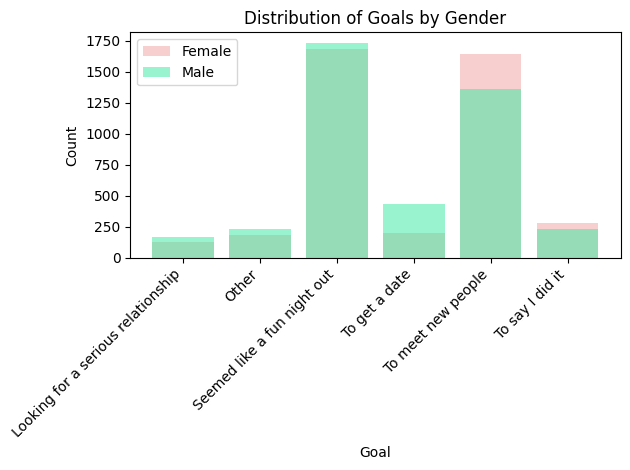

In [333]:
dfplot1 = df.copy()
dfplot1['gender'] = dfplot1['gender'].map({0: 'Female', 1: 'Male'})
goal_labels = {
    1: 'Seemed like a fun night out',
    2: 'To meet new people',
    3: 'To get a date',
    4: 'Looking for a serious relationship',
    5: 'To say I did it',
    6: 'Other'}

dfplot1['goal'] = dfplot1['goal'].map(goal_labels)

# Count the occurrences of each gender-goal combination
count1 = dfplot1.groupby(['gender', 'goal']).size().unstack(fill_value=0)

# Plotting the bar plot
fig, ax = plt.subplots()

for gender in dfplot1['gender'].unique():
    counts1 = count1.loc[gender]
    alpha = 0.5
    color = '#35E9A1' if gender == 'Male' else '#F3A1A1'
    ax.bar(counts1.index, counts1, label=gender, color=color, alpha=alpha)

ax.set_xlabel('Goal')
ax.set_ylabel('Count')
ax.set_title('Distribution of Goals by Gender')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Bar graph showing the relationship between the participant's goals (primary goal in participating in this event) and the participant's gender.
  * The most common goal (for both genders) is 'seemed like a fun night out'.
  * The least common goal (for both genders) is 'Looking for a serious relationship'. <br/>
  
  We can see siginificant differneces between the gender's goals in the following two categories:
    * 'To meet new people' - More common amongst female participants.
    * 'To get a date' - More common amongst male participants.

####**3.2.2 goal by gender**

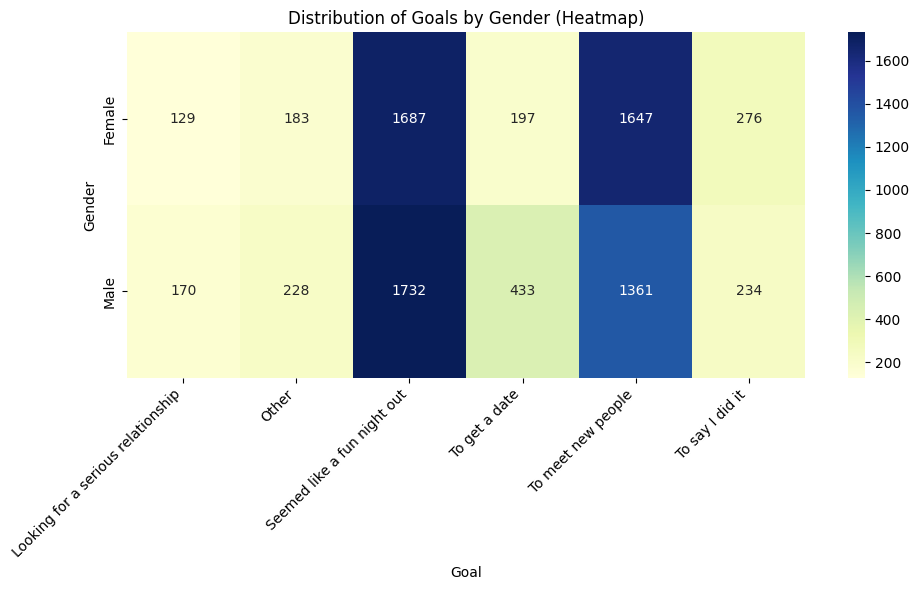

In [334]:
# Count the occurrences of each gender-goal combination
count1 = dfplot1.groupby(['gender', 'goal']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(count1, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Goal')
plt.ylabel('Gender')
plt.title('Distribution of Goals by Gender (Heatmap)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Heat map counting participant's goals (primary goal in participating in this event) divided by gender.
  * Female participants - Most female participant's primary goal in participating in this event is 'seemed like a fun night out' and 'To meet new people' both distributed similarly while other goal counts are much lower.
  * Male - Most male participant's primary goal in participating in this event is 'seemed like a fun night out' while the second most common goal is 'To meet new people'.

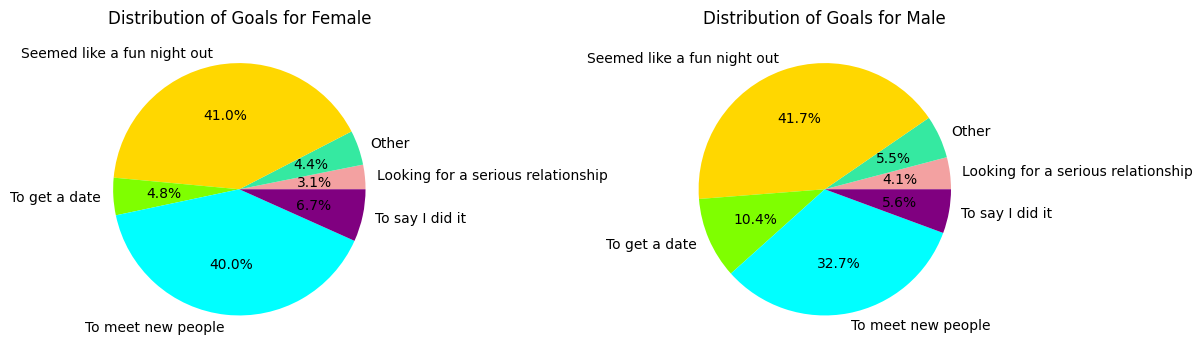

In [335]:
# Create a pivot table to count the occurrences of each gender-goal combination
pivot_table = dfplot1.pivot_table(index='gender', columns='goal', aggfunc='size', fill_value=0)

# Create pie charts for each gender
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, gender in enumerate(pivot_table.index):
    ax = axes[i]
    goals = pivot_table.columns
    counts = pivot_table.loc[gender]
    ax.pie(counts, labels=goals, autopct='%1.1f%%', colors=['#F3A1A1', '#35E9A1', '#FFD700', '#7FFF00', '#00FFFF', '#800080'])
    ax.set_title(f'Distribution of Goals for {gender}')

plt.tight_layout()
plt.show()

Pie chart showing the distribution of participant's goals (primary goal in participating in this event) divided by gender.
  * Female participants:
    * 41% of female participant's primary goal in participating in this event is 'Seemed like a fun night out'.
    * 40% of female participant's primary goal in participating in this event is 'To meet new people'.
    * only 3.1% of female participant's primary goal in participating in this event is 'Looking for a serious relationship'.
  * Male participants:
    * 41.7% of male participant's primary goal in participating in this event is 'seemed like a fun night out'.
    * 32.7% of male participant's primary goal in participating in this event is 'To meet new people'.
    * only 4.1% of male participant's primary goal in participating in this event is 'Looking for a serious relationship'.

####**3.2.3 date by gender**

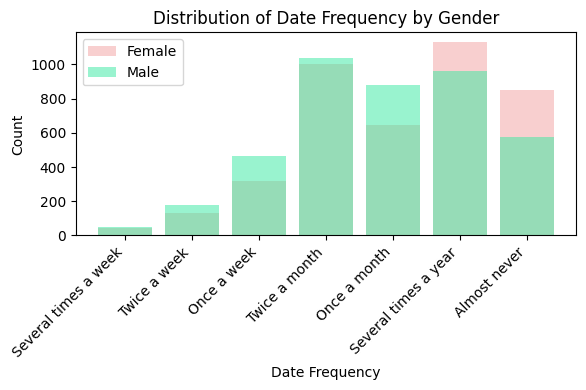

In [336]:
dfplot2 = df.copy()
dfplot2['gender'] = dfplot2['gender'].map({0: 'Female', 1: 'Male'})
date_labels = {
    1: 'Several times a week',
    2: 'Twice a week',
    3: 'Once a week',
    4: 'Twice a month',
    5: 'Once a month',
    6: 'Several times a year',
    7: 'Almost never'}

dfplot2['date'] = dfplot2['date'].map(date_labels)
dfplot2['date'] = pd.Categorical(dfplot2['date'], categories=date_labels.values(), ordered=True)

pivot_table_date = dfplot2.pivot_table(index='gender', columns='date', aggfunc='size', fill_value=0)
fig, ax = plt.subplots(figsize=(6, 4))

for gender in dfplot2['gender'].unique():
    counts_date = pivot_table_date.loc[gender]
    alpha = 0.5
    color = '#35E9A1' if gender == 'Male' else '#F3A1A1'
    ax.bar(counts_date.index, counts_date, label=gender, color=color, alpha=alpha)

ax.set_xlabel('Date Frequency')
ax.set_ylabel('Count')
ax.set_title('Distribution of Date Frequency by Gender')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Bar graph showing the relationship between the participant's dating frequency (how frequently do you go on dates? ) and the participant's gender.
  * The most common dating frequency for female participants is 'several times a year'.
  * The most common dating frequency for male participants is 'Twice a month'
  * The least common goal (for both genders) is 'several times a week'. <br/>

  We can see siginificant differneces between the gender's dating frequency in the following categories:
    * 'Almost never' - More common amongst female participants.
    * 'Several times a year' - More common amongst female participants.
    * 'Once a month' - More common amongst male participants.
    * 'Once a week' - More common amongst male participants.

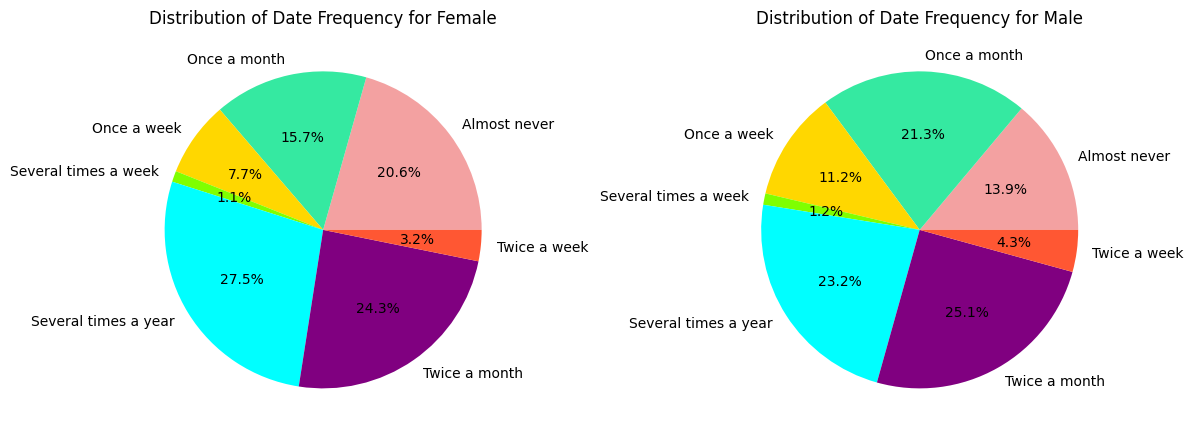

In [337]:
dfplot2 = df.copy()
dfplot2['gender'] = dfplot2['gender'].map({0: 'Female', 1: 'Male'})

date_labels = {
    1: 'Several times a week',
    2: 'Twice a week',
    3: 'Once a week',
    4: 'Twice a month',
    5: 'Once a month',
    6: 'Several times a year',
    7: 'Almost never'
}

dfplot2['date'] = dfplot2['date'].map(date_labels)
pivot_table_date = dfplot2.pivot_table(index='gender', columns='date', aggfunc='size', fill_value=0)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, gender in enumerate(pivot_table_date.index):
    ax = axes[i]
    dates = pivot_table_date.columns
    counts = pivot_table_date.loc[gender]
    ax.pie(counts, labels=dates, autopct='%1.1f%%', colors=['#F3A1A1', '#35E9A1', '#FFD700', '#7FFF00', '#00FFFF', '#800080', '#FF5733'])
    ax.set_title(f'Distribution of Date Frequency for {gender}')

plt.tight_layout()
plt.show()

Pie chart showing the distribution of participant's dating frequency (how frequently do you go on dates) divided by gender.
  * Female participants:
    * 27.6% of female participant's dating frequency is 'Several times a year'.
    * 24.3% of female participant's pdating frequency is 'Twice a month'.
    * only 1.1% of female participant's dating freqeuncy is 'Several times a week'.
  * Male participants:
    * 25.1% of male participant's dating frequency is 'Twice a month'.
    * 23.2% of male participant's dating frequency is 'Several times a year'.
    * only 1.2% of male participant's dating frequency is 'Several times a week'.

####**3.2.4 goal by date frequency**

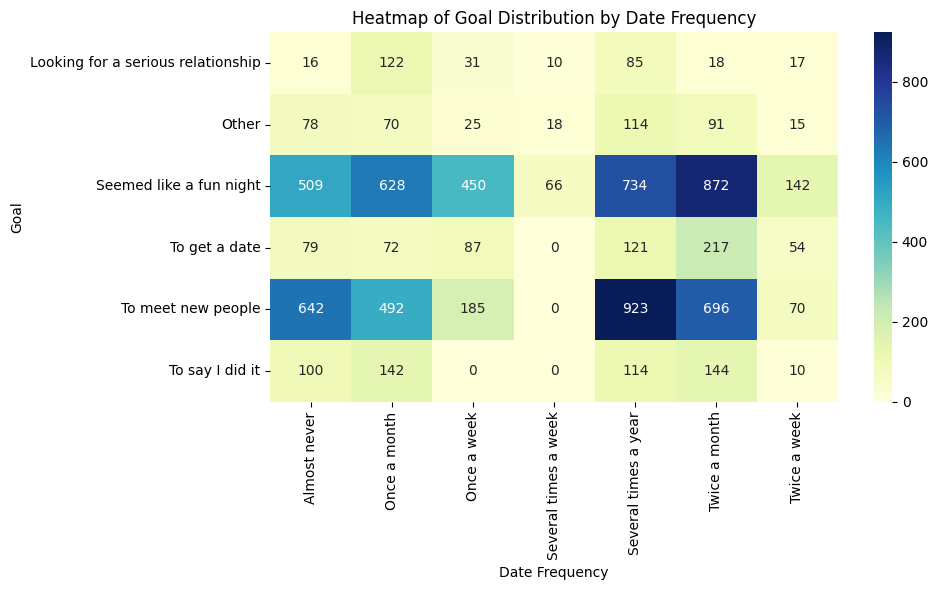

In [338]:
dfplot3 = df.copy()
date_labels = {
    1: 'Several times a week',
    2: 'Twice a week',
    3: 'Once a week',
    4: 'Twice a month',
    5: 'Once a month',
    6: 'Several times a year',
    7: 'Almost never'}

goal_labels = {
    1: 'Seemed like a fun night',
    2: 'To meet new people',
    3: 'To get a date',
    4: 'Looking for a serious relationship',
    5: 'To say I did it',
    6: 'Other'}

dfplot3['date'] = dfplot3['date'].map(date_labels)
dfplot3['goal'] = dfplot3['goal'].map(goal_labels)

pivot_table_goal_date = dfplot3.pivot_table(index='goal', columns='date', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_table_goal_date, cmap='YlGnBu', annot=True, fmt='d')

plt.xlabel('Date Frequency')
plt.ylabel('Goal')
plt.title('Heatmap of Goal Distribution by Date Frequency')
plt.tight_layout()
plt.show()

Heat map showing participant's goal distribution according to dating frequency.
  * The two most frequent goals are 'Seemed like a fun night' and 'To meet new people':
    * 'Seemed like a fun night' - coincides mostly with following dating frequency categories:
      * 'Twice a month' (872 overlaps).
      * 'Several times a year' (734 overlaps).
      * 'Once a month' (628 overlaps).
    * 'To meet new people' - coincides mostly with following dating frequency categories:
      * 'Several times a year' (923 overlaps) - this is the most common coincidence.
      * 'Twice a month' (696 overlaps).
      * 'Almost never' (642 overlaps).

####**3.2.5 go_out by date**

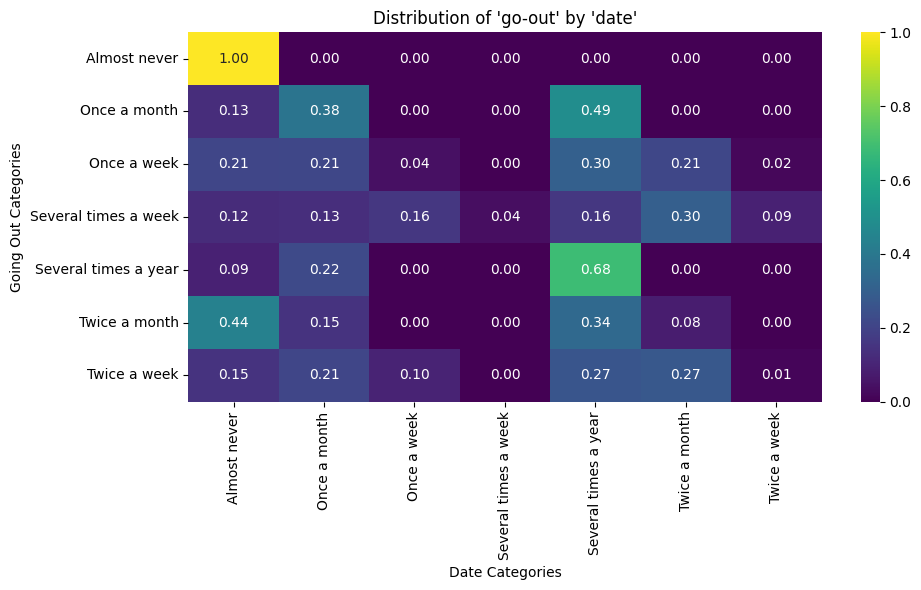

In [339]:
dfplot4 = df.copy()

go_out_labels = {
    1: 'Several times a week',
    2: 'Twice a week',
    3: 'Once a week',
    4: 'Twice a month',
    5: 'Once a month',
    6: 'Several times a year',
    7: 'Almost never'}

date_labels = {
    1: 'Several times a week',
    2: 'Twice a week',
    3: 'Once a week',
    4: 'Twice a month',
    5: 'Once a month',
    6: 'Several times a year',
    7: 'Almost never'
}

dfplot4['go_out'] = dfplot4['go_out'].map(go_out_labels)
dfplot4['date'] = dfplot4['date'].map(date_labels)

cross_tab = pd.crosstab(dfplot4['go_out'], dfplot4['date'], normalize='index')
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='.2f')
plt.title("Distribution of 'go-out' by 'date'")
plt.xlabel('Date Categories')
plt.ylabel('Going Out Categories')
plt.tight_layout()
plt.show()

Heat map showing participant's going out frequency (How often do you go out [not necessarily on dates]?) according to dating frequency (In general, how frequently do you go on dates?).
  * The perticipant's going out frequency is distributed by dating frequency in the following manner:
    * 'Almost never' - all the participants that 'Almost never' go out also 'Almost never' go out on dates.
    * 'Once a month'
      * 49% of participants that go out 'Once a month' go on dates 'Several times a year'.
      * 38% of participants that go out 'Once a month' go on dates 'Once a month'.
      * the rest of paricipants that go out 'Once a month' go on dates 'Almost never'.
    * 'Once a week'
      * 30% of participants that go out 'Once a week' go on dates 'Several times a year'.
      * 62% of participants that go out 'Once a week' go on dates either 'Almost never', 'Once a month' or 'Twice a month'
    * 'Several times a week'
      * 30% of participants that go out 'Several times a week' go on dates 'Twice a month'.
    * 'Several times a year'
      * 68% of participants that go out 'Several times a year' go on dates 'Several times a year'.
      * 22% of participants that go out 'Several times a year' go on dates 'Once a month'.
      * the rest of paricipants that go out 'Several times a year' go on dates 'Almost never'.
    * 'Twice a month'
      * 44% of participants that go out 'Twice a month' go on dates 'Almost never'.
      * 34% of participants that go out 'Twice a month' go on dates 'Several times a year'.
    * 'Twice a week'.
      * 27% of participants that go out 'Twice a week' go on dates 'Twice a month'.
      * 27% of participants that go out 'Twice a week' go on dates 'Several times a year'.
      * 27% of participants that go out 'Twice a week' go on dates 'Once a month'.

## **3.3.0 Bi-variate analysis: “me-other” features**

####**3.3.1 my top activities Vs other's top activities**

In [340]:
df_copy2=df.copy()
same_top_activity_values = []
activity_columns = [
    'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts',
    'music', 'shopping', 'yoga']

placeholder = -1
for index, row in df_copy2.iterrows():
    pid = row['pid']
    iid = row['iid']
    corresponding_row = df_copy2[(df_copy2['iid'] == pid) & (df_copy2['pid'] == iid)]

    if not corresponding_row.empty:
        def find_top_activities(row):
            max_value = row[activity_columns].max()
            top_activities = [col for col in activity_columns if row[col] == max_value]
            return top_activities
        row_filled = row[activity_columns].fillna(placeholder)
        corresponding_row_filled = corresponding_row.iloc[0][activity_columns].fillna(placeholder)

        current_top_activities = find_top_activities(row_filled)
        corresponding_top_activities = find_top_activities(corresponding_row_filled)

        if set(current_top_activities).intersection(set(corresponding_top_activities)):
            same_top_activity = 1
            if set(current_top_activities) == set(corresponding_top_activities):
                same_top_activity = 2
        else:
            same_top_activity = 0
        same_top_activity_values.append(same_top_activity)
    else:
        same_top_activity_values.append(None)
df_copy2['same_top_activity'] = same_top_activity_values

In [341]:
from scipy.stats import pearsonr
activity_correlation_values = []

activity_columns = [
    'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts',
    'music', 'shopping', 'yoga']

for index, row in df_copy2.iterrows():
    pid = row['pid']
    iid = row['iid']

    corresponding_row = df_copy2[(df_copy2['iid'] == pid) & (df_copy2['pid'] == iid)]

    if not corresponding_row.empty:
        current_row_filled = row[activity_columns].fillna(0)
        corresponding_row_filled = corresponding_row.iloc[0][activity_columns].fillna(0)

        if current_row_filled.std() != 0 and corresponding_row_filled.std() != 0:
            correlation, _ = pearsonr(current_row_filled, corresponding_row_filled)
            activity_correlation_values.append(correlation)
        else:
            activity_correlation_values.append(None)
    else:
        activity_correlation_values.append(None)

df_copy2['activity_correlation'] = activity_correlation_values

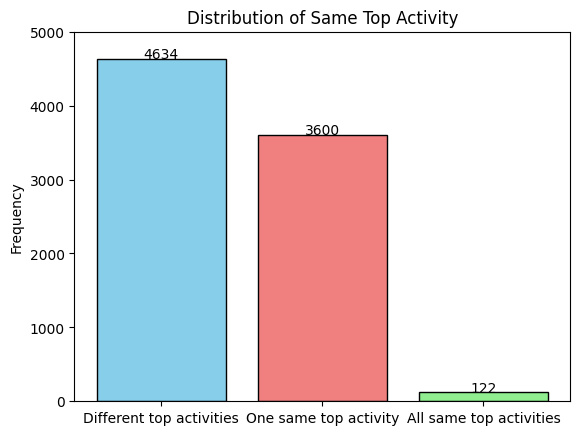

In [342]:
from matplotlib.patches import Patch
same_top_activity_values_filtered = [value for value in same_top_activity_values if value is not None]
colors = ['skyblue', 'lightcoral', 'lightgreen']

value_counts = {0: 0, 1: 0, 2: 0}
for value in same_top_activity_values_filtered:
    value_counts[value] += 1

bar = plt.bar(value_counts.keys(), value_counts.values(), color=colors, edgecolor='black')
plt.ylabel('Frequency')
plt.title('Distribution of Same Top Activity')
tick_labels = ['Different top activities', 'One same top activity', 'All same top activities']
plt.xticks(list(value_counts.keys()), tick_labels)
for x, y in zip(value_counts.keys(), value_counts.values()):
    plt.text(x, y + 5, str(y), ha='center')

plt.ylim(0, 5000)
plt.show()

Bar graph showing the relationship between the participant's top activities (How interested are you in the following activities [sports:tvsports:excersice:dining:museums:art:hiking:gaming:clubbing:reading:tv:theater:movies:concerts:music:shopping:yoga]?) and the participant's partner's top activities.
  * Only 122 dates were made between participants with exactly the same top activities.
  * 3600 dates were made between participants with at least one same top activity.
  * Most dates (4634) were made between participants with different top activities.

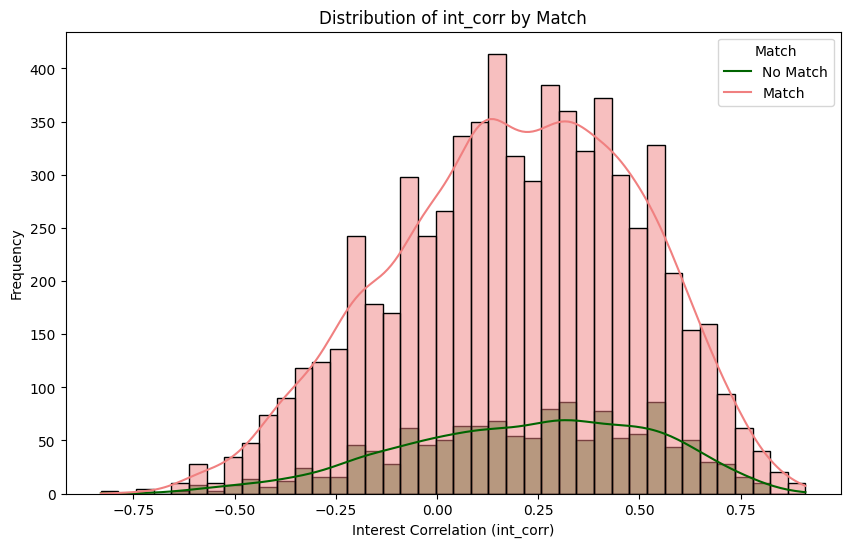

In [343]:
filtered_data = df_copy2[df_copy2['int_corr'].notna() & (df_copy2['int_corr'] != -2)]
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x="int_corr", hue="match", palette={0: "lightcoral", 1: "darkgreen"}, kde=True)
plt.title("Distribution of int_corr by Match")
plt.xlabel("Interest Correlation (int_corr)")
plt.ylabel("Frequency")
plt.legend(title="Match", labels=["No Match", "Match"])
plt.show()

Histogram showing the frequency of 'interests correlation' between both participants in a date divided into succesful matches and unsuccesful mathces.
* The successful and unsuccessful matches are quite normally distributed around the 20%-30% 'interest correlation'.
  * We can conclude that 'interest correlation' between both particiants in a date doesn't necessarily contribute to the success of a date.

####**3.3.2 my race Vs other's race**

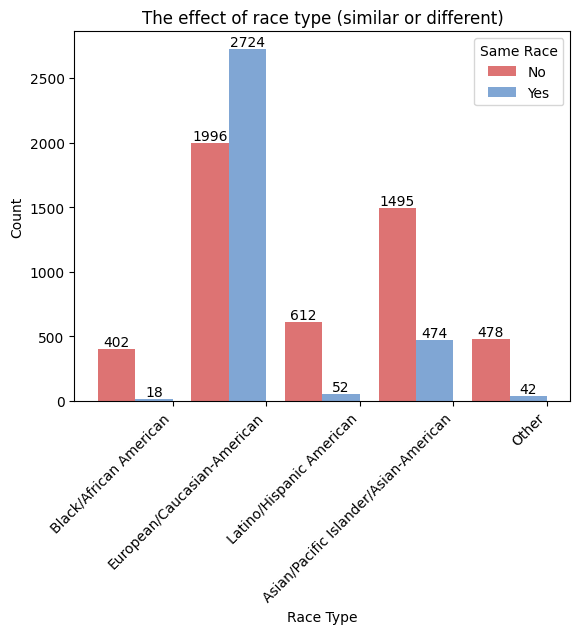

<Figure size 800x800 with 0 Axes>

In [344]:
import pandas as pd
import matplotlib.pyplot as plt

df_copy = df.copy()

# Filter out rows where 'race' is -1
df_copy = df_copy[df_copy['race'] != -1]

# Map the 'samerace' column
df_copy['samerace'] = df_copy['samerace'].map({1: 'Yes', 0: 'No'})

# Group by race and same race, then count occurrences
data = df_copy.groupby(['race', 'samerace']).size().unstack(fill_value=0)

# List of race labels
race_labels = [
     'Black/African American',
     'European/Caucasian-American',
     'Latino/Hispanic American',
     'Asian/Pacific Islander/Asian-American',
     'Other']

# Create the bar plot
ax = data.plot(kind='bar', width=0.8, color=['#DD7373', '#80A6D4'])

# Adding value labels on top of the bars
for i in ax.patches:
     ax.text(i.get_x() + i.get_width() / 2, i.get_height(),
             str(i.get_height()), ha='center', va='bottom')

# Calculate x-axis positions for labels with rotation
x_positions = [i + 0.4 for i in range(len(race_labels))]
plt.xticks(x_positions, race_labels, rotation=45, ha='right')

# Set labels and titles
plt.xlabel('Race Type')
plt.ylabel('Count')
plt.title('The effect of race type (similar or different)')
plt.legend(title='Same Race')

# Set the size of the figure
plt.figure(figsize=(8, 8))

plt.show()

Bar graph showing the amount of dates between partners of the same race distributed by race types.
* 'European/Caucasian-American' race is the only race that had more date partners from the same race than with partners from different races.
* Apart from 'Asian/Pacific Island/Asian American' race that had around 30% date partners from the same race, all other race types had nearly non same race partners.

####**3.3.3 my career Vs other's career**

In [345]:
df_copy1=df.copy()
def mark_same_career(row):
    pid_value = row['pid']
    matching_rows = df_copy1[df_copy1['iid'] == pid_value]

    if not matching_rows.empty:
        matching_row = matching_rows.iloc[0]

        if pd.notna(row['career_c']) and pd.notna(matching_row['career_c']):
            if row['career_c'] == matching_row['career_c']:
                return 1
    return 0

df_copy1['samecareer'] = df_copy1.apply(mark_same_career, axis=1)

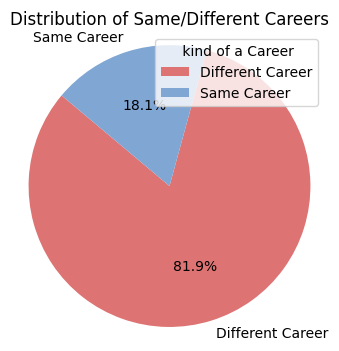

In [346]:
# Count the occurrences of each value in 'samecareer'
samecareer_counts = df_copy1['samecareer'].value_counts()

# Define labels for the pie chart
labels = ['Different Career', 'Same Career']

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(samecareer_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#DD7373', '#80A6D4'])
plt.title('Distribution of Same/Different Careers')
plt.legend(title=' kind of a Career', loc='upper right')
plt.axis('equal')

plt.show()

Pie chart showing that only 18.1% of dates were between participants with careers in the same field.

## **4.4.0 Dating (analyze each question separately for each gender)**

####**4.4.1 what you look for in the opposite sex**

***During Sign-up questionnaire***

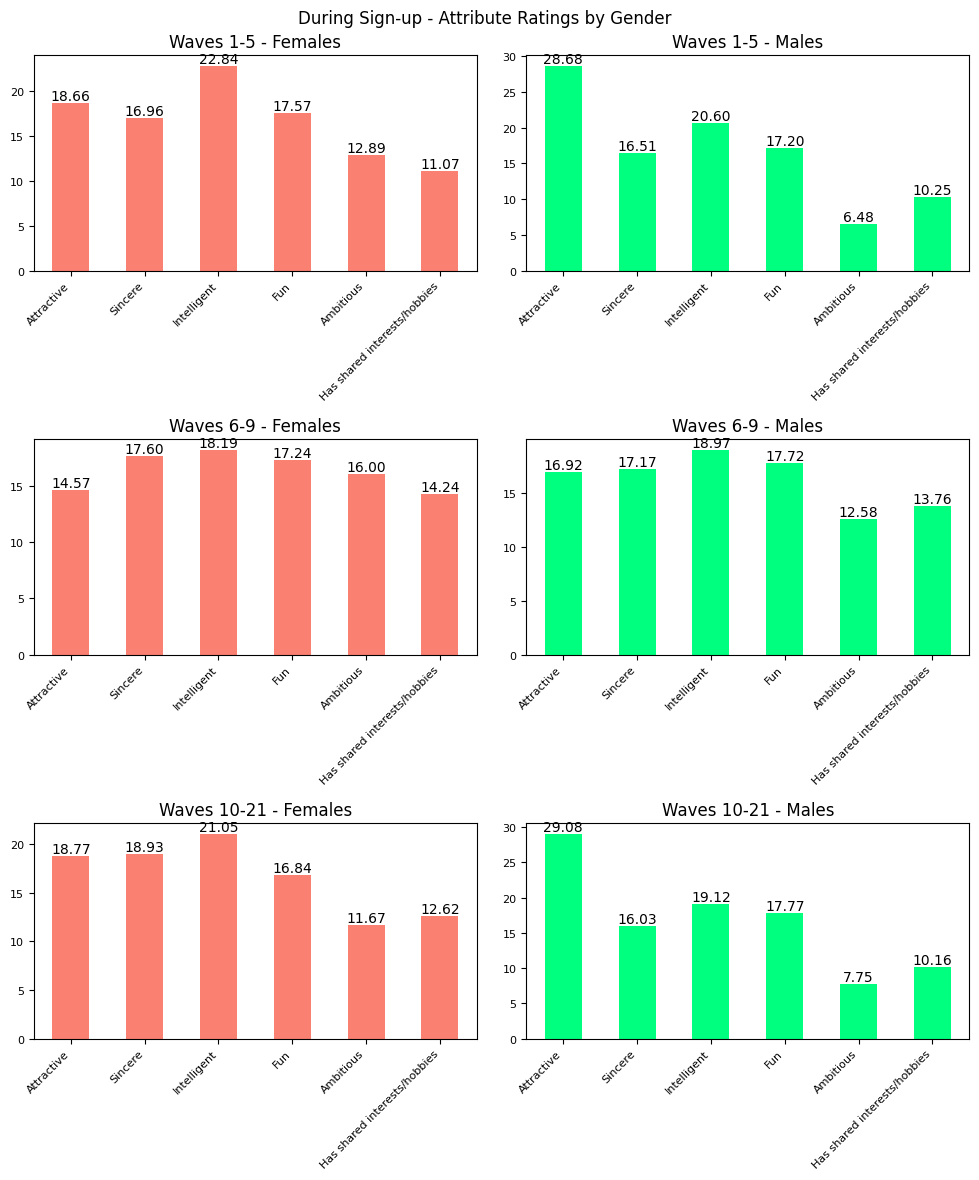

In [347]:
# Map gender values to labels
gender_mapping = {0: 'Female', 1: 'Male'}
df_copy['gender'] = df_copy['gender'].map(gender_mapping)

# Define the column names for the attributes
attribute_columns = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
attribute_labels = ["Attractive", "Sincere", "Intelligent", "Fun", "Ambitious", "Has shared interests/hobbies"]

# Create a list of wave ranges and corresponding titles
wave_ranges = [(1, 5, "Waves 1-5"),(6, 9, "Waves 6-9"), (10, 21, "Waves 10-21")]

# Create a matrix of 3 rows and 2 columns for subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,12))
fig.suptitle("During Sign-up - Attribute Ratings by Gender", fontsize=12)

colors = {"Female": "salmon", "Male": "springgreen"}

for row, (wave_start, wave_end, wave_title) in enumerate(wave_ranges):
    # Filter the data based on the wave column
    filtered_df = df_copy[(df_copy['wave'] >= wave_start) & (df_copy['wave'] <= wave_end)]

    # Group data by gender and calculate mean for each attribute
    grouped_data = filtered_df.groupby('gender')[attribute_columns].mean()

    for col, gender in enumerate(grouped_data.index):
        ax = axes[row][col]  # Fix the indexing here
        gender_data = grouped_data.loc[gender]

        gender_color = colors[gender]
        gender_data.plot(kind='bar', ax=ax, title=f"{wave_title} - {gender}s", color=gender_color, fontsize=8)

        # Add values above bars
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 5),
                        textcoords='offset points')

        # Rotate x-axis labels
        ax.set_xticklabels(attribute_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Bar graph showing how participants rated their preferred attributes in the opposite sex (During sign-up) divided by gender. We will concentrate on the graphs for waves 1-5 and 10-21 as waves 6-9 were rated in a different method (waves 1-5 and 10-21 consist the majority of participants).
* Females - Preferred attribute is 'Intelligent'.
* Males - Preferred attribute is 'Attractive.

***During Half-way***

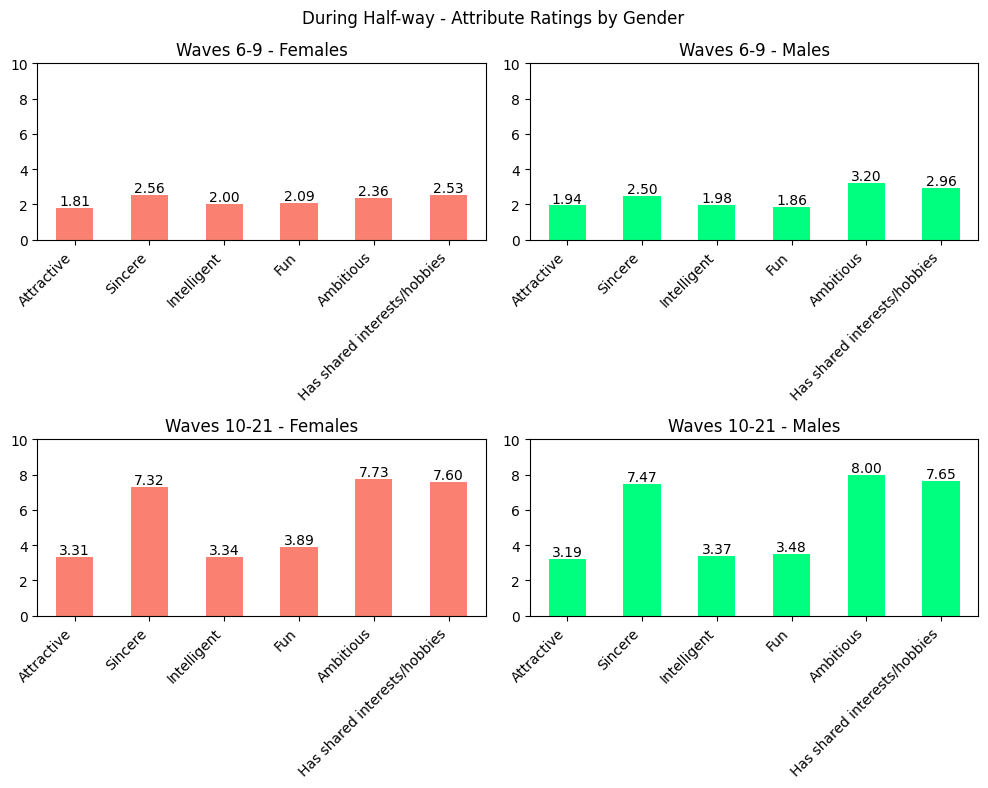

In [348]:
attribute_columns = ["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"]
attribute_labels = ["Attractive", "Sincere", "Intelligent", "Fun", "Ambitious", "Has shared interests/hobbies"]
wave_ranges = [(6, 9, "Waves 6-9"), (10, 21, "Waves 10-21")]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle("During Half-way - Attribute Ratings by Gender", fontsize=12)

colors = {"Female": "salmon", "Male": "springgreen"}

for row, (wave_start, wave_end, wave_title) in enumerate(wave_ranges):
    filtered_df = df_copy[(df_copy['wave'] >= wave_start) & (df_copy['wave'] <= wave_end)]
    grouped_data = filtered_df.groupby('gender')[attribute_columns].mean()

    for col, gender in enumerate(grouped_data.index):
        ax = axes[row][col]
        gender_data = grouped_data.loc[gender]
        gender_color = colors[gender]
        gender_data.plot(kind='bar', ax=ax, title=f"{wave_title} - {gender}s", color=gender_color, fontsize=10)

        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 5),
                        textcoords='offset points')

        ax.set_xticklabels(attribute_labels, rotation=45, ha='right')
        ax.set_ylim(0, 10)
plt.tight_layout()
plt.show()

Bar graph showing how participants rated their preferred attributes in the opposite sex (Half way through meeting) divided by gender.  
* Both males and females rated the same 3 most preferred attribute:<br/>
'Sincere', 'Ambitious' and 'Has shared interests/hobbies'.

***Comparison between during Sign-up and half-way***

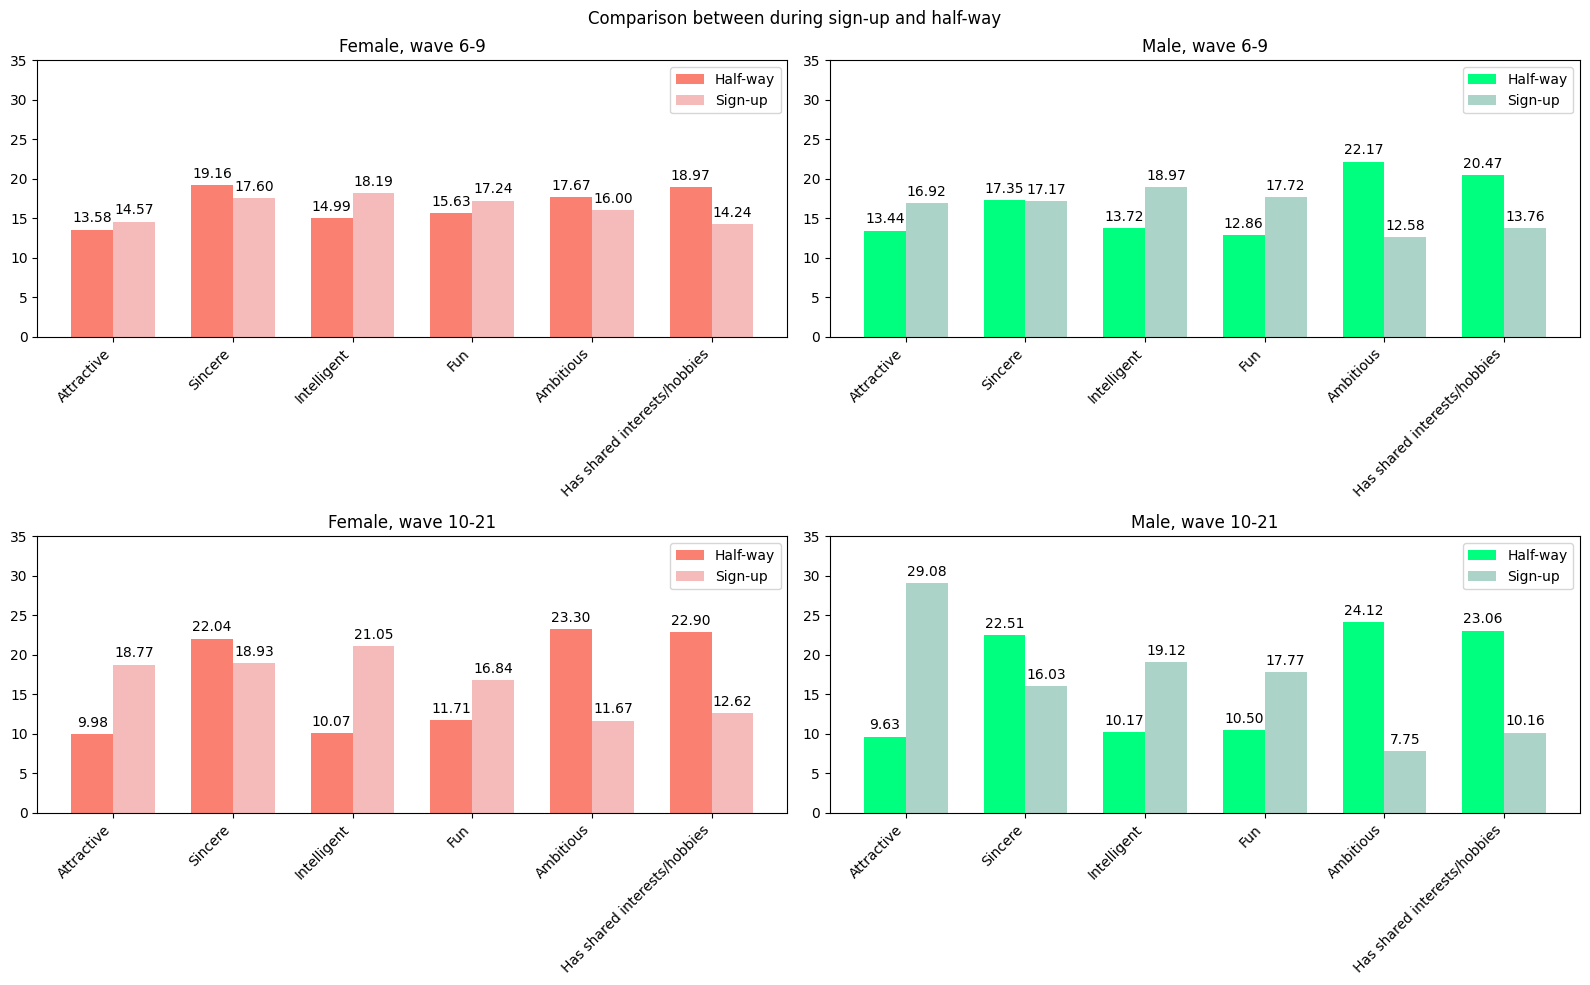

In [349]:
new_attribute_labels = ["Attractive", "Sincere", "Intelligent", "Fun", "Ambitious", "Has shared interests/hobbies"]
attribute_columns = ["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"]
additional_attribute_columns = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
wave_ranges = [(6, 9, "Waves 6-9"), (10, 21, "Waves 10-21")]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
fig.suptitle("Comparison between during sign-up and half-way", fontsize=12)

colors = {"Female": "salmon", "Male": "springgreen"}

bar_width = 0.35

for row, (wave_start, wave_end, wave_title) in enumerate(wave_ranges):
    filtered_df = df_copy[(df_copy['wave'] >= wave_start) & (df_copy['wave'] <= wave_end)]
    grouped_data = filtered_df.groupby('gender')[attribute_columns].mean()
    additional_grouped_data = filtered_df.groupby('gender')[additional_attribute_columns].mean()
    grouped_data_normalized = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

    for col, gender in enumerate(grouped_data.index):
        ax = axes[row][col]
        gender_data = grouped_data_normalized.loc[gender]
        additional_gender_data = additional_grouped_data.loc[gender]

        ind = np.arange(len(gender_data))
        gender_color = colors[gender]
        signup_color = "#58A890" if gender == "Male" else "#EC7876"
        rects1 = ax.bar(ind, gender_data, bar_width, label=f"Half-way", color=gender_color)
        rects2 = ax.bar(ind + bar_width, additional_gender_data, bar_width, label='Sign-up', color=signup_color, alpha=0.5)

        for rects in [rects1, rects2]:
            for rect in rects:
                height = rect.get_height()
                ax.annotate(f'{height:.2f}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha='center', va='bottom')

        ax.set_xticks(ind + bar_width / 2)
        ax.set_xticklabels(new_attribute_labels, rotation=45, ha='right')
        ax.legend()
        ax.set_ylim(0, 35)

        if row == 0:
            if col == 0:
                ax.set_title("Female, wave 6-9")
            else:
                ax.set_title("Male, wave 6-9")
        else:
            if col == 0:
                ax.set_title("Female, wave 10-21")
            else:
                ax.set_title("Male, wave 10-21")

plt.tight_layout()
plt.show()

Bar graph comparing between how participants rated their preferred attributes in the opposite sex during signup and how participants rated their preferred attributes in the opposite sex half way through meeting, divided by gender.  
* The ratings of the participants for their preferred attributes in the opposite sex were shifted in the same direction for both genders between signup and halfway:   
  * 'Intelligent', 'Fun' and 'Attractive' were rated lower during the meeting compared to the rating during signup.
  * 'Sincere', 'Ambitious' and 'Has shared interests' were rated higher during the meeting compared to the rating during signup.

####**4.4.2 What’s important for others of the same gender?**

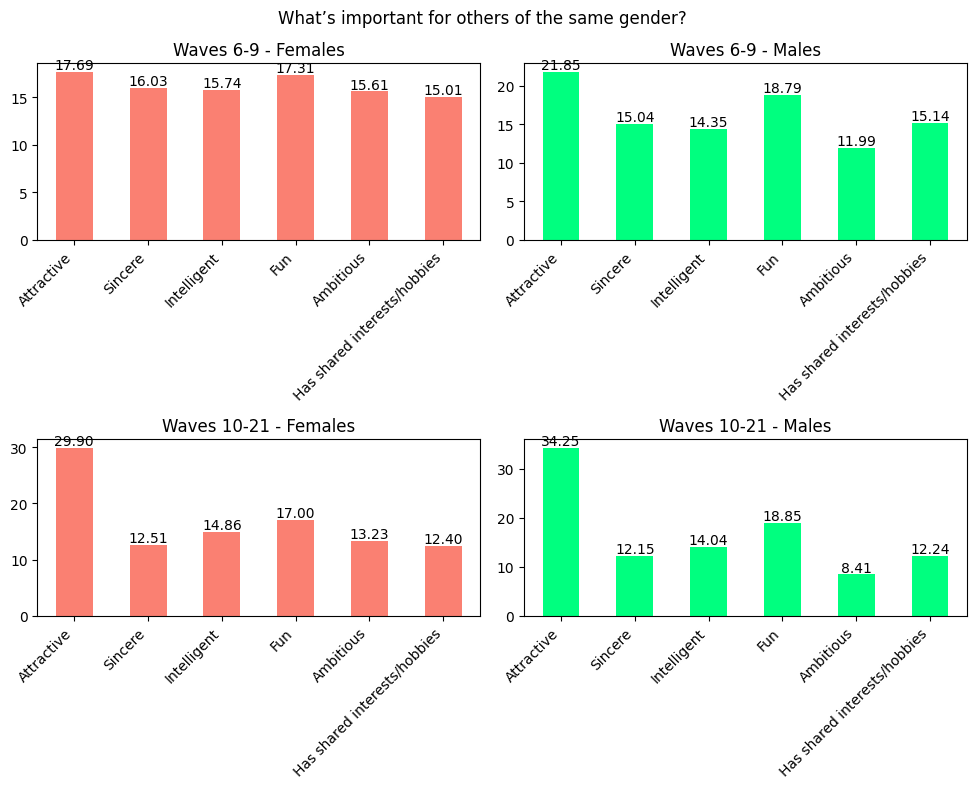

In [350]:
attribute_columns = ["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]
attribute_labels = ["Attractive", "Sincere", "Intelligent", "Fun", "Ambitious", "Has shared interests/hobbies"]

wave_ranges = [(6, 9, "Waves 6-9"), (10, 21, "Waves 10-21")]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle("What’s important for others of the same gender?", fontsize=12)
colors = {"Female": "salmon", "Male": "springgreen"}

for row, (wave_start, wave_end, wave_title) in enumerate(wave_ranges):
    filtered_df = df_copy[(df_copy['wave'] >= wave_start) & (df_copy['wave'] <= wave_end)]
    grouped_data = filtered_df.groupby('gender')[attribute_columns].mean()

    for col, gender in enumerate(grouped_data.index):
        ax = axes[row][col]
        gender_data = grouped_data.loc[gender]
        gender_color = colors[gender]
        gender_data.plot(kind='bar', ax=ax, title=f"{wave_title} - {gender}s", color=gender_color, fontsize=10)

        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 5),
                        textcoords='offset points')

        ax.set_xticklabels(attribute_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

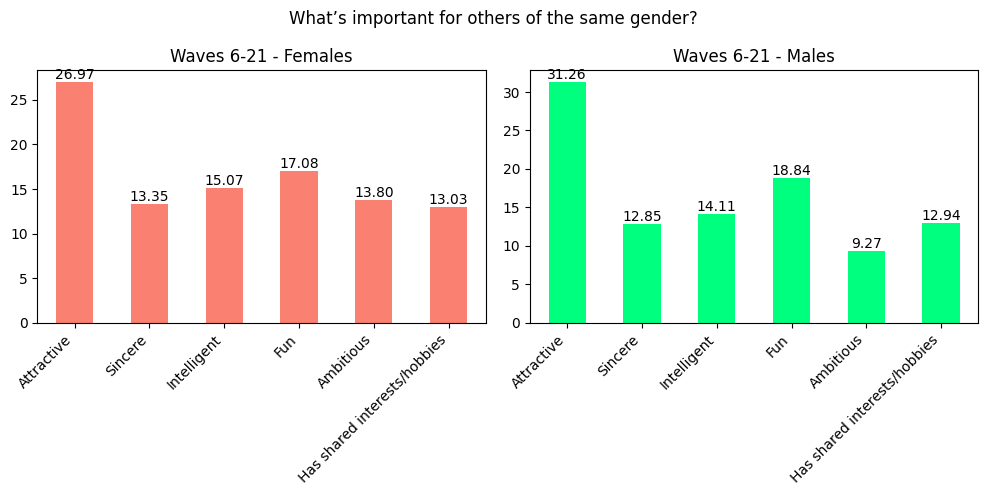

In [351]:
# Define the column names for the attributes
attribute_columns = ["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]
attribute_labels = ["Attractive", "Sincere", "Intelligent", "Fun", "Ambitious", "Has shared interests/hobbies"]

# Create a list of wave ranges and corresponding titles
wave_ranges = [(6, 21, "Waves 6-21")]

# Create a matrix of 1 row and 2 columns for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle("What’s important for others of the same gender?", fontsize=12)

colors = {"Female": "salmon", "Male": "springgreen"}

for row, (wave_start, wave_end, wave_title) in enumerate(wave_ranges):
    for col, gender in enumerate(["Female", "Male"]):
        ax = axes[col]  # Get the appropriate subplot

        # Filter the data based on the wave column and gender
        filtered_df = df_copy[(df_copy['wave'] >= wave_start) & (df_copy['wave'] <= wave_end) & (df_copy['gender'] == gender)]

        # Calculate mean for each attribute
        gender_data = filtered_df[attribute_columns].mean()

        gender_color = colors[gender]
        gender_data.plot(kind='bar', ax=ax, title=f"{wave_title} - {gender}s", color=gender_color, fontsize=10)

        # Add values above bars
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 5),
                        textcoords='offset points')

        # Update x-axis labels
        ax.set_xticklabels(attribute_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Bar graph showing how participants rated what they think MOST of their fellow men/women look for in the opposite sex (During sign-up) divided by gender.
* Both genders rated 'Attactive' as the attribute that they think MOST of their fellow men/women look for in the opposite sex

####**4.4.3 What’s important for others of the opposite gender?**

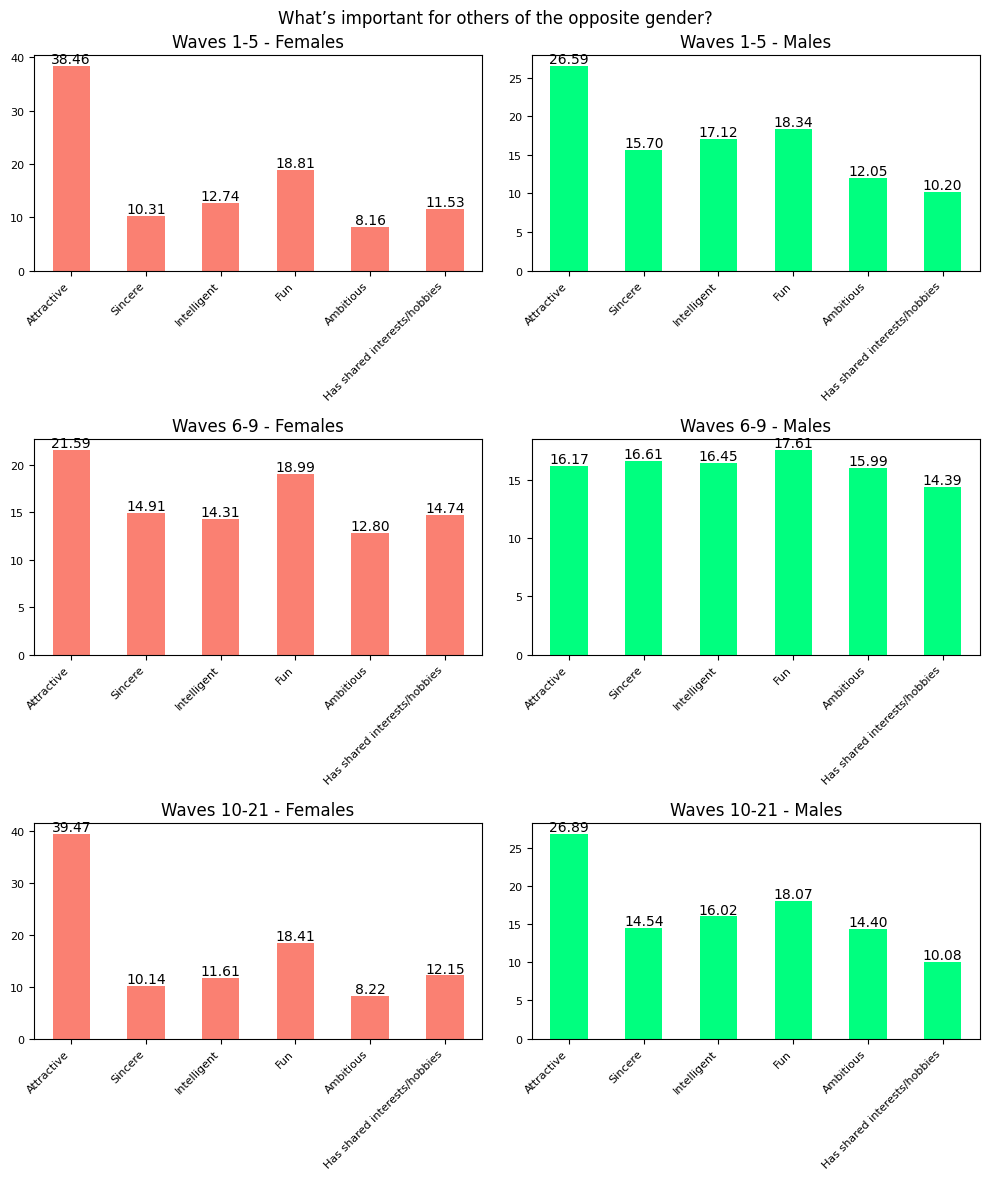

In [352]:
df_copy = df.copy()
# Map gender values to labels
gender_mapping = {0: 'Female', 1: 'Male'}
df_copy['gender'] = df_copy['gender'].map(gender_mapping)

# Define the column names for the attributes
attribute_columns = ["attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"]
attribute_labels = ["Attractive", "Sincere", "Intelligent", "Fun", "Ambitious", "Has shared interests/hobbies"]

# Create a list of wave ranges and corresponding titles
wave_ranges = [(1, 5, "Waves 1-5"), (6, 9, "Waves 6-9"), (10, 21, "Waves 10-21")]

# Create a matrix of 3 rows and 2 columns for subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
fig.suptitle("What’s important for others of the opposite gender?", fontsize=12)

colors = {"Female": "salmon", "Male": "springgreen"}

for row, (wave_start, wave_end, wave_title) in enumerate(wave_ranges):
    # Filter the data based on the wave column
    filtered_df = df_copy[(df_copy['wave'] >= wave_start) & (df_copy['wave'] <= wave_end)]

    if wave_start != 6:  # Apply the sum condition for waves other than 6-9
        # Filter the data further to include only rows with the specified sum condition
        filtered_df = filtered_df[filtered_df[attribute_columns].sum(axis=1) == 100]
    else:
        # Calculate the average for waves 6-9
        grouped_data = filtered_df.groupby('gender')[attribute_columns].mean()
        filtered_df = grouped_data.reset_index()

    # Group data by gender and calculate mean for each attribute
    grouped_data = filtered_df.groupby('gender')[attribute_columns].mean()

    for col, gender in enumerate(grouped_data.index):
        ax = axes[row][col]  # Fix the indexing here
        gender_data = grouped_data.loc[gender]

        gender_color = colors[gender]
        gender_data.plot(kind='bar', ax=ax, title=f"{wave_title} - {gender}s", color=gender_color, fontsize=8)

        # Add values above bars
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 5),
                        textcoords='offset points')

        # Update x-axis labels
        ax.set_xticklabels(attribute_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Bar graph showing how participants rated what they think the opposite sex looks for in a date (During sign-up) divided by gender. We will concentrate on the graphs for waves 1-5 and 10-21 as waves 6-9 were rated in a different method (waves 1-5 and 10-21 consist the majority of participants).
* Both genders rated 'Attactive' as the attribute that they think MOST of their fellow men/women look for in the opposite sex

##**4.5.0 Me vs. others**

####**4.5.1 How do I perceive myself? (how do you think you measure up?)**

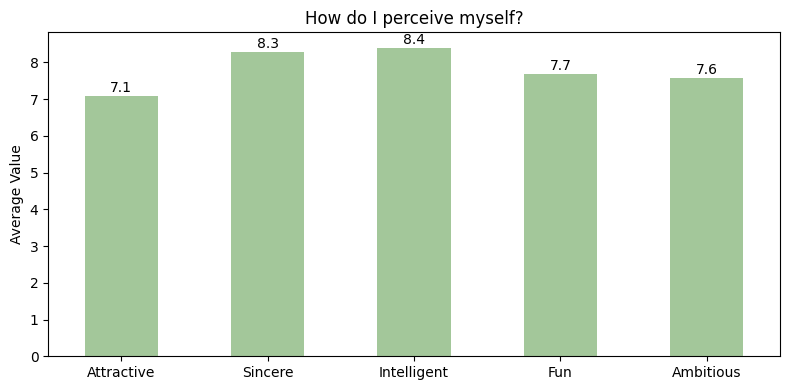

In [353]:
columns_to_plot = ["attr3_1", "sinc3_1", 'intel3_1', "fun3_1", "amb3_1"]

x_labels_mapping = {
    "attr3_1": "Attractive",
    "sinc3_1": "Sincere",
    "intel3_1": "Intelligent",
    "fun3_1": "Fun",
    "amb3_1": "Ambitious"}

df_selected = df[columns_to_plot]
averages = df_selected.mean()
plt.figure(figsize=(8, 4))
ax = plt.gca()
color = "#A3C79A"
averages.plot(kind="bar", ax=ax, color=color)
ax.set_xticklabels([x_labels_mapping[column] for column in averages.index], rotation=0)

for i, v in enumerate(averages):
    ax.text(i, v + 0.1, f"{v:.1f}", ha="center")

plt.title("How do I perceive myself?")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()

Bar graph showing particpant's average rating regarding how they think they measure up.
* Highest rated attributes are 'Intelligent Traits' and 'Sincere'.

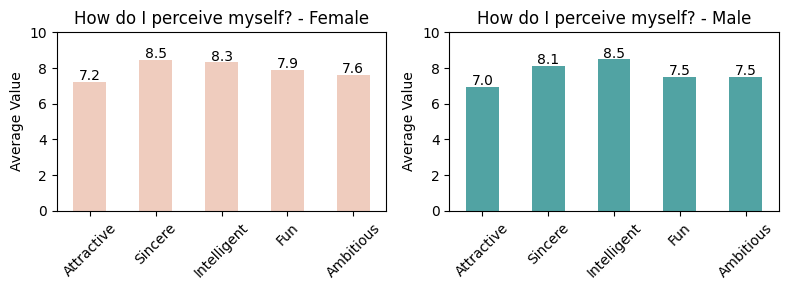

In [354]:
columns_to_plot = ["attr3_1", "sinc3_1", 'intel3_1', "fun3_1", "amb3_1"]

x_labels_mapping = {
    "attr3_1": "Attractive",
    "sinc3_1": "Sincere",
    "intel3_1": "Intelligent",
    "fun3_1": "Fun",
    "amb3_1": "Ambitious"
}

gender_grouped = df.groupby("gender")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
colors = {0: "#EFCCBE", 1: "#51A3A3"}

for gender, ax in zip(gender_grouped.groups.keys(), axes):
    gender_str = "female" if gender == 0 else "male"
    df_gender = gender_grouped.get_group(gender)
    averages = df_gender[columns_to_plot].mean()
    color = colors[gender]
    averages.plot(kind="bar", ax=ax, color=color)
    ax.set_xticklabels([x_labels_mapping[column] for column in averages.index], rotation=45)

    for i, v in enumerate(averages):
        ax.text(i, v + 0.1, f"{v:.1f}", ha="center")

    ax.set_title(f"How do I perceive myself? - {gender_str.capitalize()}")
    ax.set_ylabel("Average Value")
    ax.set_ylim(0, 10)

plt.tight_layout()
plt.show()


Bar graph showing particpant's average rating regarding how they think they measure up divided by gender.
* Female - Highest rated attributes is 'Sincere'.
* Male - Highest rated attribute is 'Intelligent Traits'.

####**4.5.2 How do I think others perceive me? (how do you think others perceive you?)**

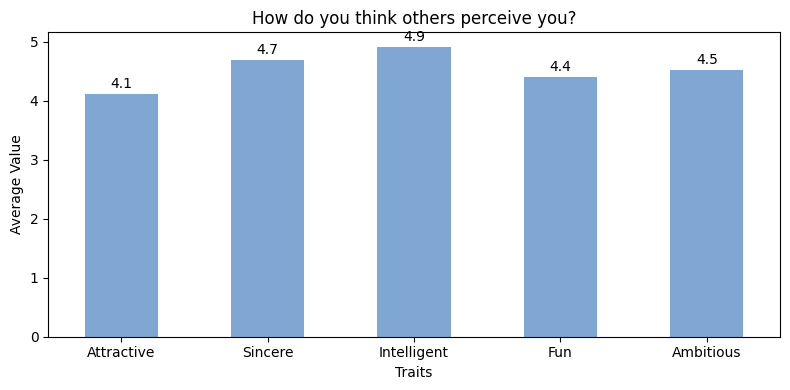

In [355]:
columns_to_plot = ["attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1"]
x_labels_mapping = {
    "attr5_1": "Attractive",
    "sinc5_1": "Sincere",
    "intel5_1": "Intelligent",
    "fun5_1": "Fun",
    "amb5_1": "Ambitious"}
df_selected = df[columns_to_plot]
averages = df_selected.mean()
plt.figure(figsize=(8, 4))
ax = plt.gca()
color = "#80A6D4"
averages.plot(kind="bar", ax=ax, color=color)
ax.set_xticklabels([x_labels_mapping[column] for column in averages.index], rotation=0)
for i, v in enumerate(averages):
    ax.text(i, v + 0.1, f"{v:.1f}", ha="center")
plt.title("How do you think others perceive you?")
plt.xlabel("Traits")
plt.ylabel("Average Value")

plt.tight_layout()
plt.show()

Bar graph showing particpant's average rating regarding how they think others perceive them.
* Highest rated attributes is 'Intelligent Traits'.

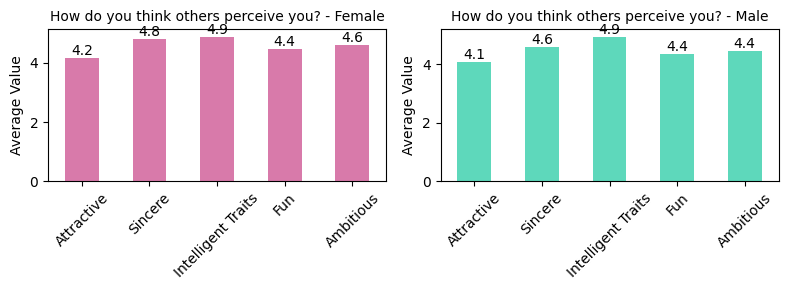

In [356]:
columns_to_plot = ["attr5_1", "sinc5_1", 'intel5_1', "fun5_1", "amb5_1"]

x_labels_mapping = {
    "attr5_1": "Attractive",
    "sinc5_1": "Sincere",
    "intel5_1": "Intelligent Traits",
    "fun5_1": "Fun",
    "amb5_1": "Ambitious"}

gender_grouped = df.groupby("gender")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
colors = {0: "#D87AAA", 1: "#5ED8BB"}

for gender, ax in zip(gender_grouped.groups.keys(), axes):
    gender_str = "female" if gender == 0 else "male"
    df_gender = gender_grouped.get_group(gender)
    averages = df_gender[columns_to_plot].mean()
    color = colors[gender]
    averages.plot(kind="bar", ax=ax, color=color)
    ax.set_xticklabels([x_labels_mapping[column] for column in averages.index], rotation=45)

    for i, v in enumerate(averages):
        ax.text(i, v + 0.1, f"{v:.1f}", ha="center")
    ax.set_title(f"How do you think others perceive you? - {gender_str.capitalize()}",size = 10)
    ax.set_ylabel("Average Value")

plt.tight_layout()
plt.show()

Bar graph showing particpant's average rating regarding how they think others perceive them divided by gender.
* Highest rated attributes for both male and female is 'Intelligent Traits'.
* Females rated 'Sincere' almost as high as 'Intelligent Traits'.

####**4.5.3 How do others actually perceive me?**

***Define this based on dating partners' feedback.***

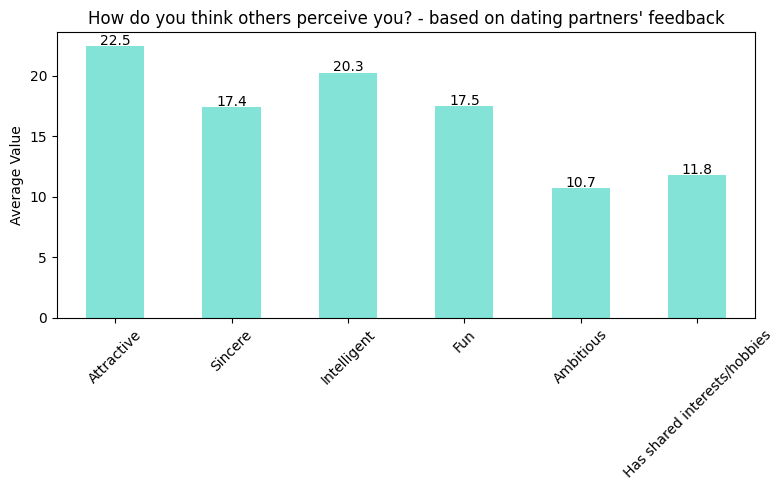

In [357]:
columns_to_plot = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']

x_labels_mapping = {
    "pf_o_att": "Attractive",
    "pf_o_sin": "Sincere",
    "pf_o_int": "Intelligent",
    "pf_o_fun": "Fun",
    "pf_o_amb": "Ambitious",
    "pf_o_sha": "Has shared interests/hobbies"}

df_selected = df[columns_to_plot]
averages = df_selected.mean()

plt.figure(figsize=(8, 5))
ax = plt.gca()
color = "#82E3D6"
averages.plot(kind="bar", ax=ax, color=color)
ax.set_xticklabels([x_labels_mapping[column] for column in averages.index], rotation=45)
for i, v in enumerate(averages):
    ax.text(i, v + 0.1, f"{v:.1f}", ha="center")

plt.title("How do you think others perceive you? - based on dating partners' feedback")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()

Bar graph showing particpant's partner's average rating of their preference at signup.
* Highest rated attributes is 'Attractive'.
* Lowest rated attribute is 'Ambitious'.

***Choose how to aggregate this feedback per participant based on his/her dating partners, and how to aggregate for the whole dataset, per gender.***

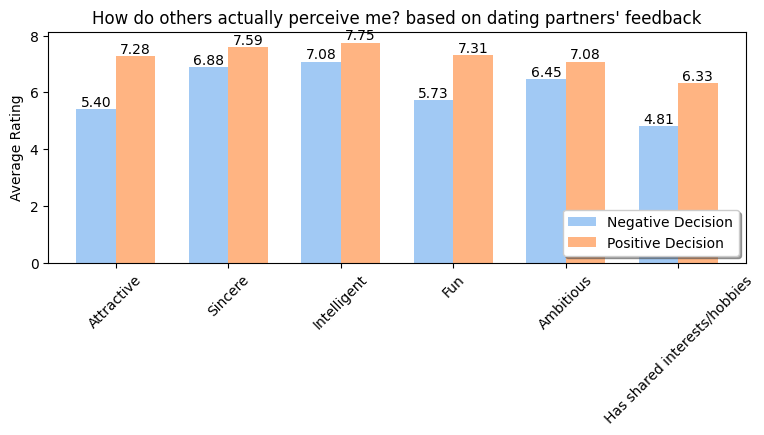

In [358]:
colors = sns.color_palette("pastel")
grouped = df.groupby("dec_o")[["attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o"]].mean()

x_labels_mapping = {
    "attr_o": "Attractive",
    "sinc_o": "Sincere",
    "intel_o": "Intelligent",
    "fun_o": "Fun",
    "amb_o": "Ambitious",
    "shar_o": "Has shared interests/hobbies"}

sns.set_palette(colors)

ax = grouped.T.plot(kind="bar", figsize=(9, 3), width=0.7)
plt.title("How do others actually perceive me? based on dating partners' feedback")
plt.ylabel("Average Rating")
plt.xticks(range(len(x_labels_mapping)), [x_labels_mapping[col] for col in x_labels_mapping], rotation=45)
ax.legend(["Negative Decision", "Positive Decision"], loc='lower right', bbox_to_anchor=(1.0, 0.0), fancybox=True, shadow=True)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

plt.show()

Bar graph showing particpant's partner's average rating of their preference during meeting divided by the final desicin of the partner at the meting (Negative Desicion or Positive Desicion).
* 'Attractive', 'Fun' and 'Has shared interests/hobbies' attributes that were rated high are more likely to lead to a 'Positive Desicion' at the end of the meeting.
* 'Sincere', 'Intelligent' and 'Ambitious' attributes that were rated high are less likely to lead to a 'Positive Desicion' at the end of the meeting.

***Present both the values and the agreement score per feature for each gender. For example, how do men in general perceive their women partners' fun/intelligence? Is there a clear agreement about one’s attractiveness/intelligence etc.)?***

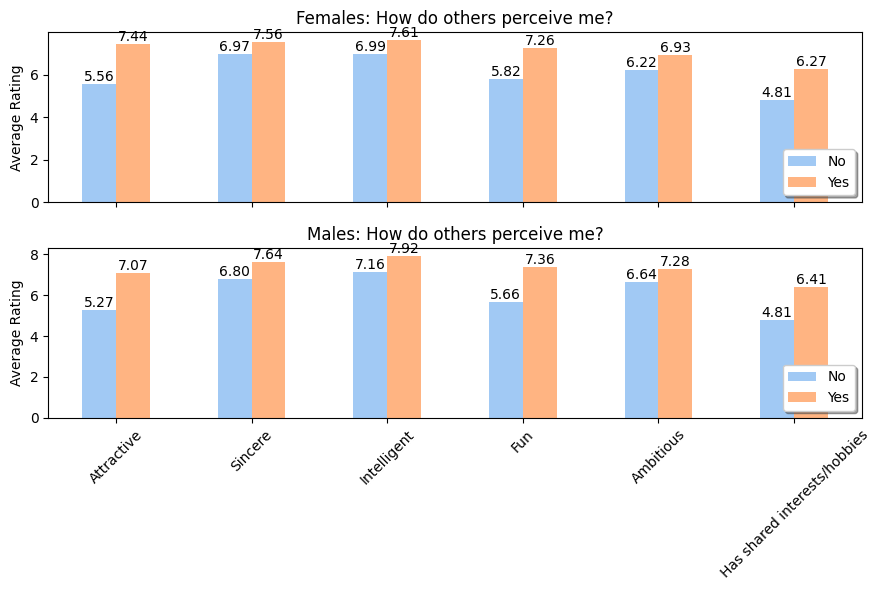

In [359]:
colors = sns.color_palette("pastel")
grouped = df.groupby(["gender", "dec_o"])[["attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o"]].mean()
x_labels_mapping = {
    "attr_o": "Attractive",
    "sinc_o": "Sincere",
    "intel_o": "Intelligent",
    "fun_o": "Fun",
    "amb_o": "Ambitious",
    "shar_o": "Has shared interests/hobbies"}

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 6), sharex=True)
sns.set_palette(colors)

ax = grouped.loc[0].T.plot(kind="bar", ax=axes[0])
ax.set_title("Females: How do others perceive me?")
ax.set_ylabel("Average Rating")
ax.set_xticks(range(len(x_labels_mapping)))
ax.set_xticklabels([x_labels_mapping[col] for col in x_labels_mapping], rotation=45)
legend = ax.legend(["No", "Yes"], loc='lower right', bbox_to_anchor=(1.0, 0.0), fancybox=True, shadow=True, bbox_transform=ax.transAxes)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom')

ax = grouped.loc[1].T.plot(kind="bar", ax=axes[1])
ax.set_title("Males: How do others perceive me?")
ax.set_ylabel("Average Rating")
ax.set_xticks(range(len(x_labels_mapping)))
ax.set_xticklabels([x_labels_mapping[col] for col in x_labels_mapping], rotation=45)
legend = ax.legend(["No", "Yes"], loc='lower right', bbox_to_anchor=(1.0, 0.0), fancybox=True, shadow=True, bbox_transform=ax.transAxes)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Bar graph showing how partners rated their preference during meeting divided by the final desicin of the partner at the meting (Negative Desicion or Positive Desicion) and by gender.
* For both genders we recieved a similar outcome:
  * 'Attractive', 'Fun' and 'Has shared interests/hobbies' attributes that were rated high are more likely to lead to a 'Positive Desicion' at the end of the meeting.
  * 'Sincere', 'Intelligent' and 'Ambitious' attributes that were rated high are less likely to lead to a 'Positive Desicion' at the end of the meeting.

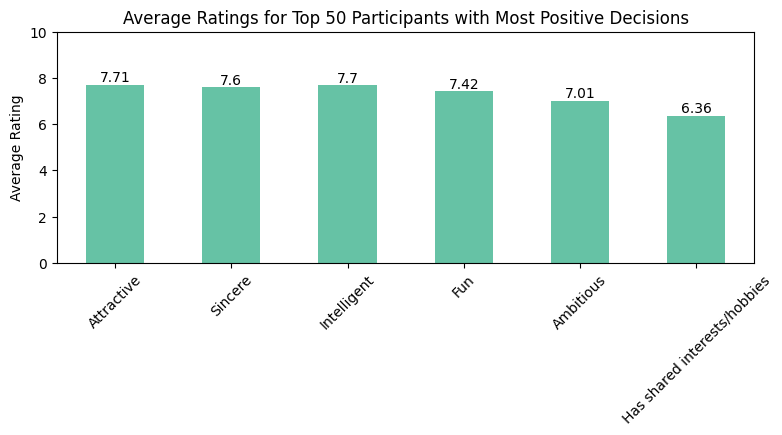

In [360]:
colors = sns.color_palette("Set2")
positive_decisions = df[df["dec_o"] == 1]
top_participants = positive_decisions["iid"].value_counts().head(50)
top_participants_data = positive_decisions[positive_decisions["iid"].isin(top_participants.index)]
average_ratings = top_participants_data[["attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o"]].mean()

x_labels_mapping = {
    "attr_o": "Attractive",
    "sinc_o": "Sincere",
    "intel_o": "Intelligent",
    "fun_o": "Fun",
    "amb_o": "Ambitious",
    "shar_o": "Has shared interests/hobbies"}

sns.set_palette(colors)
ax = average_ratings.plot(kind="bar", figsize=(9, 3))
plt.title("Average Ratings for Top 50 Participants with Most Positive Decisions")
plt.ylabel("Average Rating")
plt.xticks(range(len(x_labels_mapping)), [x_labels_mapping[col] for col in x_labels_mapping], rotation=45)
plt.ylim(0, 10)
for i, v in enumerate(average_ratings):
    ax.text(i, v, round(v, 2), ha="center", va="bottom", fontsize=10)

plt.show()

Bar graph showing the average rating that partners rated the top 50 participants (with the most positive desicions) during meeting.
* The three highest rated attributes are 'Attractive', 'Intelligent' and sincere'.
* 'Has shared interests/hobbies' is rated lowest and probably least affecting attribute on the 'Positive Desicion' of a partner.

***How many do you expect will be interested in dating you vs. actual?***

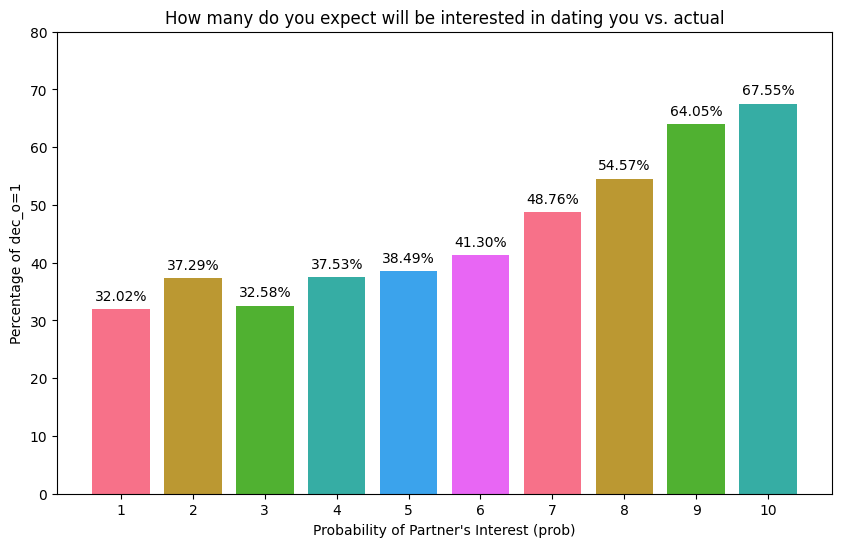

In [361]:
colors = sns.color_palette("husl")
df["prob"] = df["prob"].astype(int)
dec_0_or_1 = df[df["dec_o"].isin([0, 1])]
result = dec_0_or_1.groupby("prob")["dec_o"].apply(lambda x: (x == 1).mean() * 100).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(result["prob"], result["dec_o"], color=colors)
plt.title("How many do you expect will be interested in dating you vs. actual")
plt.xlabel("Probability of Partner's Interest (prob)")
plt.ylabel("Percentage of dec_o=1")

for bar, percentage in zip(bars, result["dec_o"]):
     ax.text(bar.get_x() + bar.get_width() / 2, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')
plt.ylim(0, 80)
plt.xticks(range(1, 11))
plt.show()

Bar graph showing particpant's rating during meeting regarding the probability that their partner will say 'Yes' and the precenatge of partners that acctualy decided 'Yes'.
* The bars are quite linear meaning the higher that the participant rated the probability of their partner deciding 'Yes' corresponds to the higher precentage of the partner acctualy saying 'Yes'.
* The only exception is particiants that rated the probability of their partner saying 'Yes' as 2 that have similar precentage of 'Yes' desicions as the participants who rated 4.
* Particiants that rated the probability of their partner saying 'Yes' as 7 and up are much more likely to receive a 'Yes' desicion at the end of the meeting than participants who rated the same as 6 and below.

##**4.6.0 Effects of experiment setup/surroundings**

###**4.6.1 Date order**

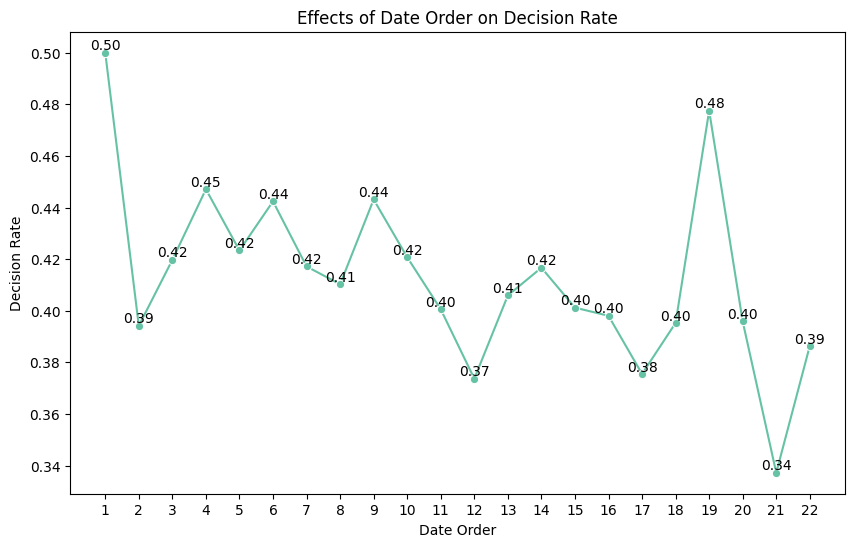

In [362]:
date_order_stats = df.groupby('order')['dec'].mean().reset_index()
x_values = np.arange(1, 23)
date_order_stats = pd.merge(pd.DataFrame({'order': x_values}), date_order_stats, how='left', on='order')

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='order', y='dec', data=date_order_stats, marker='o')

for index, value in date_order_stats.iterrows():
    ax.text(value['order'], value['dec'], f'{value["dec"]:.2f}', ha='center', va='bottom')

plt.title('Effects of Date Order on Decision Rate')
plt.xlabel('Date Order')
plt.ylabel('Decision Rate')
plt.xticks(x_values)
plt.show()

Line graph showing the rate of 'Positive Desicions' the participants rated their partners based on the order that they met them.
* Highest 'Positive Desicion' were given to the first partner that the participant met at the night of the meetings. 50% of first partners received a 'Positive Desicion'.
* We can see another peak in the 19th partner that the participant met at the night of the meetings. 48% of 19th partners received a 'Positive Desicion'.
* Lowest 'Positive Desicion' were given to the 21st partner that the participant met at the night of the meetings. only 34% of 21st partners received a 'Positive Desicion'.



###**4.6.2 position**

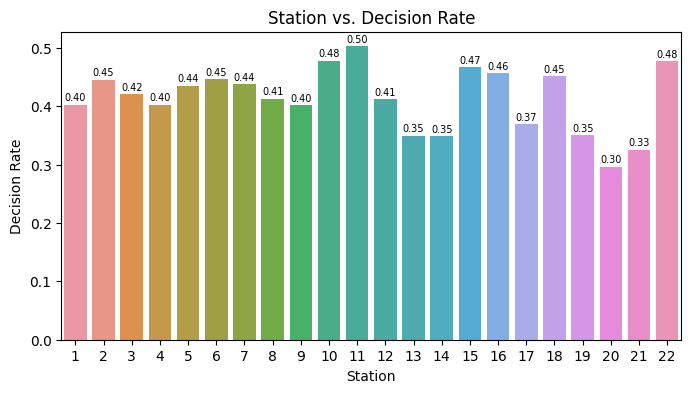

In [363]:
station_stats = df.groupby('position')['dec'].mean().reset_index()
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='position', y='dec', data=station_stats)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=7)

plt.title('Station vs. Decision Rate')
plt.xlabel('Station')
plt.ylabel('Decision Rate')
plt.show()

Bar graph showing the rate of 'Positive Desicions' the participants rated their partners based on the station number that their partners were positioned at the night of the meetings.
* Highest 'Positive Desicion' were given to the partners that were at the position of station 11.
* Lowest 'Positive Desicion' were given to the partners that were at the position of station 20.

###**4.6.3 wave**

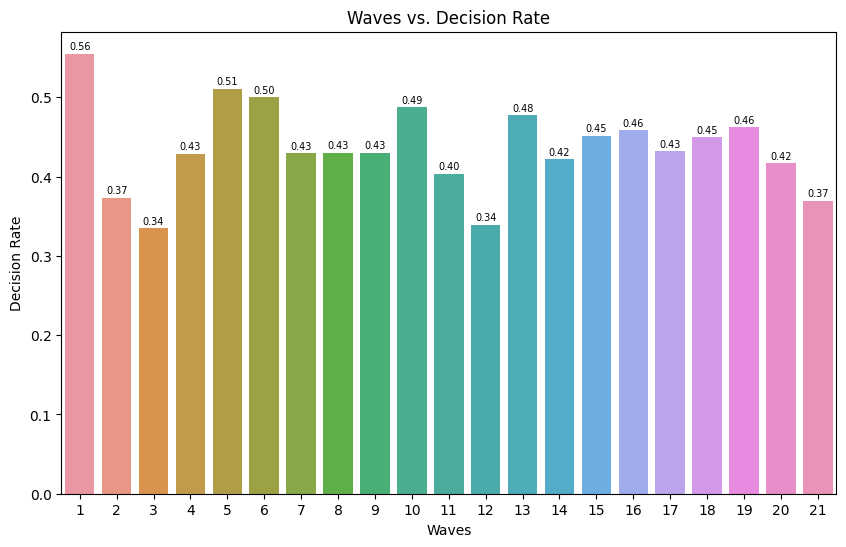

In [364]:
waves_stats = df.groupby('wave')['dec'].mean().reset_index()

# Plotting the graph
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='wave', y='dec', data=waves_stats)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=7)

plt.title('Waves vs. Decision Rate')
plt.xlabel('Waves')
plt.ylabel('Decision Rate')
plt.show()

Bar graph showing the rate of 'Positive Desicions' the participants rated their partners based on the wave number that they participated in.
* Highest 'Positive Desicion' were given to participants in wave 1.
* Lowest 'Positive Desicion' were given to participants in waves 3 and 12 .

##**4.7.0 Towards predicting a decision**

***Divide features to me/other/other-on-me data***

In [365]:
me = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'age',"race"] # rating by me the night of the event
other_on_me = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha'] # partner’s stated preference at Time 1 (attr1_1)
other = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', "age_o", "race_o"] # rating by parthner the night of the event

***My/other/other-on-me data vs. my/other target***

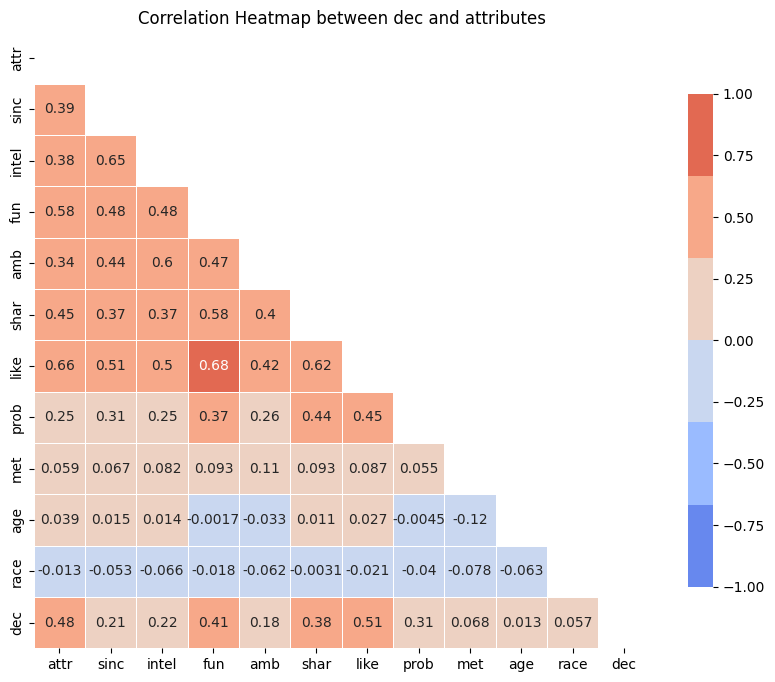

In [366]:
columns_to_include = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', "age", "race"]
df_subset = df[columns_to_include + ['dec']]
correlation_matrix = df_subset.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 8))
colors = sns.color_palette("coolwarm")
sns.heatmap(correlation_matrix, annot=True, cmap=colors, vmin=-1, vmax=1, mask=mask, cbar_kws={'shrink': 0.8}, linewidths=.5, square=True, ax=ax)
plt.title('Correlation Heatmap between dec and attributes')
plt.show()

Correlation graph showing correlation between attributes the participant rated their partner and the participants desicion at the end of the meeting.
* Highest correlation is between 'fun' and 'like', meaning that the way participants rated their partner on 'fun' attribute has 68% effect on how much they like the partner.
* The way participants rated their partner on 'like' attribute has 51% effect on the desicion of the participant regarding the partner.


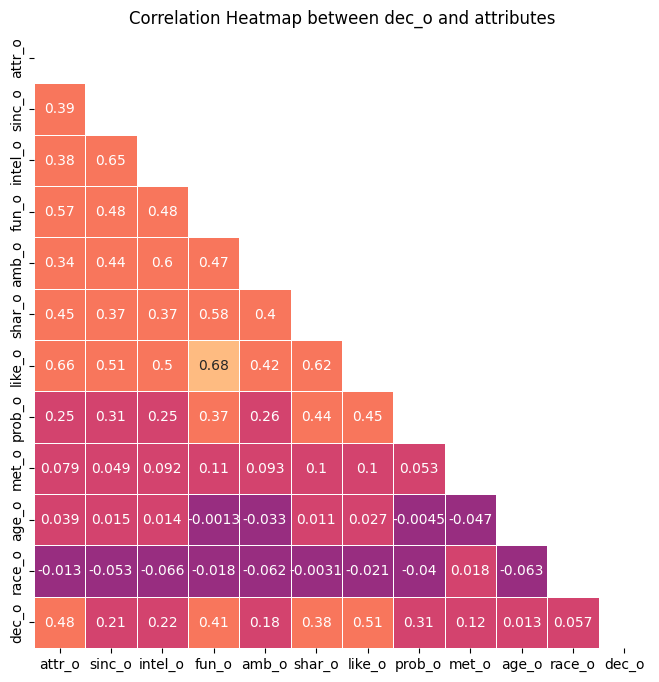

In [367]:
columns_of_interest = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age_o', 'race_o', 'dec_o']
df_subset = df[columns_of_interest]
correlation_matrix = df_subset.corr()
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
colors = sns.color_palette("magma")
sns.heatmap(correlation_matrix, annot=True, cmap=colors, vmin=-1, vmax=1, cbar=False, mask=mask, linewidths=.5, square=True)
plt.title('Correlation Heatmap between dec_o and attributes')
plt.show()

Correlation graph showing correlation between attributes the participant's partner rated the participant and the partner's desicion at the end of the meeting.
* Highest correlation is between 'fun' and 'like', meaning that the way participant's partner rated the participant on 'fun' attribute has 68% effect on how much they like the participant.
* The way participant's partner rated the participant on 'like' attribute has 51% effect on the desicion of the participant's partner regarding the participant.

***Which features are (not) important?***<br/>
It can be seen that the following columns: 'met', "age","race" and, 'met_o', 'age_o',"race_o" have the lowest correlation (less than 1%), which shows that they are columns that have less influence on "dec" and "dec_o" column. While columns like 'attr', 'fun', 'like' and 'attr_o', 'fun_o', 'like_o' have a relatively high correlation - which indicates a higher influence on the feature "dec" and " dec_o".